In [13]:
import fbprophet as fb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from fbprophet import Prophet

df = pd.read_csv("covid-data.csv")
df.head()
df.drop("Country_code",axis=1,inplace=True)
df.drop("WHO_region",axis=1,inplace=True)


liste = ["Canada","Russian Federation","Turkey","Germany","France","The United Kingdom","United States of America","Italy","Japan","China","Argentina","Australia","Brazil","India","Indonesia","Mexico","Saudi Arabia","South Africa","Republic of Korea"]
indexes=[]
for i in range(0,len(df)):
    if df["Country"][i] not in liste:
        indexes.append(i)


g20 = df.drop(indexes)
g20["Date_reported"] = pd.to_datetime(g20["Date_reported"])

weekends = pd.DataFrame({
  'holiday': 'weekend',
  'ds': pd.to_datetime(['2020-08-20','2020-08-27','2020-09-02','2020-09-09','2020-09-16',
                        '2020-09-23','2020-09-30','2020-10-07','2020-10-14','2020-10-21',
                        '2020-10-28','2020-11-04','2020-11-11','2020-11-18','2020-11-25',
                        '2020-12-02','2020-12-09','2020-12-16','2020-12-23','2020-12-30']),
  'lower_window':-2,
  'upper_window': 2
})

def cases_calculation(fc_day,country,cpps = 0.8):
    fc_con = g20[g20["Country"] == country]
    df_model = fc_con[["Date_reported","New_deaths","New_cases"]]
    df_model = df_model.rename(columns={'Date_reported': 'ds',"New_cases": 'y'})
    day = fc_day
    df_train = df_model[:-day]
    my_model = Prophet(changepoint_range = 1,changepoint_prior_scale=cpps,daily_seasonality=True,yearly_seasonality=False)
    my_model.add_seasonality(name='daily',period=15,fourier_order = 5)
    my_model.fit(df_train)
    future_dates = my_model.make_future_dataframe(periods=day, freq='D')
    test = my_model.predict(df_model[-day:].drop(columns="y"))
   
        
    mape=np.mean((np.abs(df_model[-day:]["y"].values - np.abs(test['yhat'][-day:].values)))/df_model[-day:]["y"].values)*100
    rmse = np.sqrt(mean_squared_error(df_model[-day:]["y"].values,test['yhat'][-day:].values))
    
    print("rmse=",rmse)
    print("mape=",mape)
    
    plt.figure(figsize=(20,5))
    plt.plot(test[['ds']][-day:],df_model[["y"]][-day:],label="True")
    plt.plot(test[['ds']][-day:],np.abs(test[['yhat']][-day:]),label="Prediction")
    plt.ylabel("New cases " + 'True vs. Prediction')
    plt.xlabel('Time')
    plt.legend()
    plt.title(country+" new Cases " + 'Test Results',size=22)
    plt.show()
    
def cases_calculation_multivariate(fc_day,country,cpps = 0.8,hps = 0.5):
    fc_con = g20[g20["Country"] == country]
    df_model = fc_con[["Date_reported","New_deaths","New_cases"]]
    df_model = df_model.rename(columns={'Date_reported': 'ds',"New_cases": 'y'})
    day = fc_day
    df_train = df_model[:-day]
    my_model = Prophet(changepoint_range = 1,changepoint_prior_scale=cpps,daily_seasonality=True,yearly_seasonality=False)
    my_model.add_seasonality(name='daily',period=15,fourier_order = 5)
    my_model.add_regressor("New_deaths")
    my_model.fit(df_train)
    future_dates = my_model.make_future_dataframe(periods=day, freq='D')
    test = my_model.predict(df_model[-day:].drop(columns="y"))

    mape=np.mean((np.abs(df_model[-day:]["y"].values - np.abs(test['yhat'][-day:].values)))/df_model[-day:]["y"].values)*100
    rmse = np.sqrt(mean_squared_error(df_model[-day:]["y"].values,test['yhat'][-day:].values))
    
    print("rmse=",rmse)
    print("mape=",mape)
    
    plt.figure(figsize=(20,5))
    plt.plot(test[['ds']][-day:],df_model[["y"]][-day:],label="True")
    plt.plot(test[['ds']][-day:],np.abs(test[['yhat']][-day:]),label="Prediction")
    plt.ylabel("New cases " + 'True vs. Prediction')
    plt.xlabel('Time')
    plt.legend()
    plt.title(country+" new Cases " + 'Multivariate Test Results',size=22)
    plt.show()
    
def cases_calculation_multivariate_holiday(fc_day,country,cpps = 0.8,hps = 0.5):
    fc_con = g20[g20["Country"] == country]
    df_model = fc_con[["Date_reported","New_deaths","New_cases"]]
    df_model = df_model.rename(columns={'Date_reported': 'ds',"New_cases": 'y'})
    day = fc_day
    df_train = df_model[:-day]
    my_model = Prophet(changepoint_range = 1,holidays = weekends,holidays_prior_scale = hps,changepoint_prior_scale=cpps,daily_seasonality=True,yearly_seasonality=False)
    my_model.add_seasonality(name='daily',period=7,fourier_order = 5)
    my_model.add_regressor("New_deaths")
    my_model.fit(df_train)
    future_dates = my_model.make_future_dataframe(periods=day, freq='D')
    test = my_model.predict(df_model[-day:].drop(columns="y"))
        
    mape=np.mean((np.abs(df_model[-day:]["y"].values - np.abs(test['yhat'][-day:].values)))/df_model[-day:]["y"].values)*100
    rmse = np.sqrt(mean_squared_error(df_model[-day:]["y"].values,test['yhat'][-day:].values))
    
    print("rmse=",rmse)
    print("mape=",mape)
    
    plt.figure(figsize=(20,5))
    plt.plot(test[['ds']][-day:],df_model[["y"]][-day:],label="True")
    plt.plot(test[['ds']][-day:],np.abs(test[['yhat']][-day:]),label="Prediction")
    plt.ylabel("New cases " + 'True vs. Prediction')
    plt.xlabel('Time')
    plt.legend()
    plt.title(country+" new cases " + 'Multivariate Test Results (Holidays)',size=22)
    plt.show()
    

def cases_calculation_multivariate_holiday_changepoint(fc_day,country,cpps = 0.8,hps = 0.5,npoint=40):
    fc_con = g20[g20["Country"] == country]
    df_model = fc_con[["Date_reported","New_deaths","New_cases"]]
    df_model = df_model.rename(columns={'Date_reported': 'ds',"New_cases": 'y'})
    day = fc_day
    df_train = df_model[:-day]
    my_model = Prophet(changepoint_range = 1,n_changepoints=npoint,holidays_prior_scale = hps,changepoint_prior_scale=cpps,holidays = weekends,daily_seasonality=True,yearly_seasonality=False)
    my_model.add_seasonality(name='daily',period=15,fourier_order = 5)
    my_model.add_regressor("New_deaths")
    my_model.fit(df_train)
    future_dates = my_model.make_future_dataframe(periods=day, freq='D')
    test = my_model.predict(df_model[-day:].drop(columns="y"))
        
    mape=np.mean((np.abs(df_model[-day:]["y"].values - np.abs(test['yhat'][-day:].values)))/df_model[-day:]["y"].values)*100
    rmse = np.sqrt(mean_squared_error(df_model[-day:]["y"].values,test['yhat'][-day:].values))
    
    print("rmse=",rmse)
    print("mape=",mape)
    
    plt.figure(figsize=(20,5))
    plt.plot(test[['ds']][-day:],df_model[["y"]][-day:],label="True")
    plt.plot(test[['ds']][-day:],np.abs(test[['yhat']][-day:]),label="Prediction")
    plt.ylabel("New cases " + 'True vs. Prediction')
    plt.xlabel('Time')
    plt.legend()
    plt.title(country+" new cases " + 'Multivariate Test Results (Holidays + Changepoint)',size=22)
    plt.show()
    
    
def deaths_calculation(fc_day,country,cpps = 0.8):
    fc_con = g20[g20["Country"] == country]
    df_model = fc_con[["Date_reported","New_deaths","New_cases"]]
    df_model = df_model.rename(columns={'Date_reported': 'ds',"New_deaths": 'y'})
    day = fc_day
    df_train = df_model[:-day]
    my_model = Prophet(changepoint_range = 1,changepoint_prior_scale=cpps,daily_seasonality=True,yearly_seasonality=False)
    my_model.add_seasonality(name='daily',period=15,fourier_order = 5)
    my_model.fit(df_train)
    future_dates = my_model.make_future_dataframe(periods=day, freq='D')
    test = my_model.predict(df_model[-day:].drop(columns="y"))
        
    mape=np.mean((np.abs(df_model[-day:]["y"].values - np.abs(test['yhat'][-day:].values)))/(df_model[-day:]["y"].values))*100
    rmse = np.sqrt(mean_squared_error(df_model[-day:]["y"].values,test['yhat'][-day:].values))
    
    print("rmse=",rmse)
    print("mape=",mape)
    
    plt.figure(figsize=(20,5))
    plt.plot(test[['ds']][-day:],df_model[["y"]][-day:],label="True")
    plt.plot(test[['ds']][-day:],np.abs(test[['yhat']][-day:]),label="Prediction")
    plt.ylabel("New deaths " + 'True vs. Prediction')
    plt.xlabel('Time')
    plt.legend()
    plt.title(country+" new deaths " + 'Test Results',size=22)
    plt.show()
    
    
def deaths_calculation_multivariate(fc_day,country,cpps = 0.8):
    fc_con = g20[g20["Country"] == country]
    df_model = fc_con[["Date_reported","New_deaths","New_cases"]]
    df_model = df_model.rename(columns={'Date_reported': 'ds',"New_deaths": 'y'})
    day = fc_day
    df_train = df_model[:-day]
    my_model = Prophet(changepoint_range = 1,changepoint_prior_scale=cpps,daily_seasonality=True,yearly_seasonality=False)
    my_model.add_seasonality(name='daily',period=15,fourier_order = 5)
    my_model.add_regressor("New_cases")
    my_model.fit(df_train)
    future_dates = my_model.make_future_dataframe(periods=day, freq='D')
    test = my_model.predict(df_model[-day:].drop(columns="y"))
    

    mape=np.mean((np.abs(df_model[-day:]["y"].values - np.abs(test['yhat'][-day:].values)))/(df_model[-day:]["y"].values))*100
    rmse = np.sqrt(mean_squared_error(df_model[-day:]["y"].values,test['yhat'][-day:].values))
    
    print("rmse=",rmse)
    print("mape=",mape)
    
    plt.figure(figsize=(20,5))
    plt.plot(test[['ds']][-day:],df_model[["y"]][-day:],label="True")
    plt.plot(test[['ds']][-day:],np.abs(test[['yhat']][-day:]),label="Prediction")
    plt.ylabel("New deaths " + 'True vs. Prediction')
    plt.xlabel('Time')
    plt.legend()
    plt.title(country+" new deaths " + 'Multivariate Test Results',size=22)
    plt.show()
    
    
    
    
def deaths_calculation_multivariate_holiday(fc_day,country,cpps = 0.8,hps = 0.5):
    fc_con = g20[g20["Country"] == country]
    df_model = fc_con[["Date_reported","New_deaths","New_cases"]]
    df_model = df_model.rename(columns={'Date_reported': 'ds',"New_deaths": 'y'})
    day = fc_day
    df_train = df_model[:-day]
    my_model = Prophet(changepoint_range = 1,holidays = weekends,holidays_prior_scale = hps,changepoint_prior_scale=cpps,daily_seasonality=True,yearly_seasonality=False)
    my_model.add_seasonality(name='daily',period=15,fourier_order = 5)
    my_model.add_regressor("New_cases")
    my_model.fit(df_train)
    future_dates = my_model.make_future_dataframe(periods=day, freq='D')
    test = my_model.predict(df_model[-day:].drop(columns="y"))
    
    mape=np.mean((np.abs(df_model[-day:]["y"].values - np.abs(test['yhat'][-day:].values)))/(df_model[-day:]["y"].values))*100
    rmse = np.sqrt(mean_squared_error(df_model[-day:]["y"].values,test['yhat'][-day:].values))
    
    print("rmse=",rmse)
    print("mape=",mape)
    
    plt.figure(figsize=(20,5))
    plt.plot(test[['ds']][-day:],df_model[["y"]][-day:],label="True")
    plt.plot(test[['ds']][-day:],np.abs(test[['yhat']][-day:]),label="Prediction")
    plt.ylabel("New deaths " + 'True vs. Prediction')
    plt.xlabel('Time')
    plt.legend()
    plt.title(country+" new deaths " + 'Multivariate Test Results (Holidays)',size=22)
    plt.show()

def deaths_calculation_multivariate_holiday_changepoint(fc_day,country,cpps = 0.8,hps = 0.5,npoint = 40):
    fc_con = g20[g20["Country"] == country]
    df_model = fc_con[["Date_reported","New_deaths","New_cases"]]
    df_model = df_model.rename(columns={'Date_reported': 'ds',"New_deaths": 'y'})
    day = fc_day
    df_train = df_model[:-day]
    my_model = Prophet(changepoint_range = 1,n_changepoints=npoint,holidays= weekends,holidays_prior_scale = hps,changepoint_prior_scale=cpps,daily_seasonality=True,yearly_seasonality=False)
    my_model.add_seasonality(name='daily',period=15,fourier_order = 5)
    my_model.add_regressor("New_cases")
    my_model.fit(df_train)
    future_dates = my_model.make_future_dataframe(periods=day, freq='D')
    test = my_model.predict(df_model[-day:].drop(columns="y"))
    
    mape=np.mean((np.abs(df_model[-day:]["y"].values - test['yhat'][-day:].values))/(df_model[-day:]["y"].values))*100
    rmse = np.sqrt(mean_squared_error(df_model[-day:]["y"].values,test['yhat'][-day:].values))
    
    print("rmse=",rmse)
    print("mape=",mape)
    
    plt.figure(figsize=(20,5))
    plt.plot(test[['ds']][-day:],df_model[["y"]][-day:],label="True")
    plt.plot(test[['ds']][-day:],np.abs(test[['yhat']][-day:]),label="Prediction")
    plt.ylabel("New deaths " + 'True vs. Prediction')
    plt.xlabel('Time')
    plt.legend()
    plt.title(country+" new deaths " + 'Multivariate Test Results (Holidays + Changepoint)',size=22)
    plt.show()
    


rmse= 2009.5806886619873
mape= 43.9867363415984


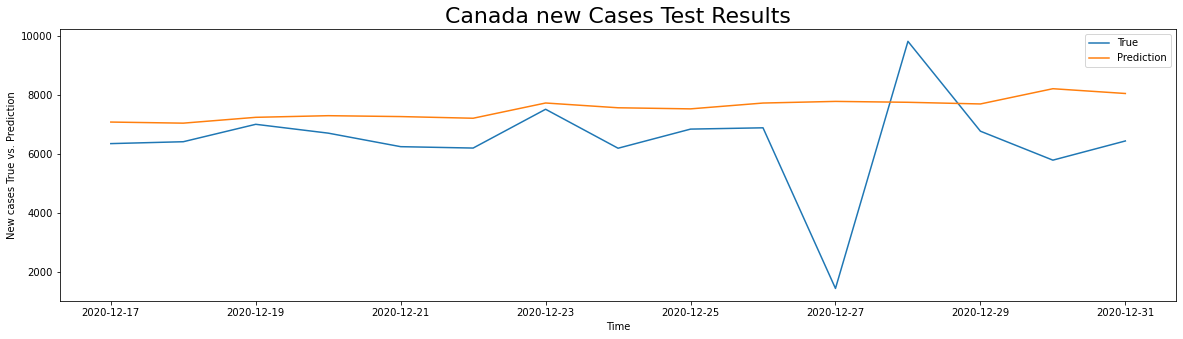

rmse= 1811.5180116993554
mape= 39.62608961643367


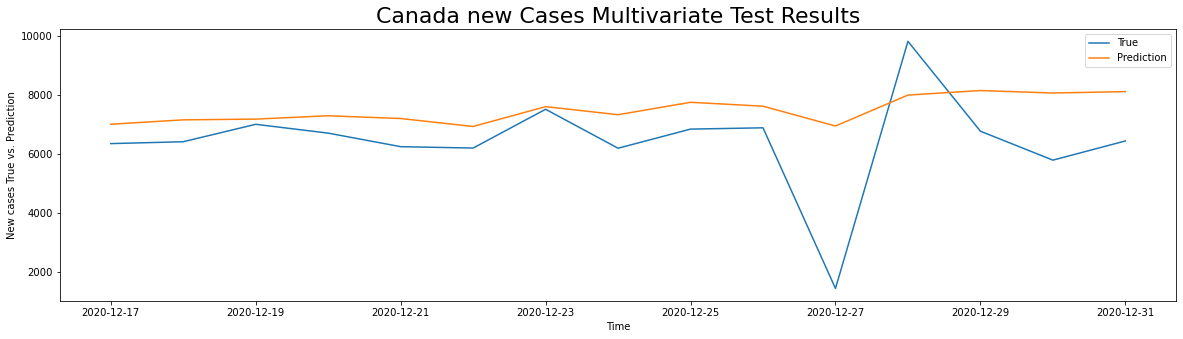

rmse= 1789.3262665336274
mape= 38.36850024856773


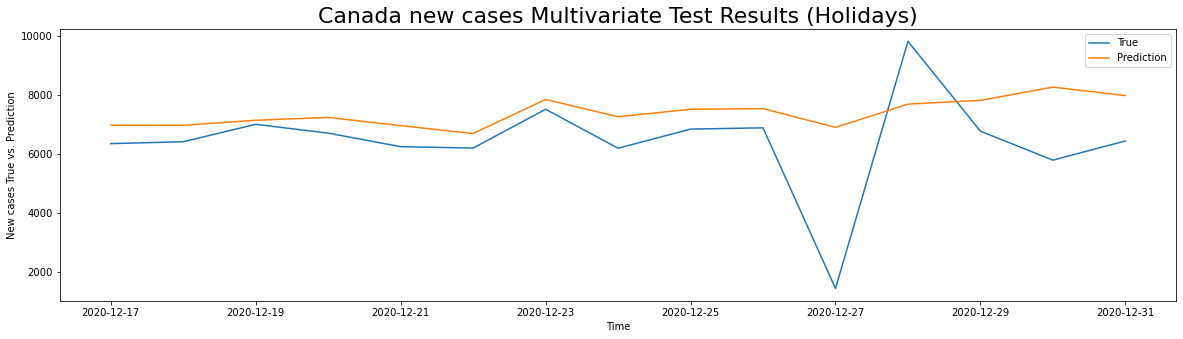

rmse= 1819.3986962002461
mape= 39.2785056069723


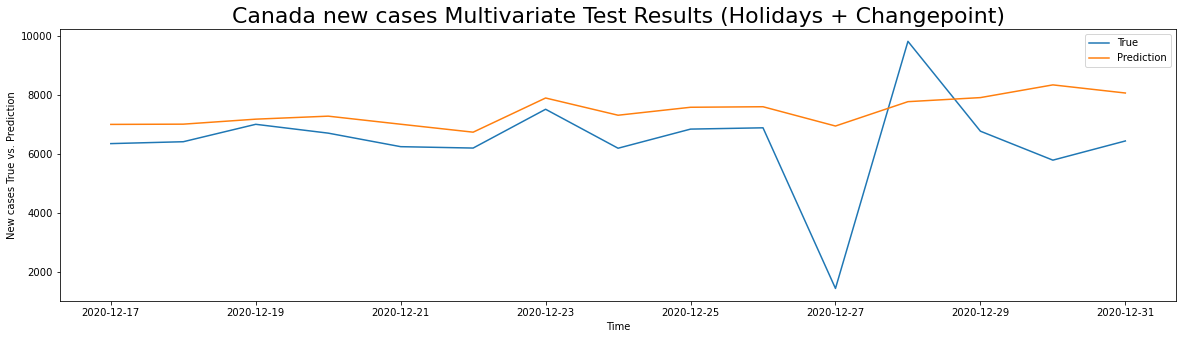

rmse= 46.57923961597805
mape= inf


<ipython-input-13-2da53f1fe06d>:160: RuntimeWarning: divide by zero encountered in true_divide
  mape=np.mean((np.abs(df_model[-day:]["y"].values - np.abs(test['yhat'][-day:].values)))/(df_model[-day:]["y"].values))*100


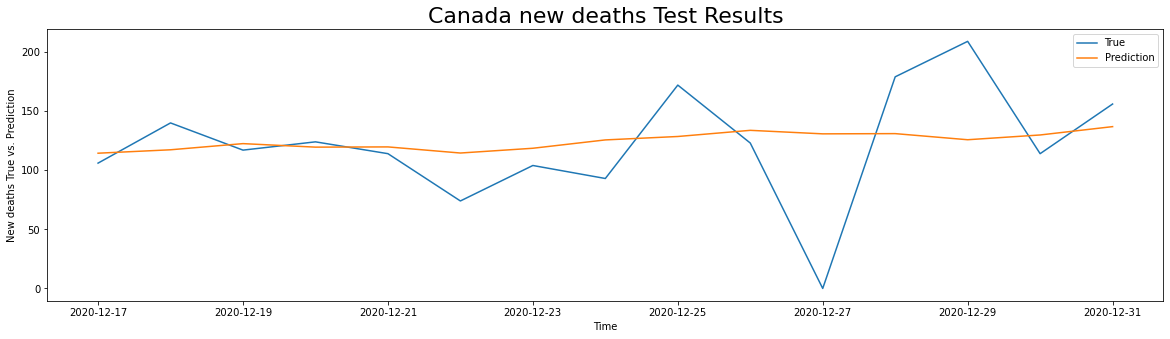

rmse= 36.84733236985026
mape= inf


<ipython-input-13-2da53f1fe06d>:190: RuntimeWarning: divide by zero encountered in true_divide
  mape=np.mean((np.abs(df_model[-day:]["y"].values - np.abs(test['yhat'][-day:].values)))/(df_model[-day:]["y"].values))*100


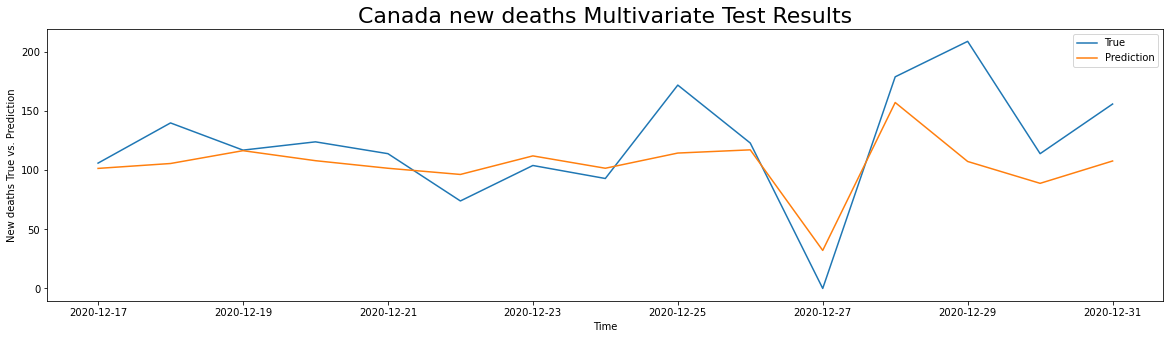

rmse= 36.879639120524
mape= inf


<ipython-input-13-2da53f1fe06d>:221: RuntimeWarning: divide by zero encountered in true_divide
  mape=np.mean((np.abs(df_model[-day:]["y"].values - np.abs(test['yhat'][-day:].values)))/(df_model[-day:]["y"].values))*100


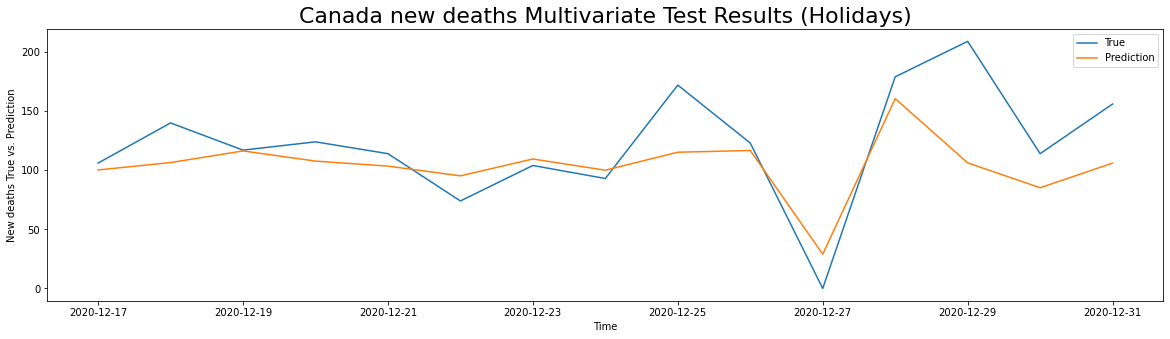

rmse= 36.69628644326977
mape= inf


<ipython-input-13-2da53f1fe06d>:249: RuntimeWarning: divide by zero encountered in true_divide
  mape=np.mean((np.abs(df_model[-day:]["y"].values - test['yhat'][-day:].values))/(df_model[-day:]["y"].values))*100


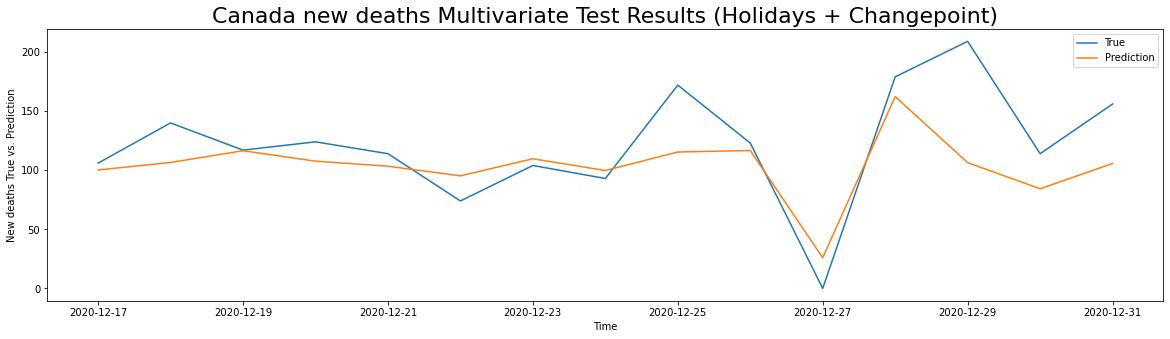

rmse= 1141.9915147581971
mape= 3.062630332077896


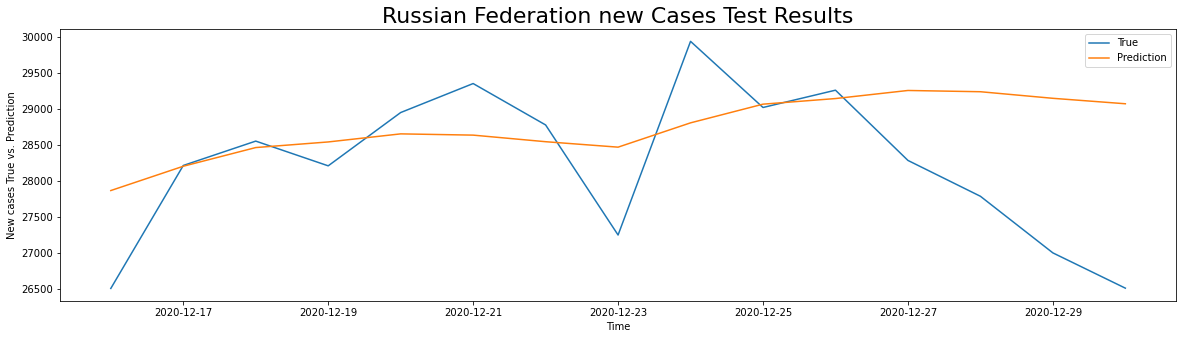

rmse= 1204.3027887032665
mape= 3.175058044835413


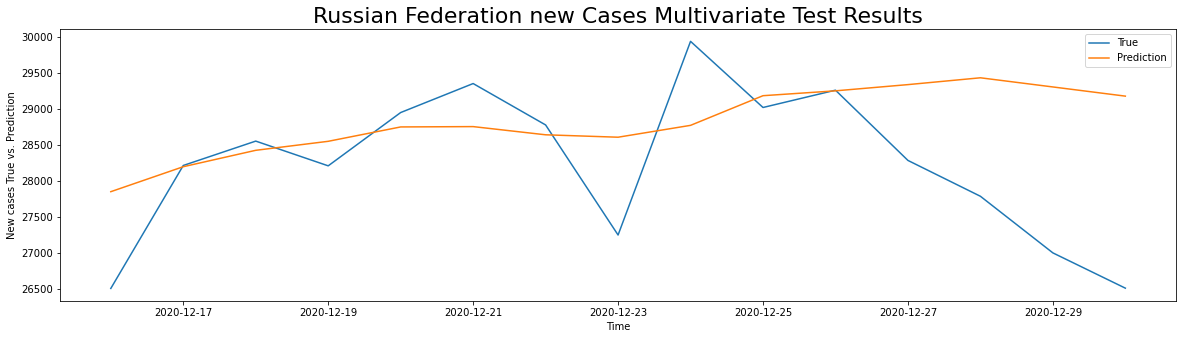

rmse= 1015.7493866319237
mape= 2.815796882660772


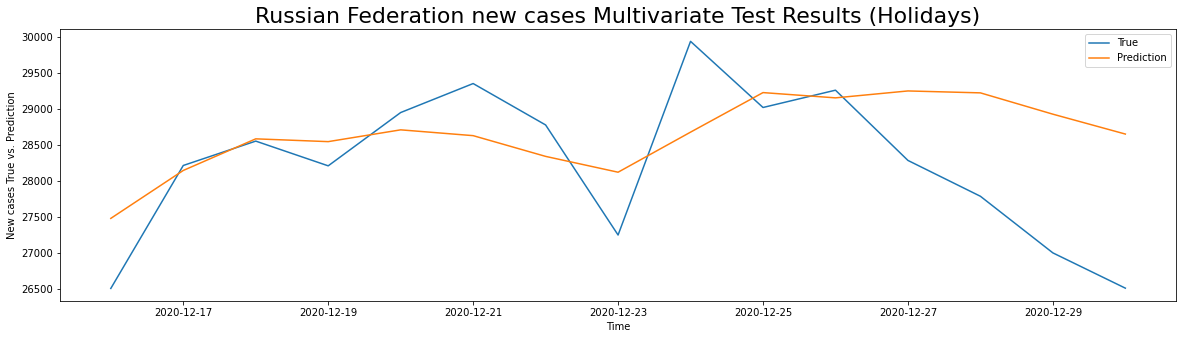

rmse= 910.7253657559936
mape= 2.6357844928291057


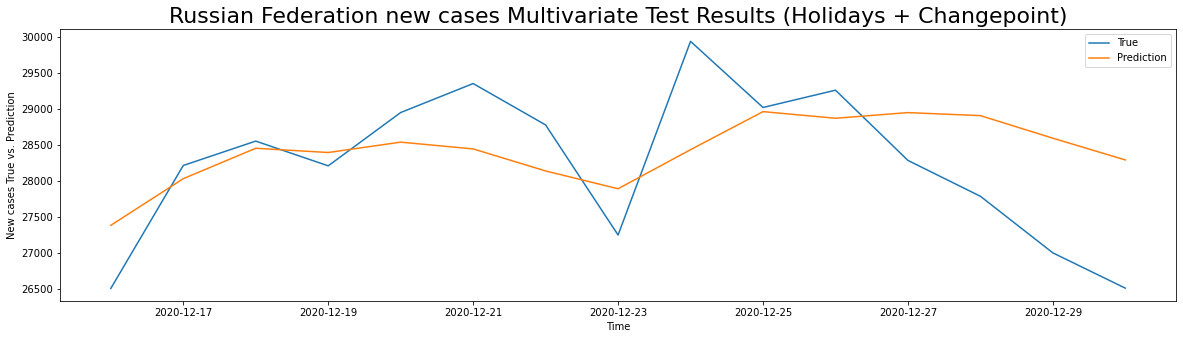

rmse= 69.35568557771674
mape= 10.626277112016199


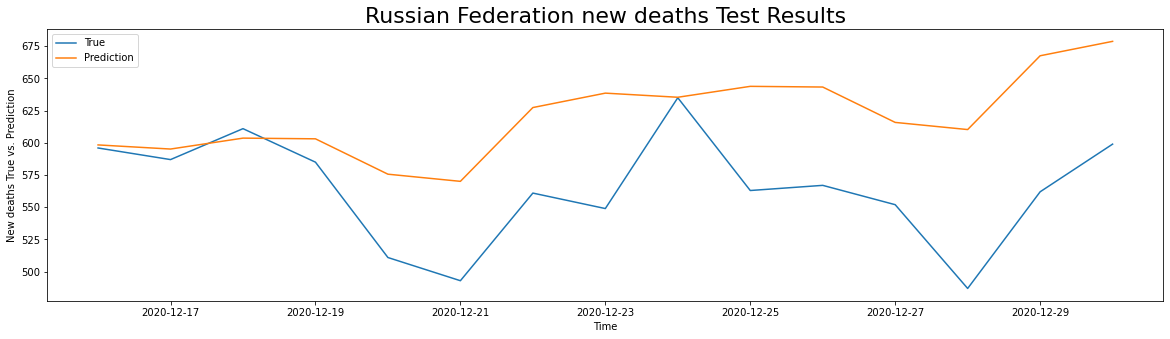

rmse= 58.66761561460082
mape= 9.075630915476317


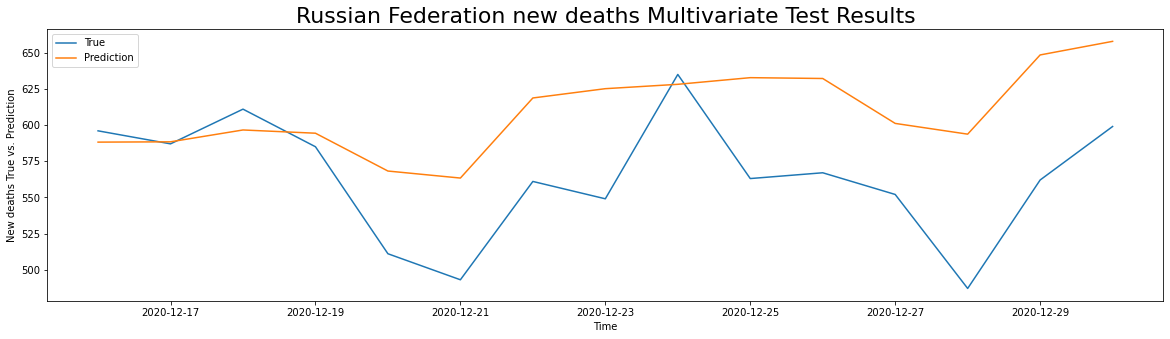

rmse= 59.18047515060617
mape= 8.988774805294565


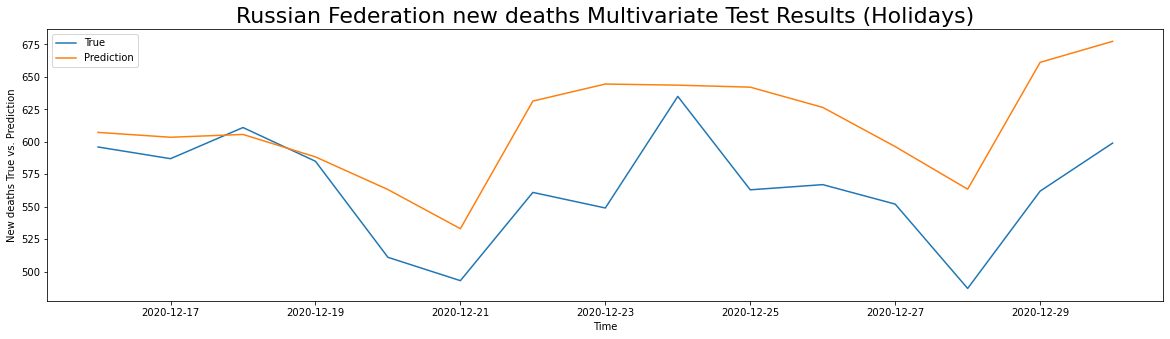

rmse= 60.20292589162507
mape= 9.164098299917391


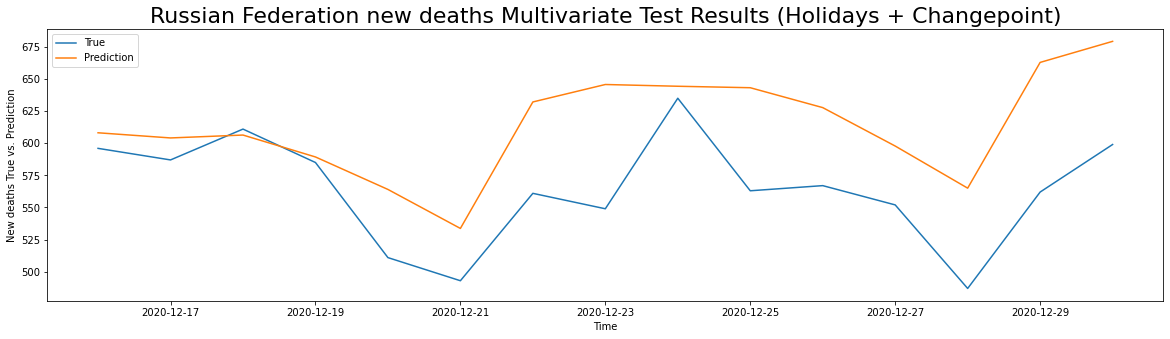

rmse= 13235.168889077482
mape= 67.51685041619541


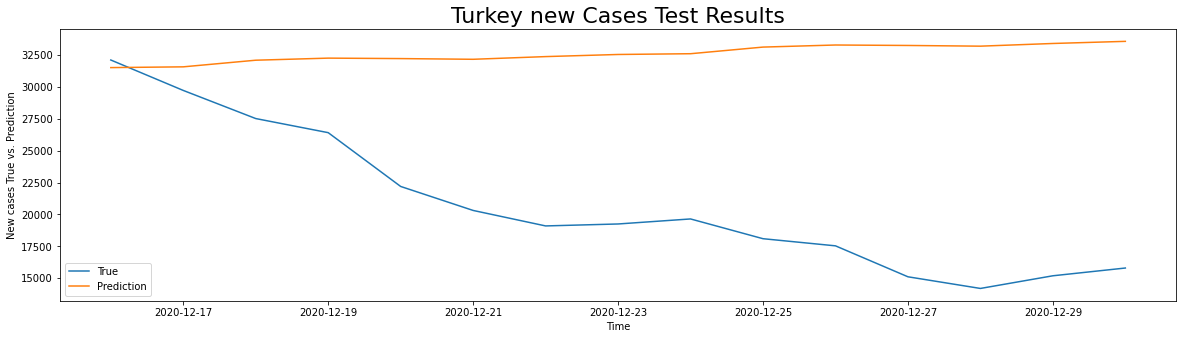

rmse= 13929.381381704557
mape= 71.13307721445675


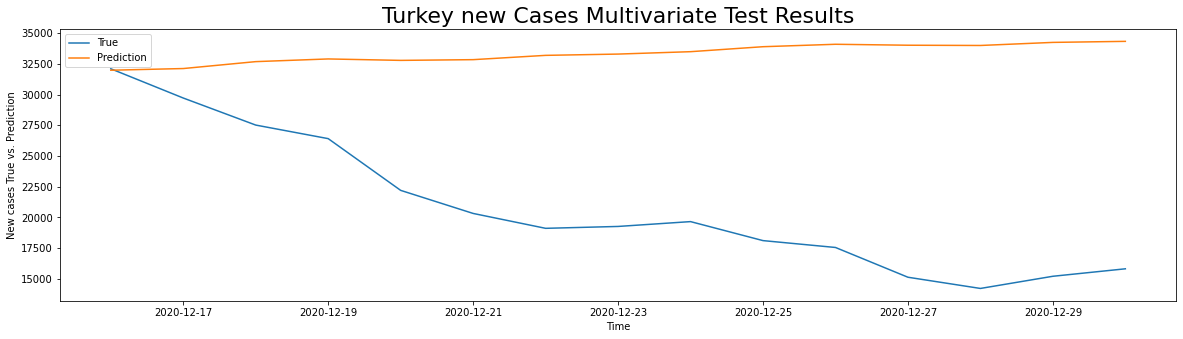

rmse= 14007.763255652151
mape= 71.57251317905306


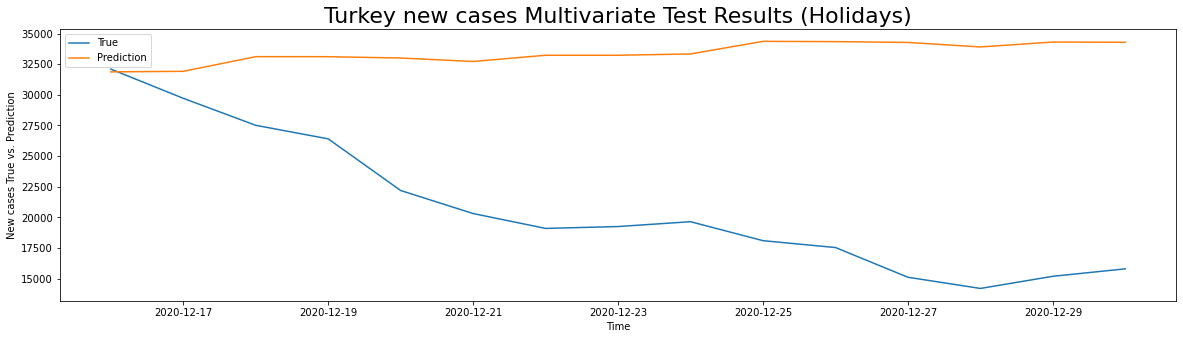

rmse= 5245.5758193773145
mape= 26.666198923179913


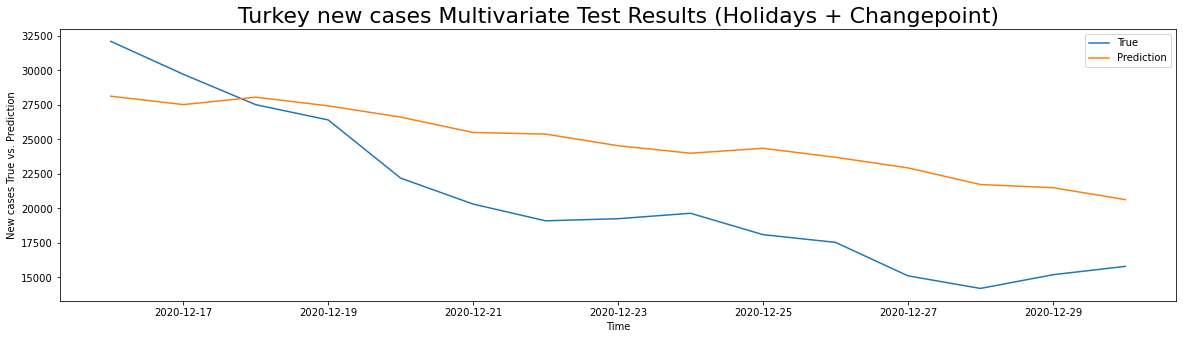

rmse= 6.9690923257760975
mape= 2.4874848413961193


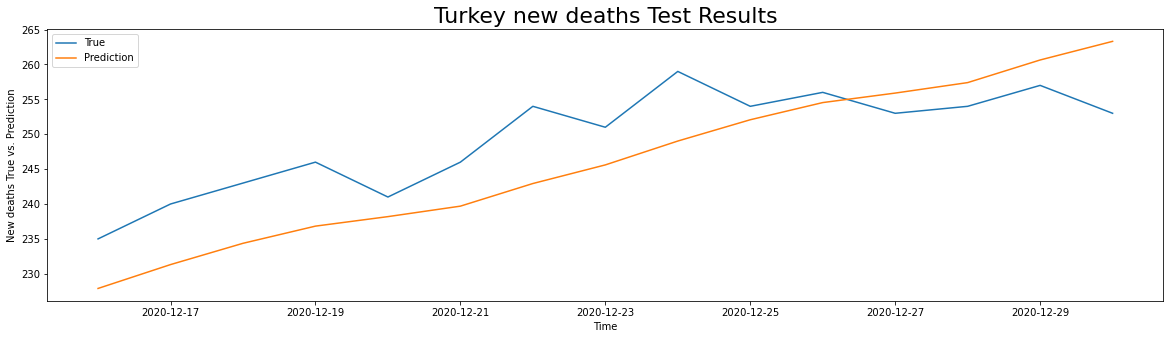

rmse= 7.2311418707732775
mape= 2.526895905953491


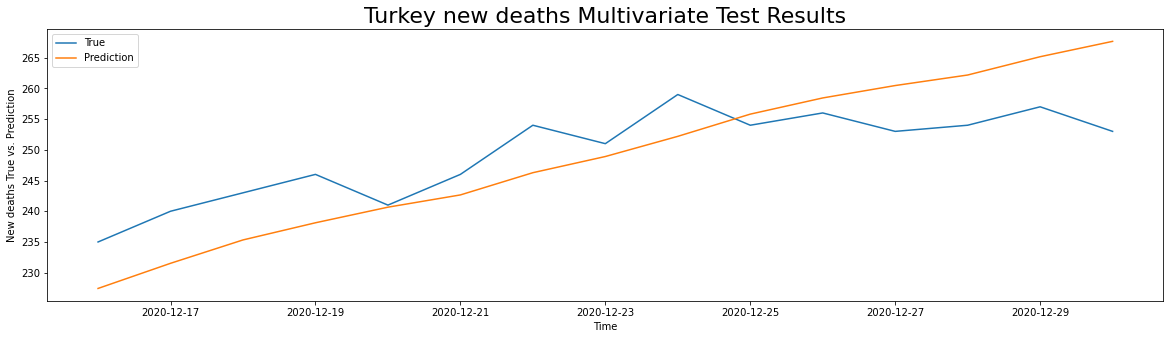

rmse= 7.494865640649611
mape= 2.6142603709826675


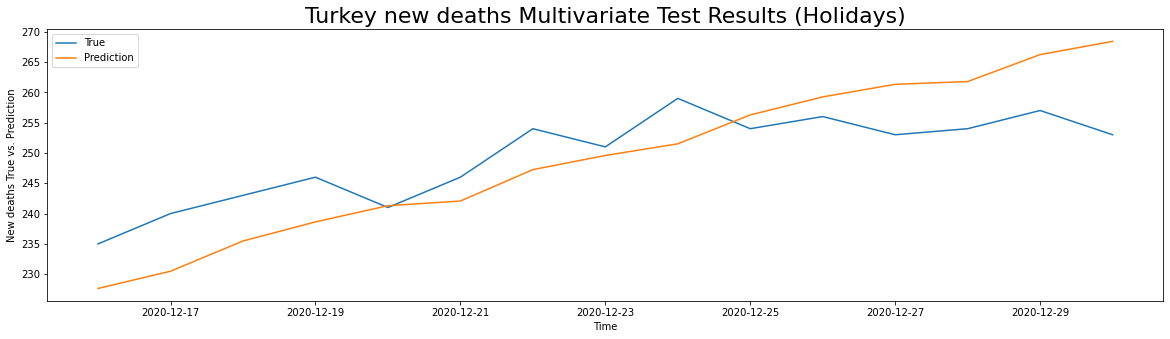

rmse= 12.525693924835808
mape= 3.593712485472908


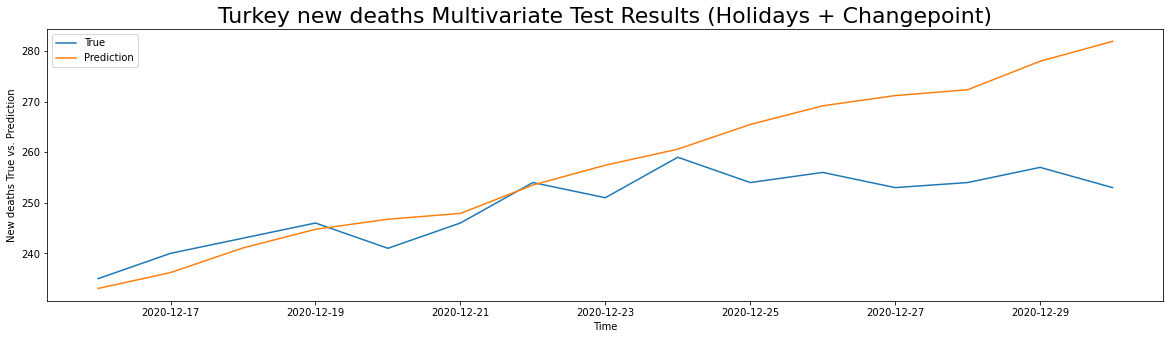

rmse= 7076.3648908105615
mape= 32.440150420589895


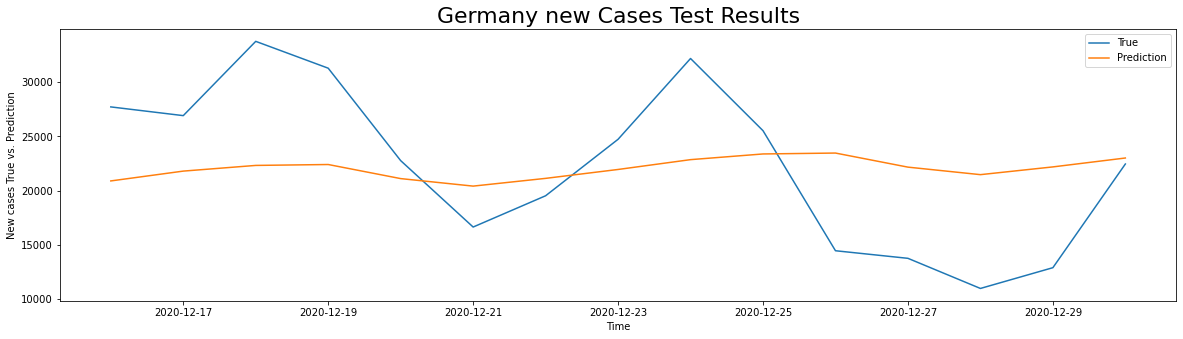

rmse= 6857.592351312709
mape= 30.99700397260588


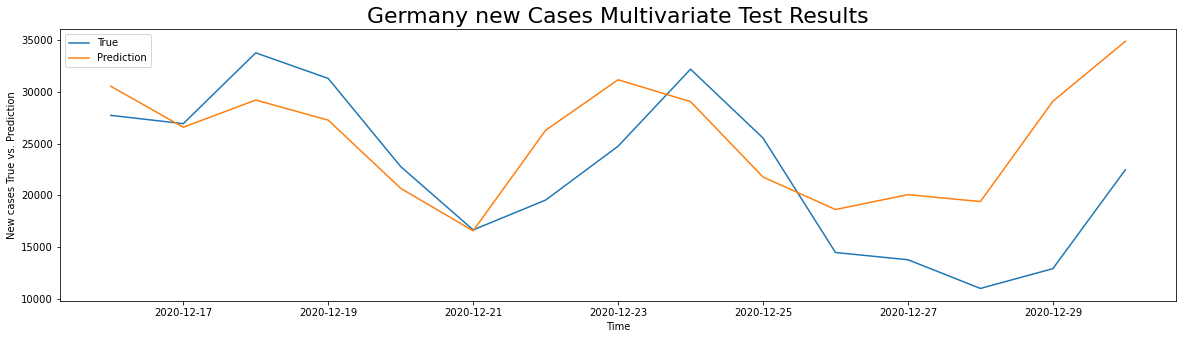

rmse= 6673.276961680398
mape= 30.306130275748693


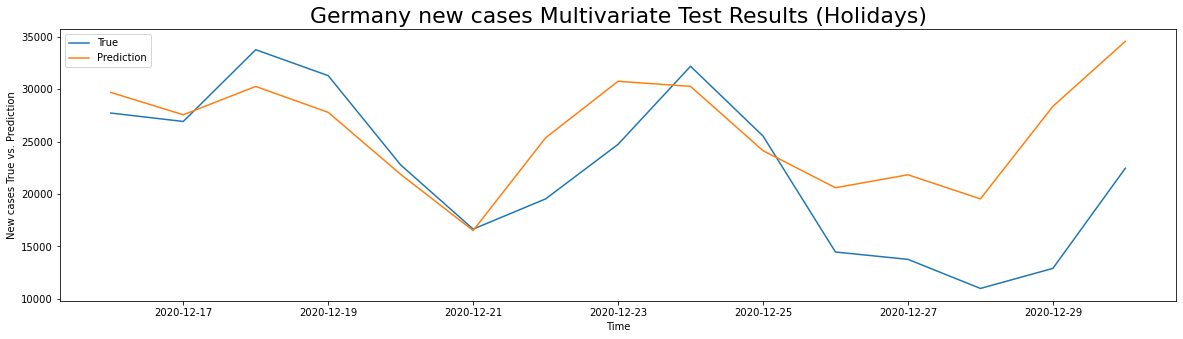

rmse= 6524.924065766877
mape= 29.761853221925012


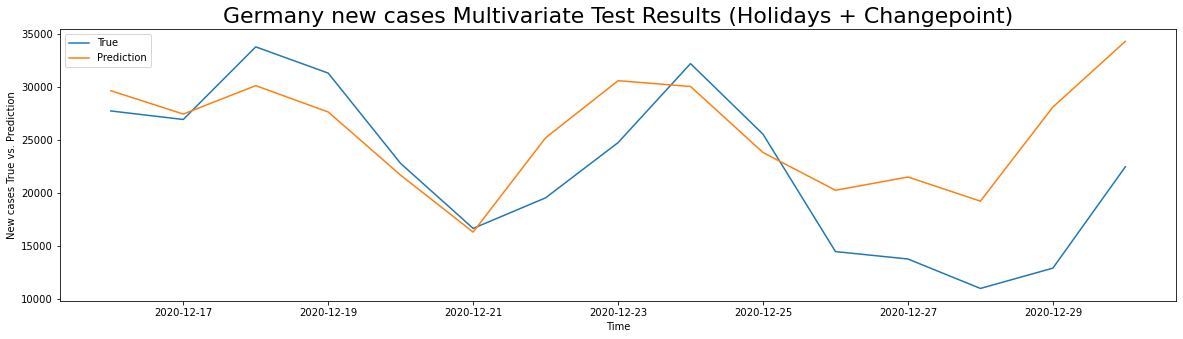

rmse= 290.22821772032324
mape= 48.36387495447599


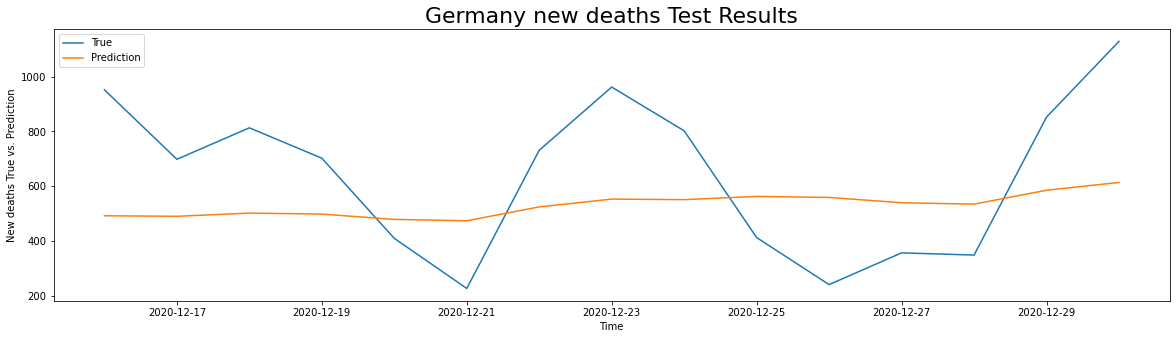

rmse= 263.06256979149583
mape= 36.237263845492365


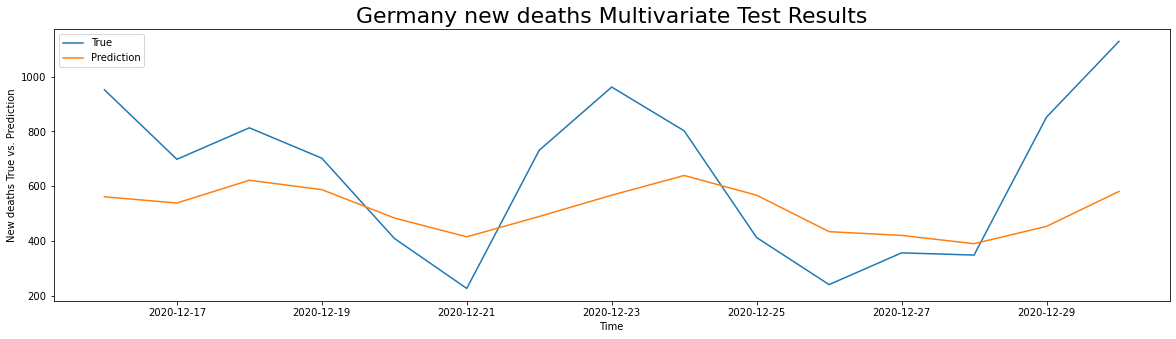

rmse= 252.587426585823
mape= 33.809102988157385


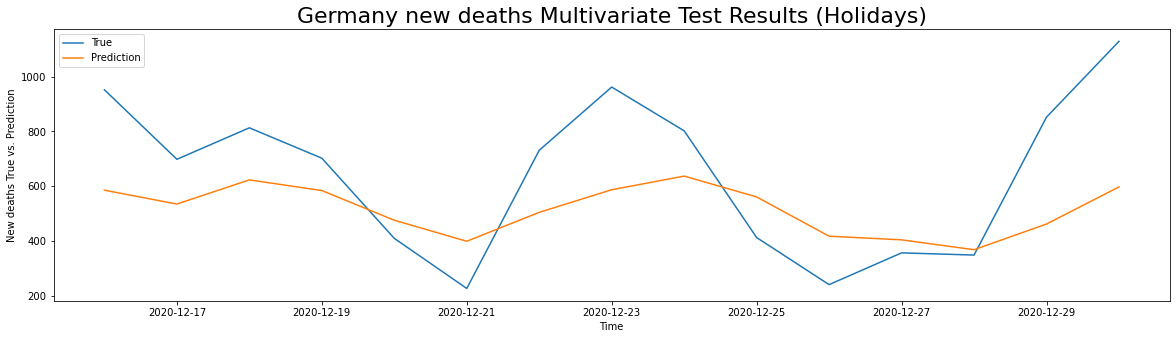

rmse= 247.67832552821866
mape= 35.19996189829968


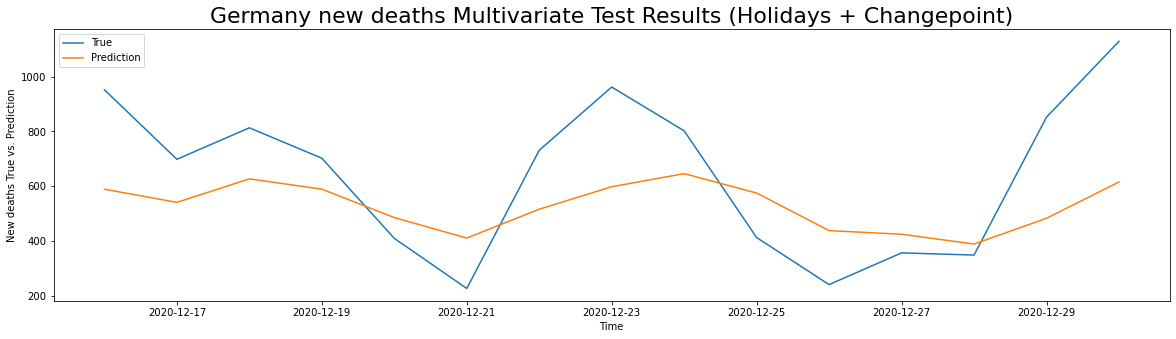

rmse= 5626.589112575226
mape= 65.03063804622317


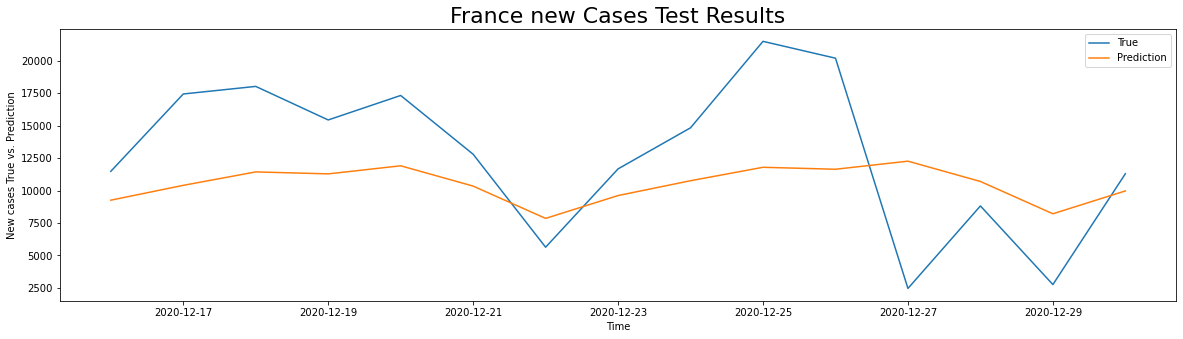

rmse= 5429.64925204957
mape= 70.45829925725022


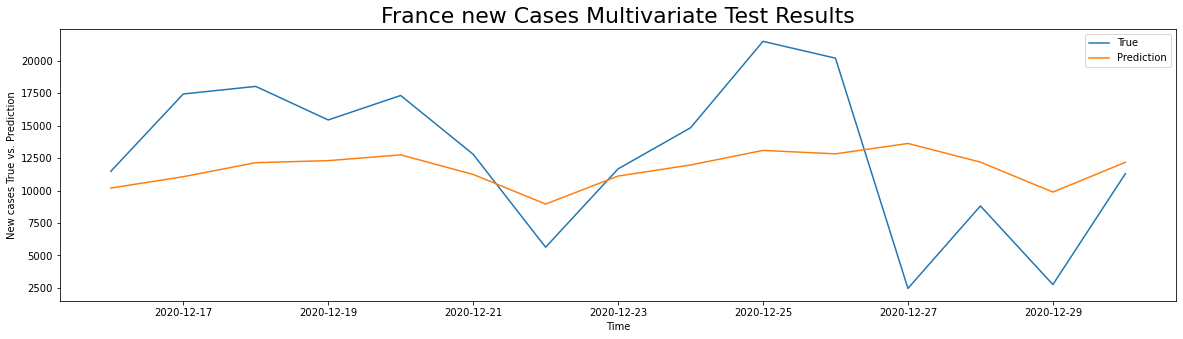

rmse= 4767.319669288426
mape= 62.38885096712027


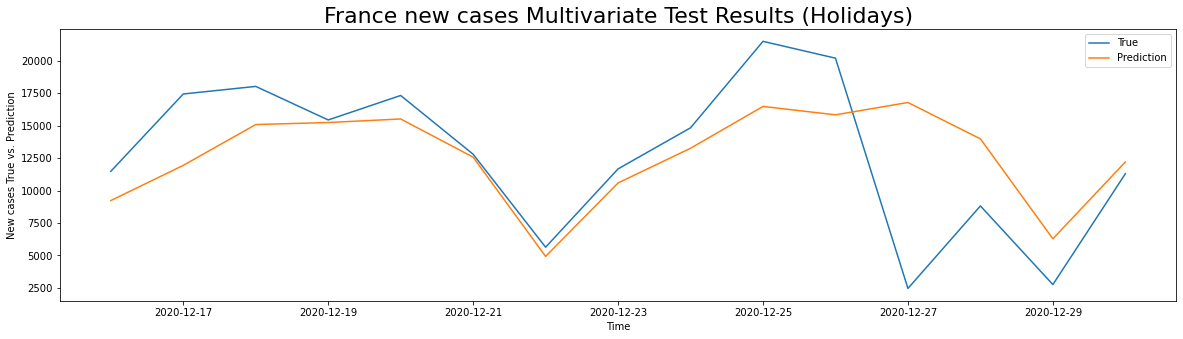

rmse= 4769.000124782501
mape= 58.99168511232293


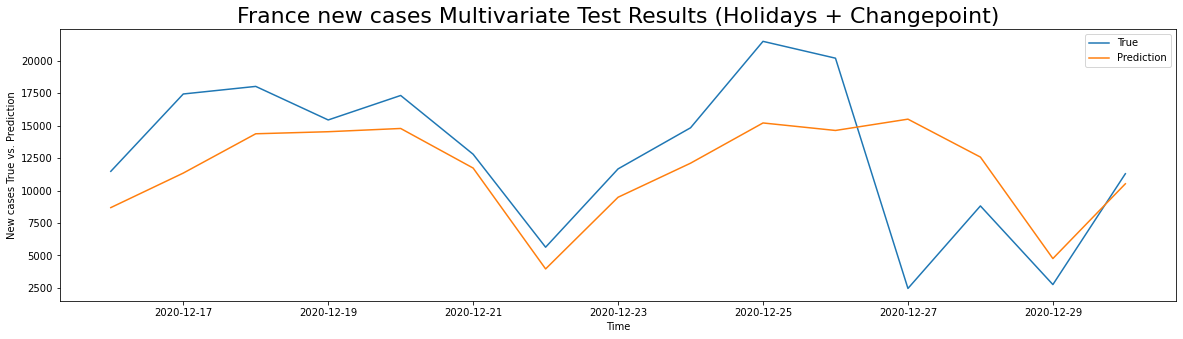

rmse= 258.0541472219134
mape= 36.700481864579906


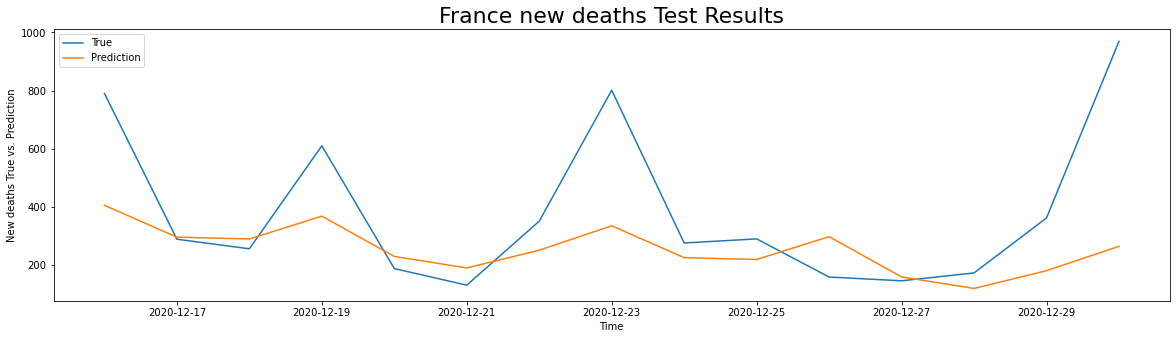

rmse= 250.91701111712746
mape= 37.47435649349903


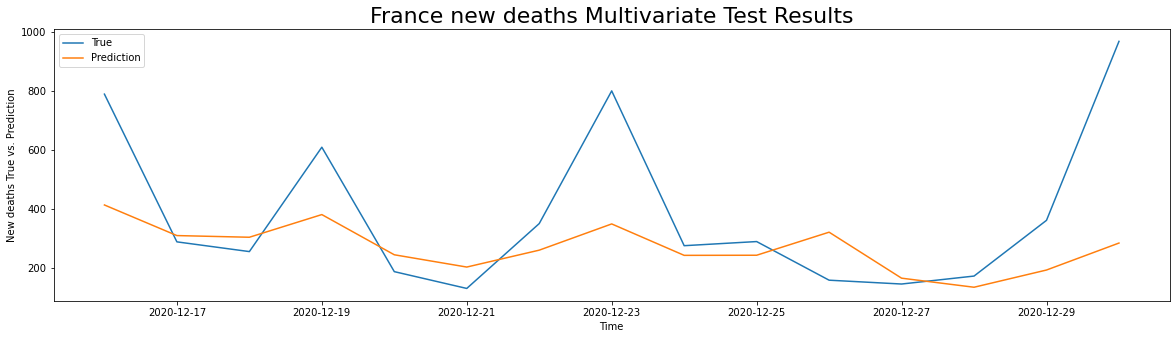

rmse= 196.80207168469786
mape= 36.788525208242916


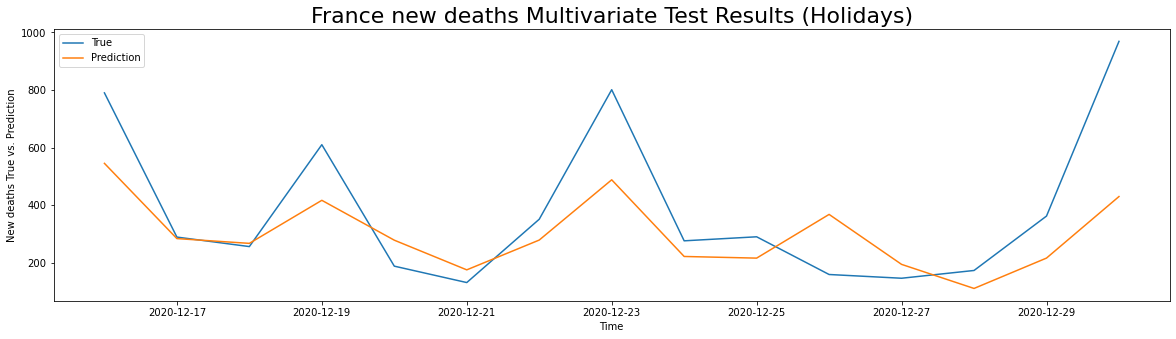

rmse= 202.69541565936046
mape= 36.84085268074137


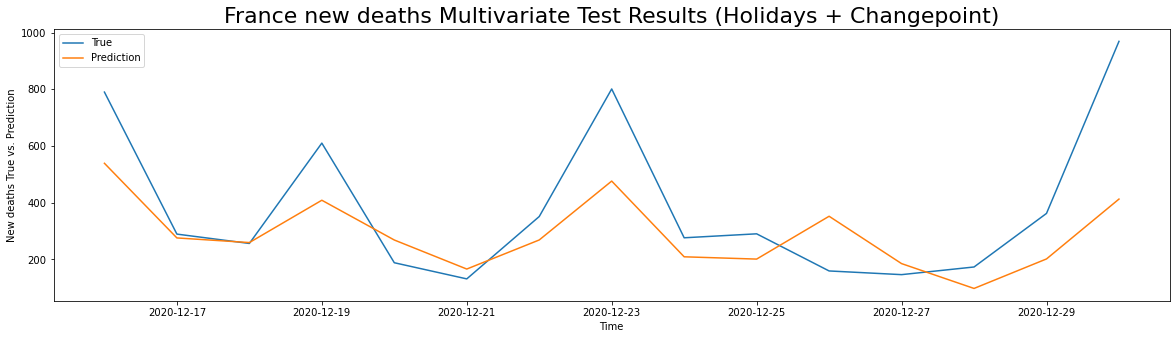

rmse= 11514.657942586371
mape= 27.05612493497532


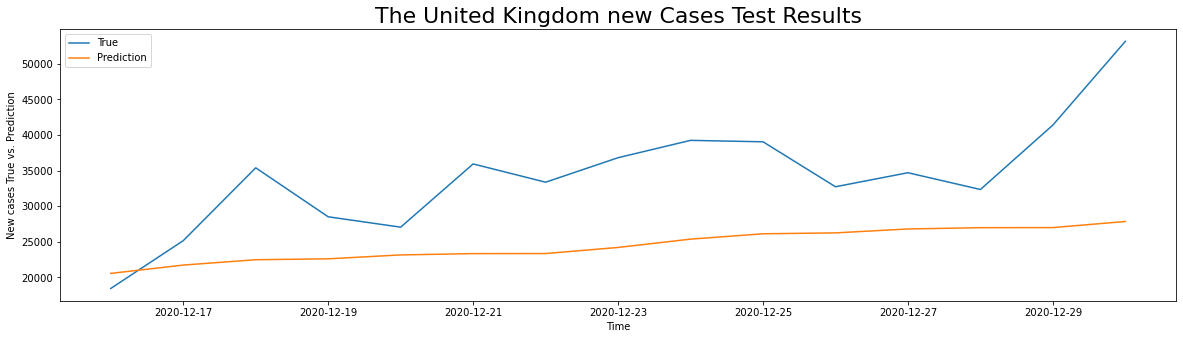

rmse= 11369.445915897137
mape= 26.588758202051782


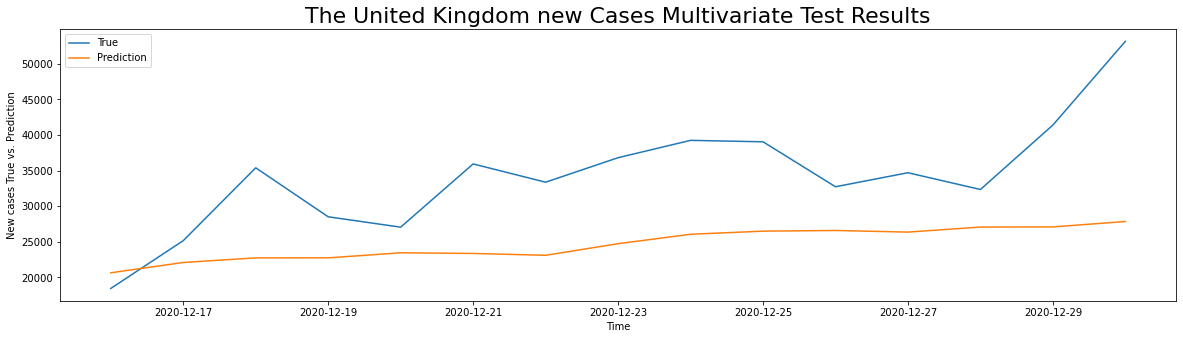

rmse= 11441.706450436732
mape= 26.118008083774612


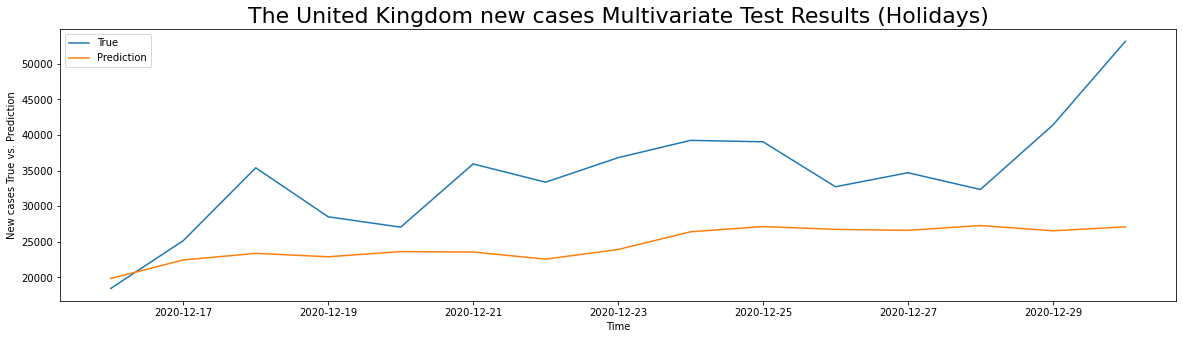

rmse= 10358.447193331373
mape= 23.09774416048482


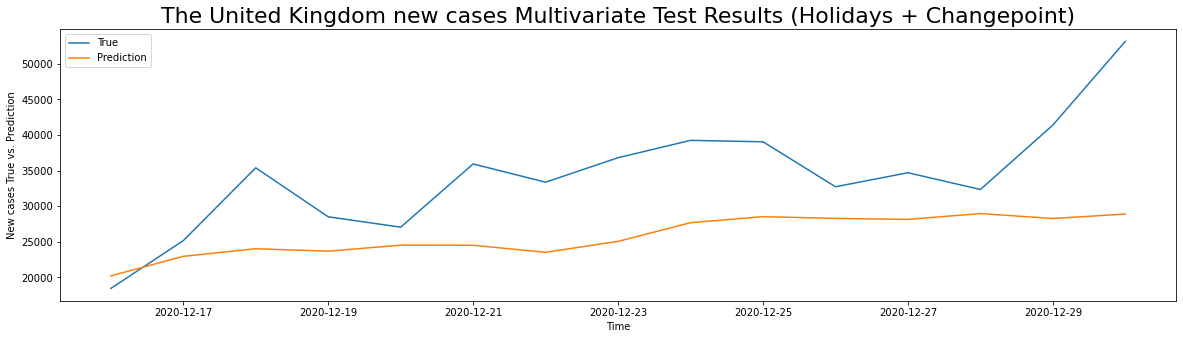

rmse= 145.18694622634342
mape= 26.567893858466853


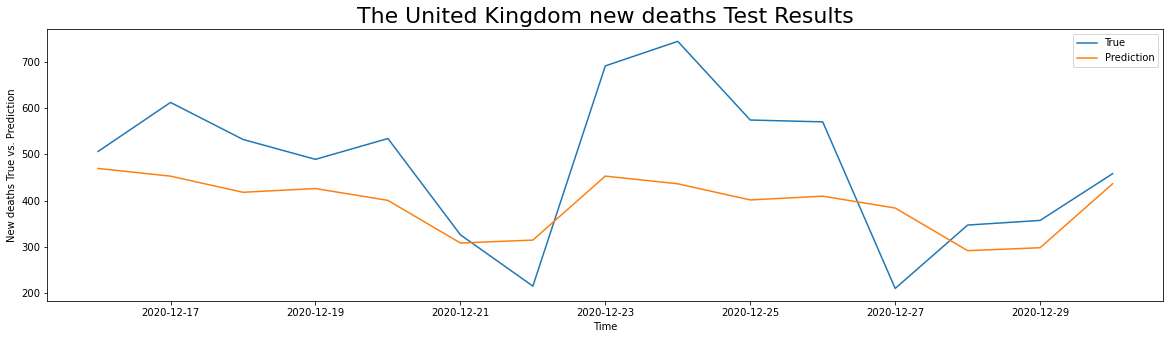

rmse= 124.60045863730322
mape= 26.785716825771694


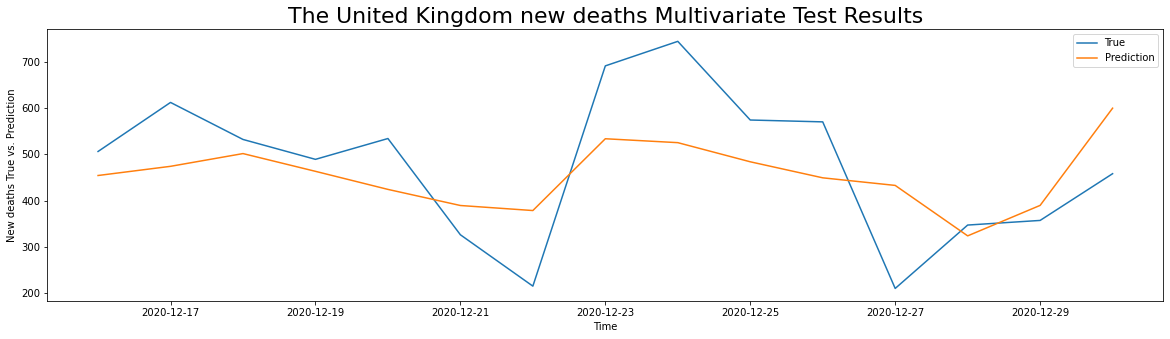

rmse= 117.59637426819789
mape= 25.326934304537396


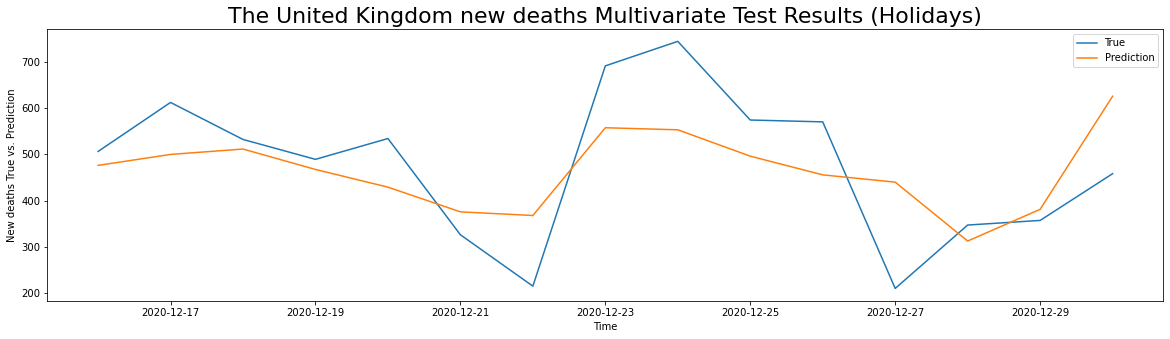

rmse= 118.64996139087543
mape= 25.744656873395304


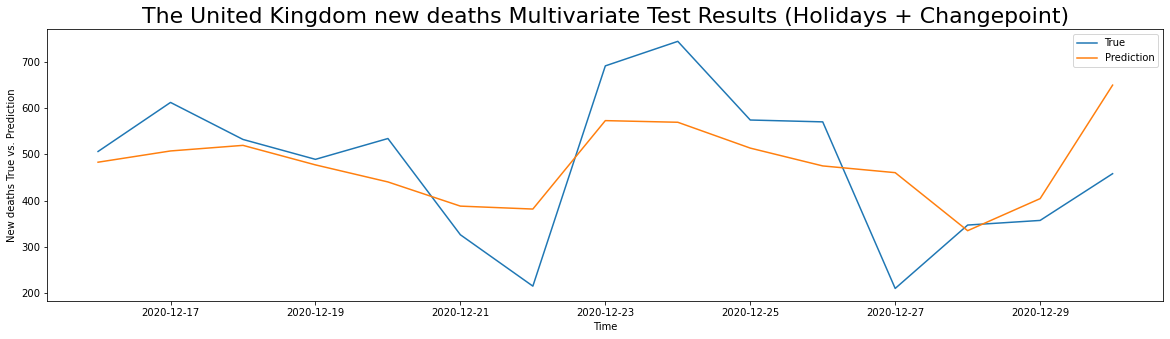

rmse= 75183.84211526839
mape= 32.01471658713733


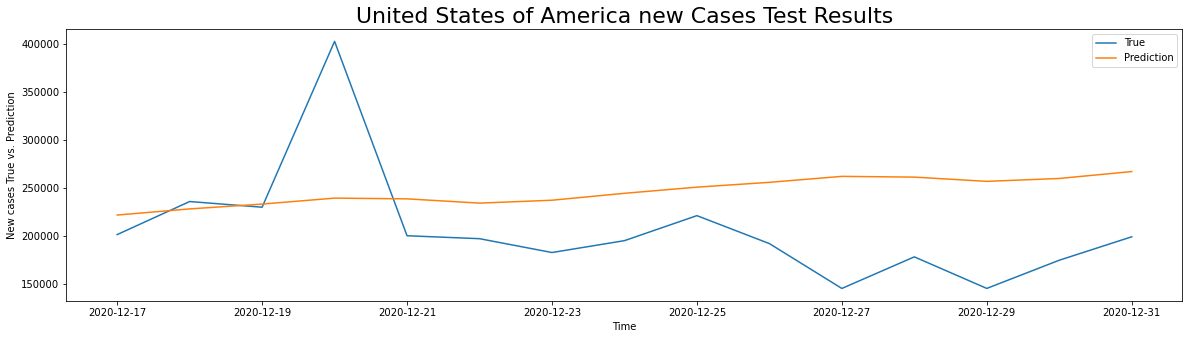

rmse= 72905.28526400459
mape= 30.8407206796717


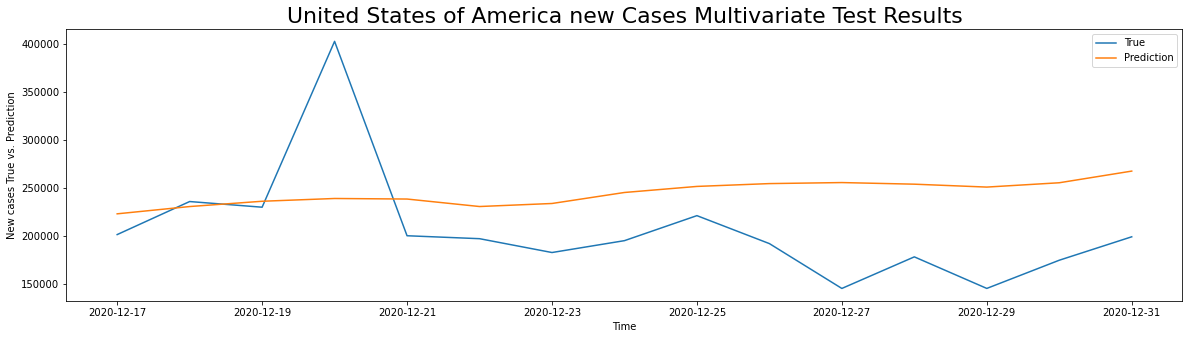

rmse= 73972.43166072111
mape= 31.888196595521972


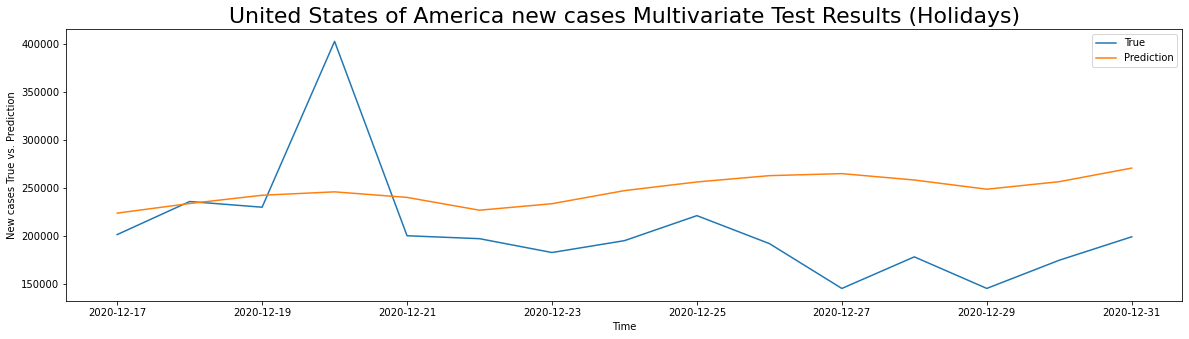

rmse= 65783.14894922574
mape= 26.20719963035712


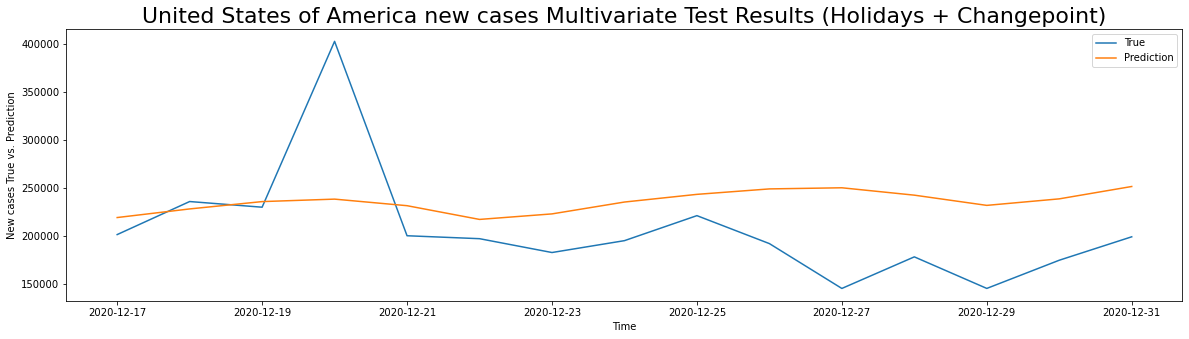

rmse= 762.6512813569306
mape= 33.91983850390243


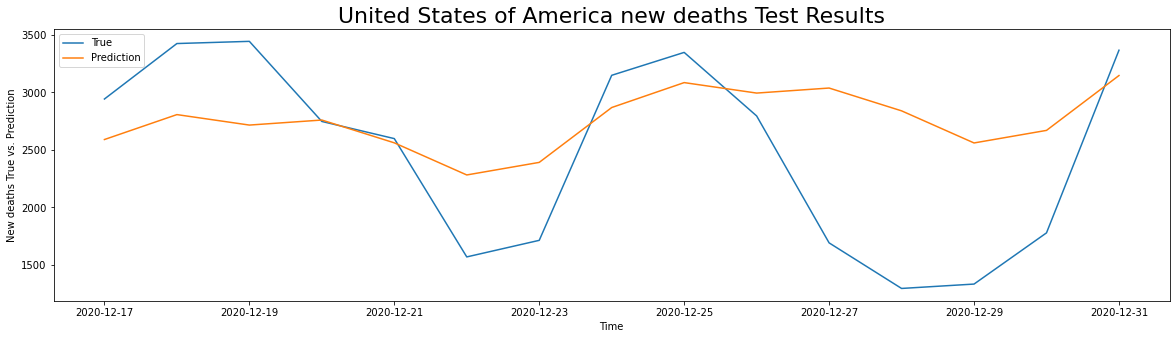

rmse= 680.2121140668906
mape= 23.791111072978353


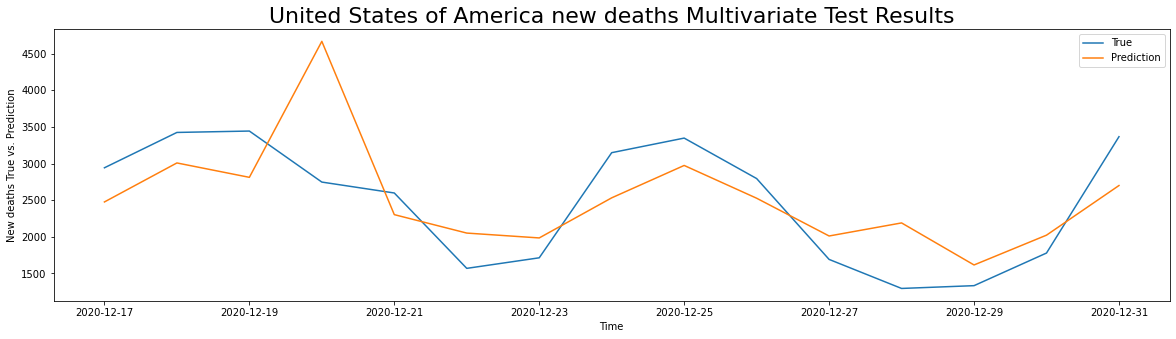

rmse= 635.3410651685188
mape= 23.050787175804015


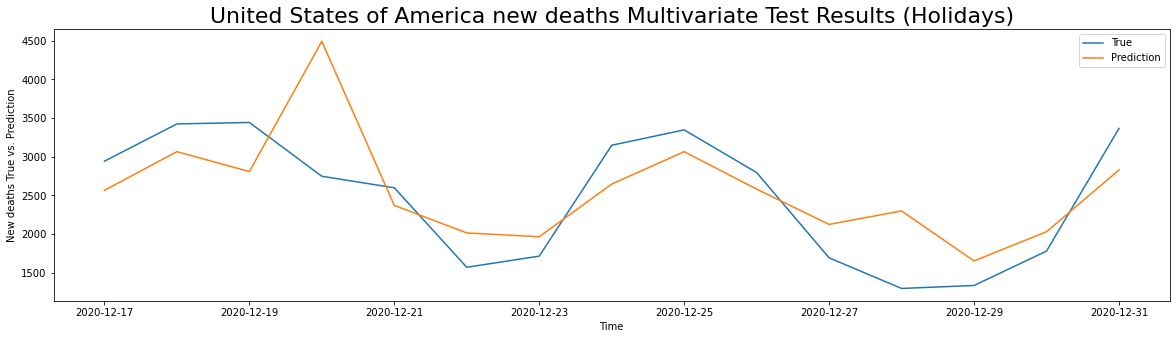

rmse= 624.7286551641422
mape= 23.607931040760327


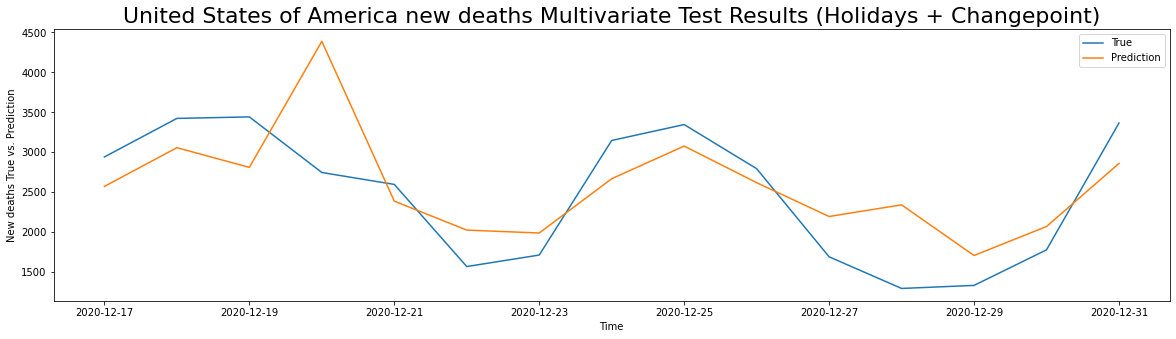

rmse= 4377.716149917136
mape= 24.91236743500159


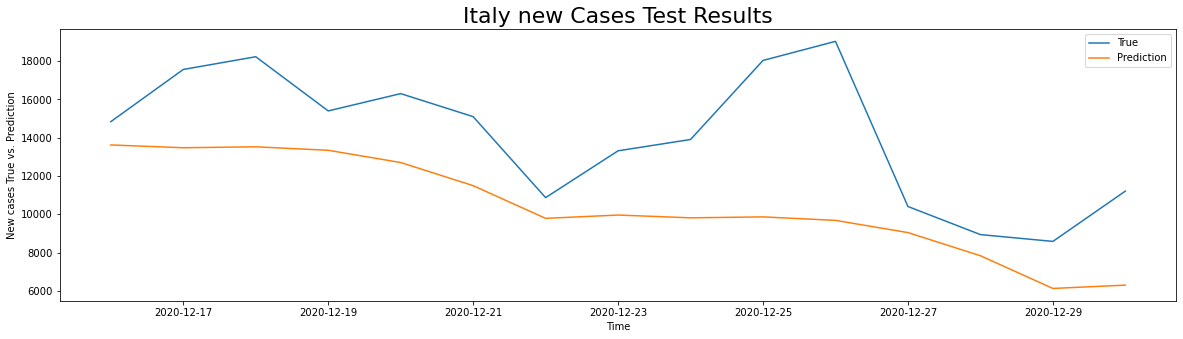

rmse= 4025.3961665385045
mape= 22.436883247034892


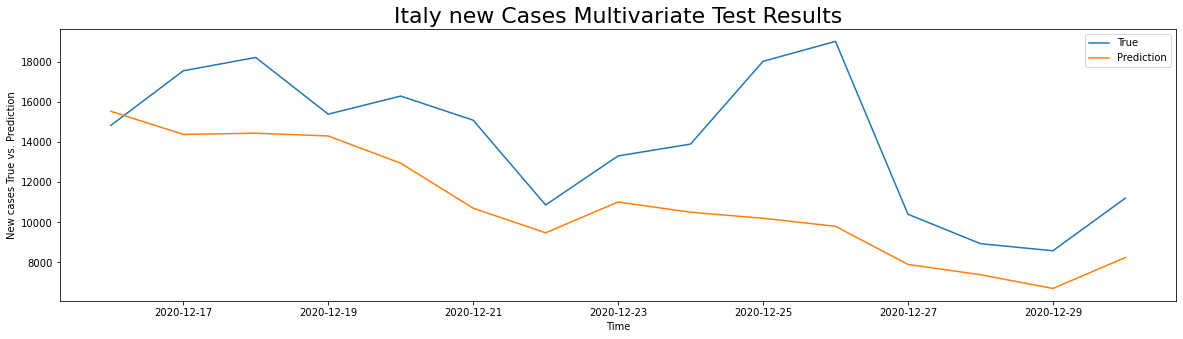

rmse= 3671.1954176099516
mape= 21.063936330995205


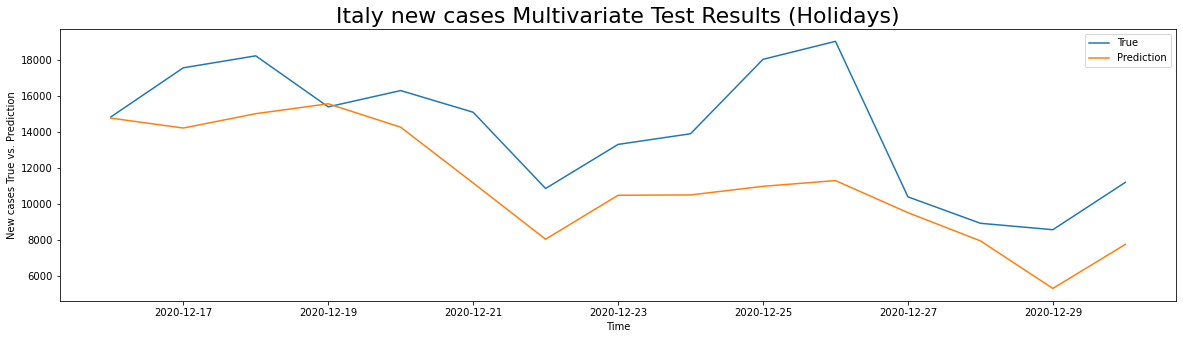

rmse= 2377.2668190162062
mape= 12.670490015714025


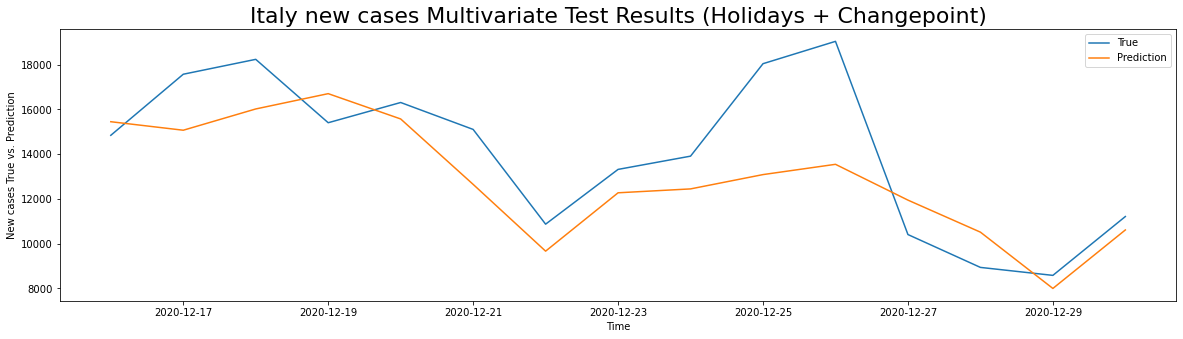

rmse= 127.82071724653332
mape= 22.00956724330247


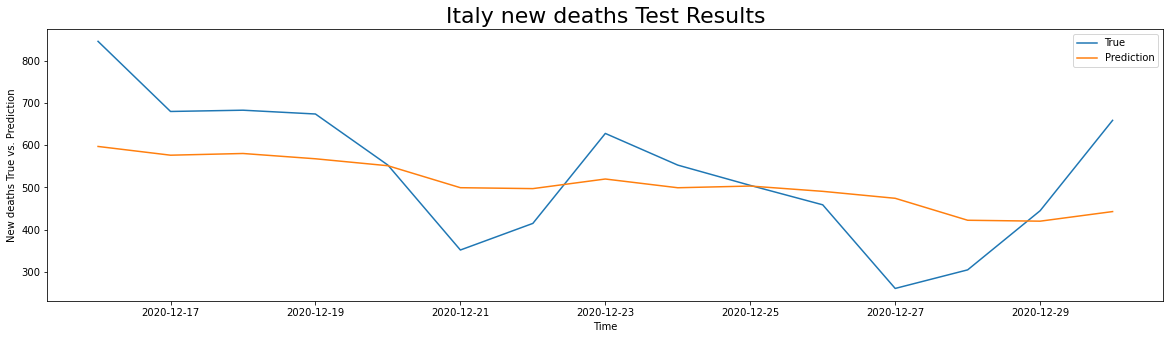

rmse= 124.1513427818414
mape= 22.79836238942531


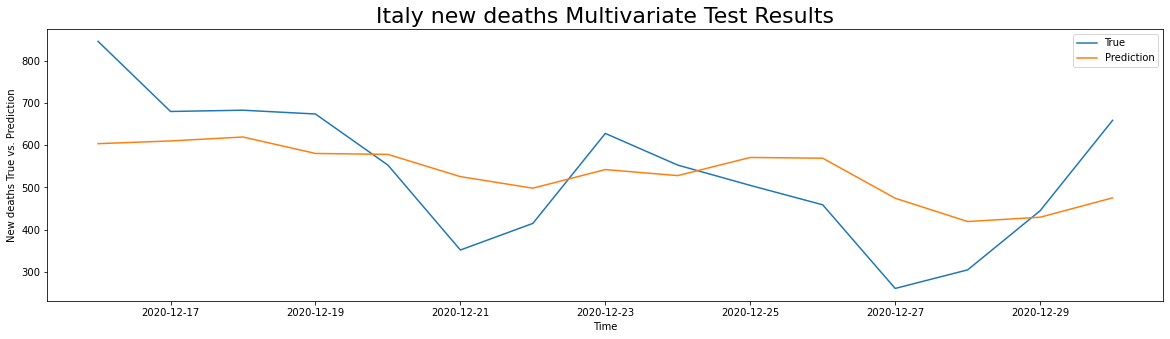

rmse= 115.54016765202812
mape= 21.31920619793646


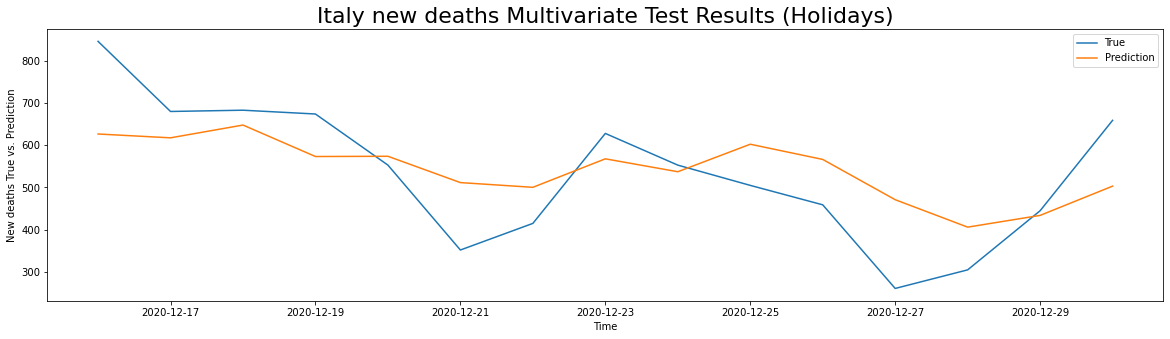

rmse= 123.63259060282498
mape= 23.920126810174775


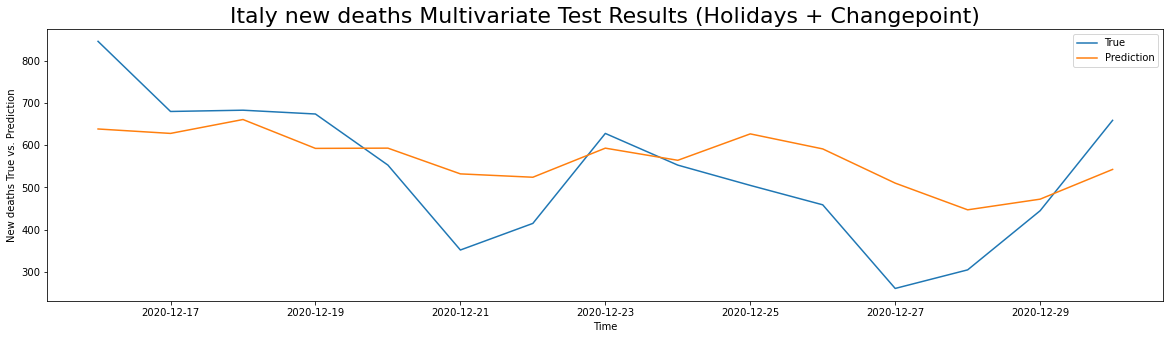

rmse= 497.48776574013954
mape= 12.339143703086334


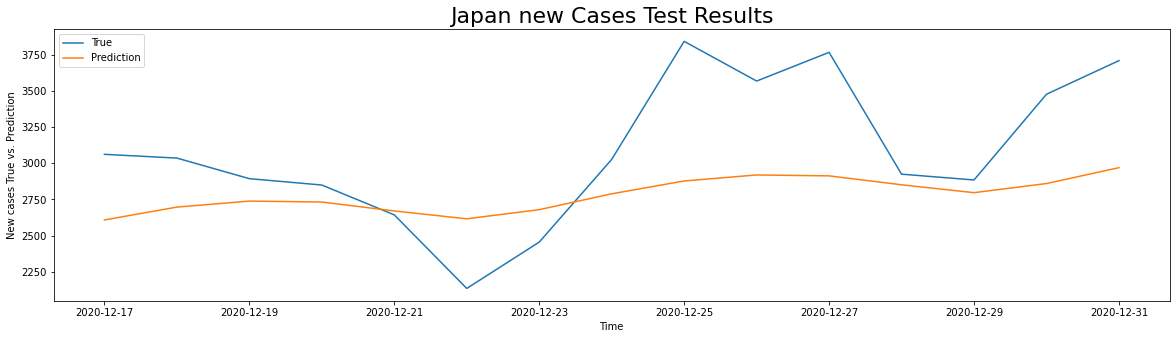

rmse= 488.03622002284754
mape= 12.089639036561644


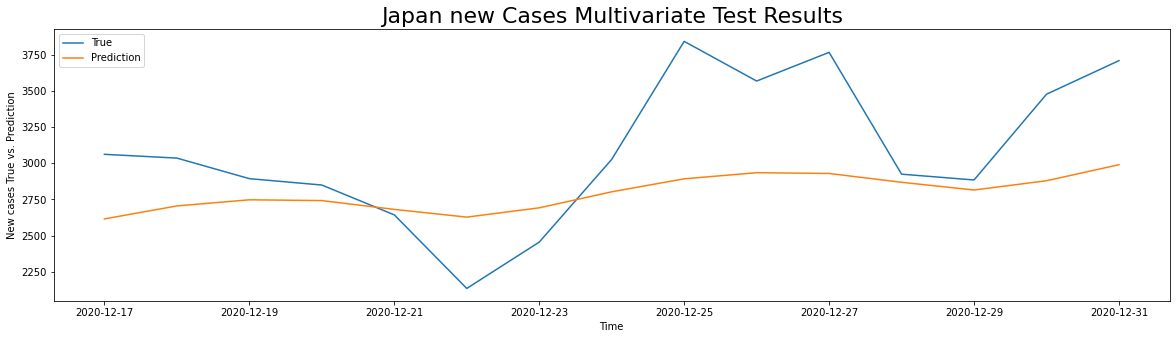

rmse= 443.6936145448831
mape= 10.507889822232869


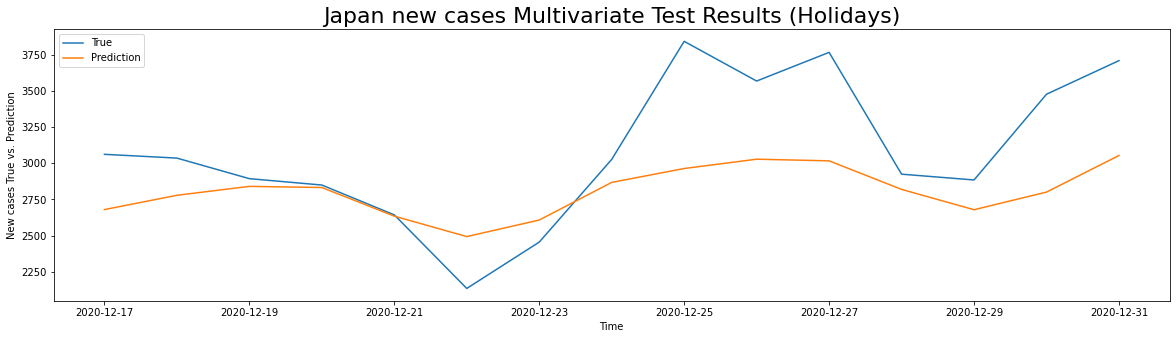

rmse= 488.83072121682676
mape= 11.870395160531807


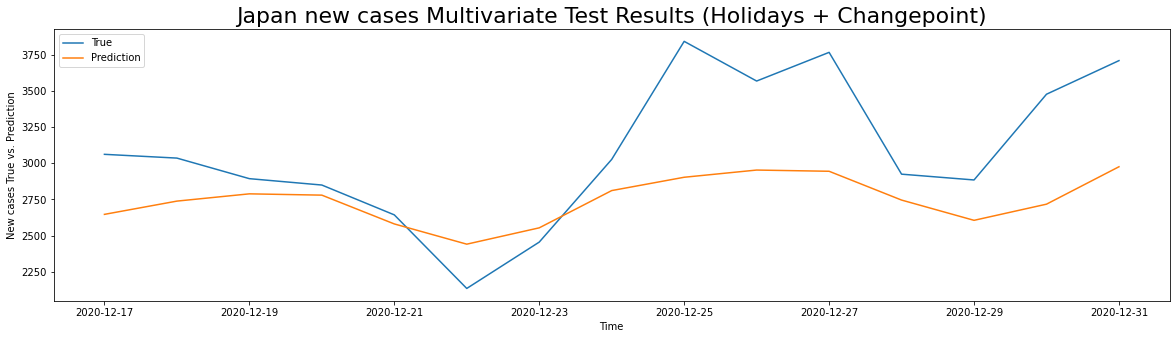

rmse= 8.436116650689083
mape= 15.67800986075878


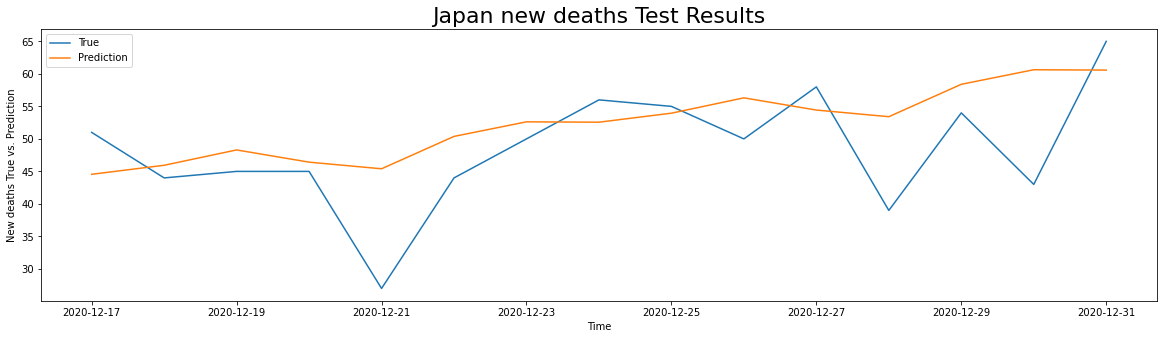

rmse= 8.389019418527516
mape= 15.627546510719442


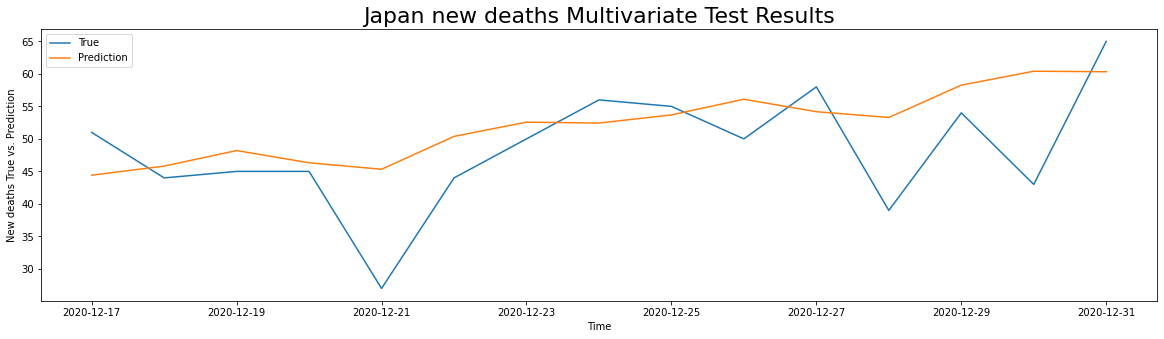

rmse= 7.766265270115264
mape= 14.567169622762266


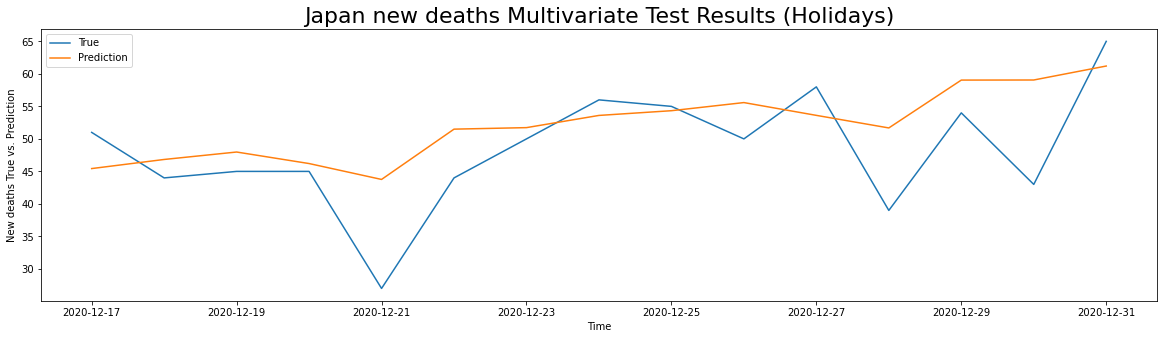

rmse= 7.769965705259706
mape= 14.579257448462748


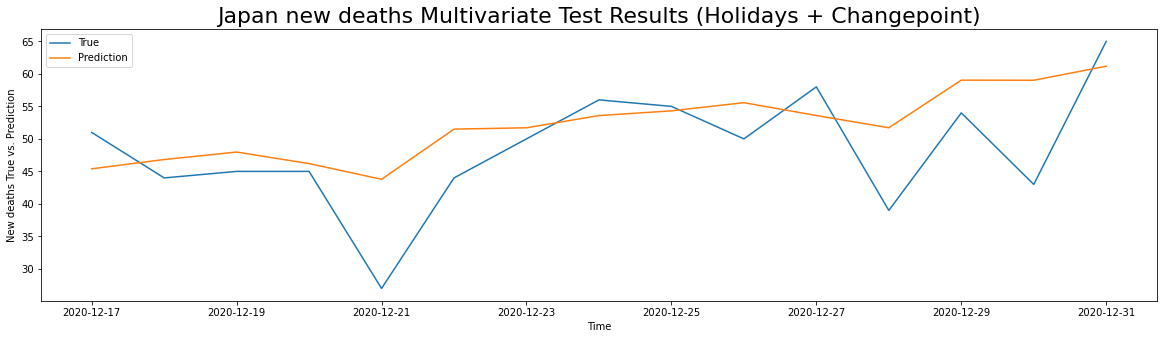

rmse= 102.89508709987481
mape= 75.26613384647544


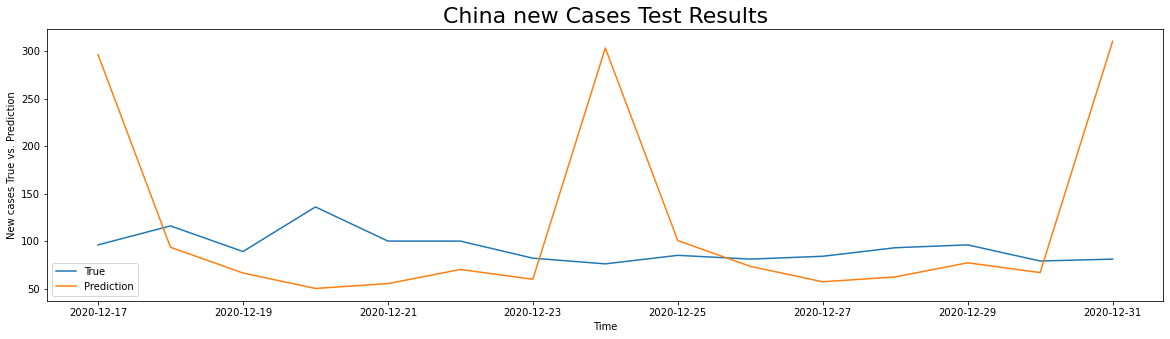

rmse= 103.7838958104858
mape= 73.09177032943168


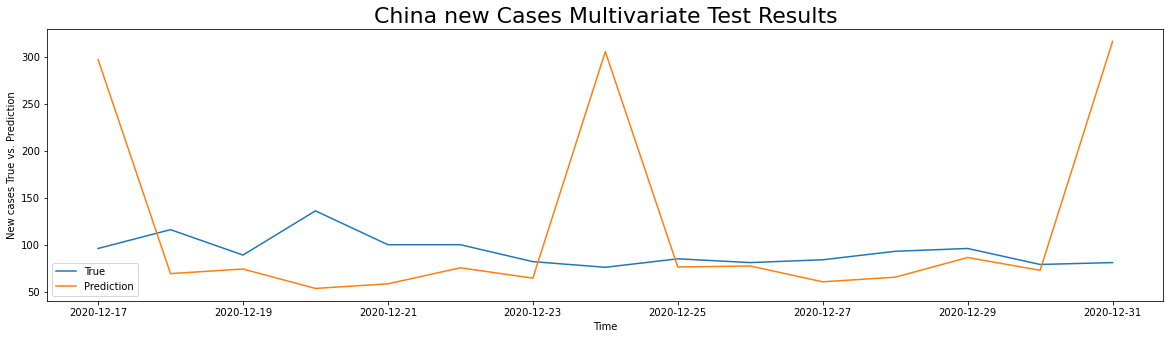

rmse= 27.388073663571245
mape= 25.3577936924134


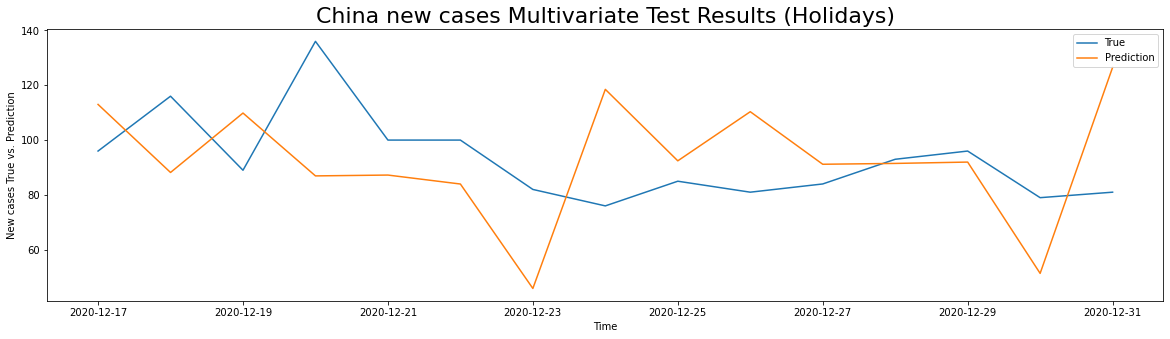

rmse= 27.58937270580183
mape= 25.41914960422112


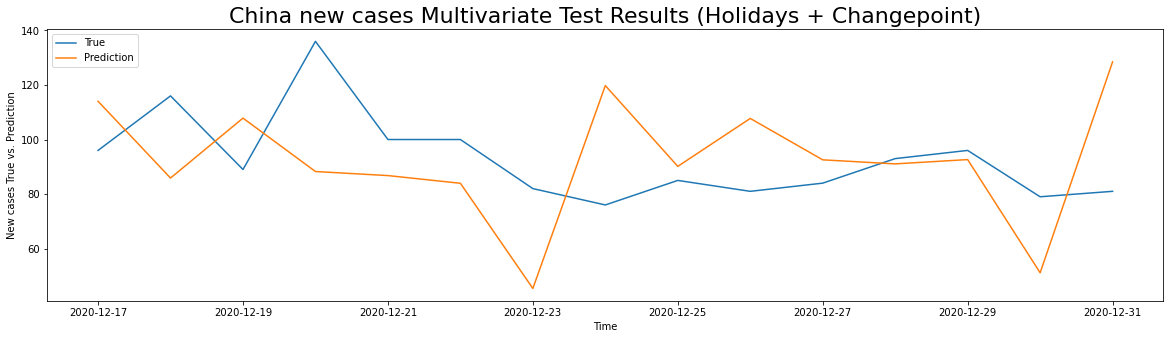

rmse= 7.9400718214764465
mape= inf


<ipython-input-13-2da53f1fe06d>:160: RuntimeWarning: divide by zero encountered in true_divide
  mape=np.mean((np.abs(df_model[-day:]["y"].values - np.abs(test['yhat'][-day:].values)))/(df_model[-day:]["y"].values))*100


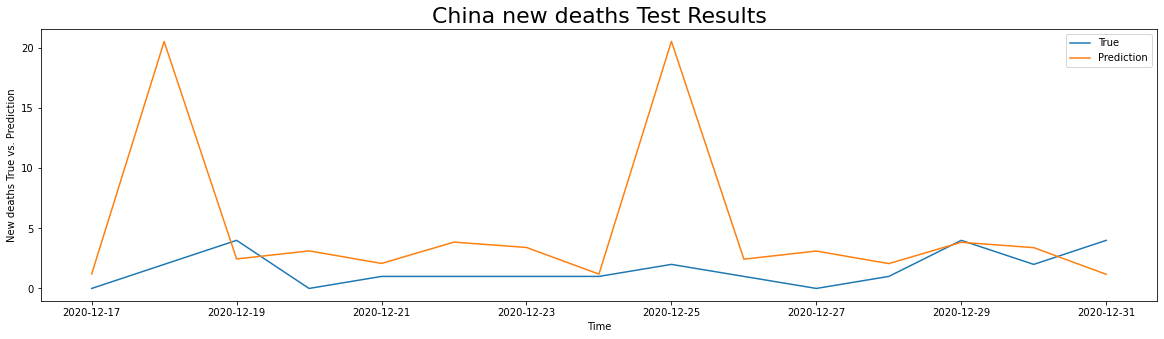

rmse= 8.099481568021847
mape= inf


<ipython-input-13-2da53f1fe06d>:190: RuntimeWarning: divide by zero encountered in true_divide
  mape=np.mean((np.abs(df_model[-day:]["y"].values - np.abs(test['yhat'][-day:].values)))/(df_model[-day:]["y"].values))*100


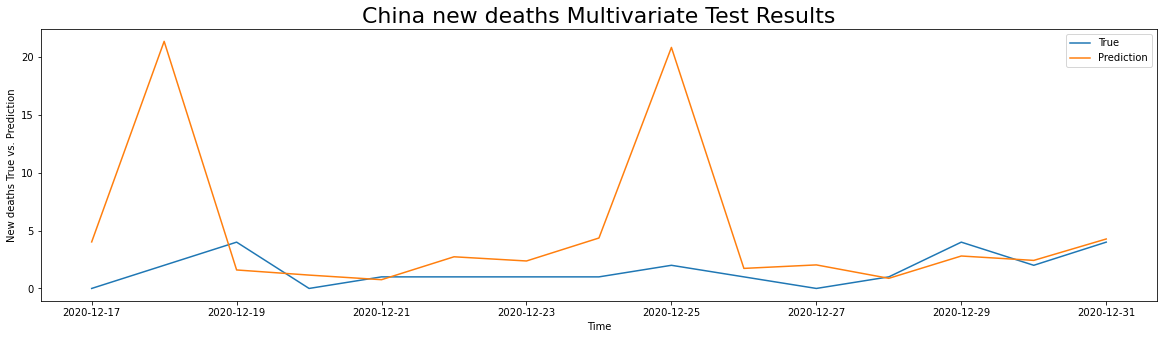

rmse= 2.4293624406882532
mape= inf


<ipython-input-13-2da53f1fe06d>:221: RuntimeWarning: divide by zero encountered in true_divide
  mape=np.mean((np.abs(df_model[-day:]["y"].values - np.abs(test['yhat'][-day:].values)))/(df_model[-day:]["y"].values))*100


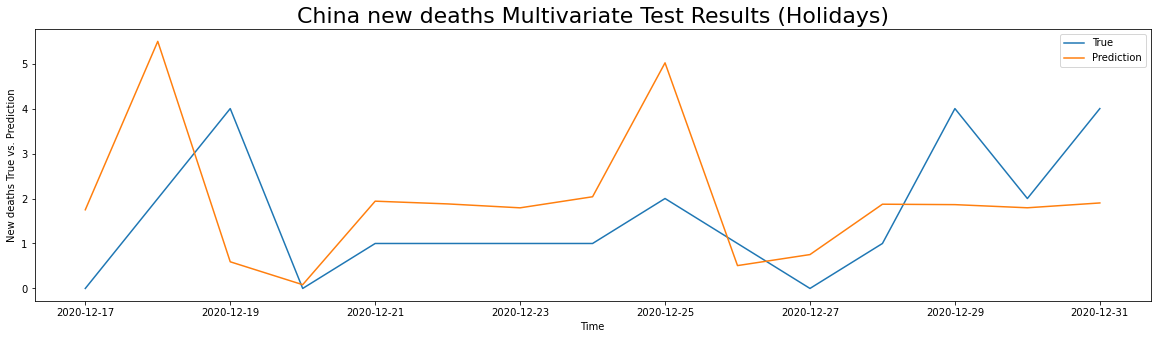

rmse= 2.381302909069507
mape= inf


<ipython-input-13-2da53f1fe06d>:249: RuntimeWarning: divide by zero encountered in true_divide
  mape=np.mean((np.abs(df_model[-day:]["y"].values - test['yhat'][-day:].values))/(df_model[-day:]["y"].values))*100


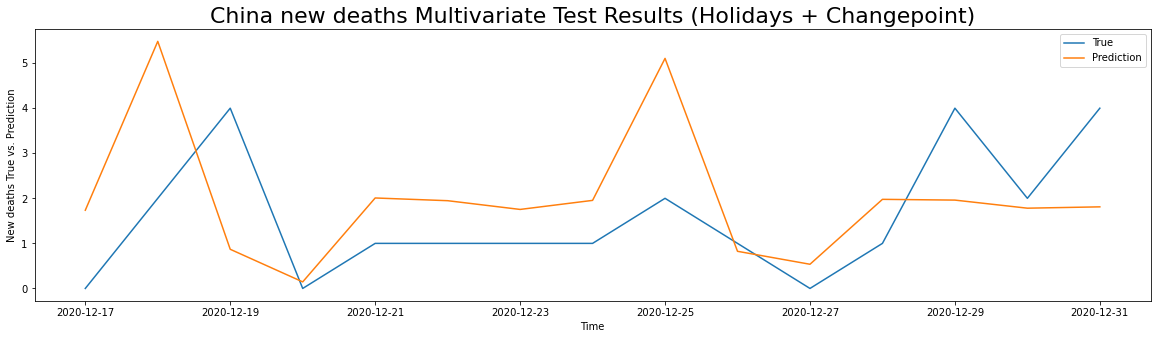

rmse= 3825.0435727685926
mape= 46.8364233710935


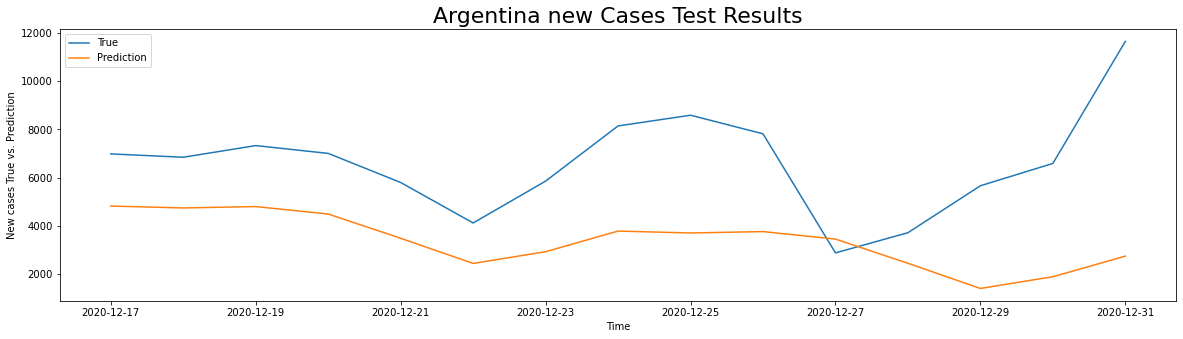

rmse= 3821.2539501663828
mape= 46.63736361464454


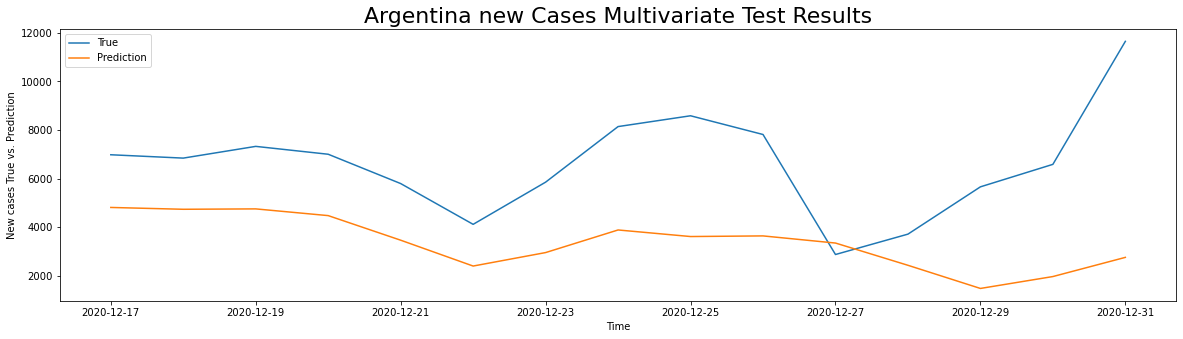

rmse= 3164.054871468924
mape= 42.43539540221455


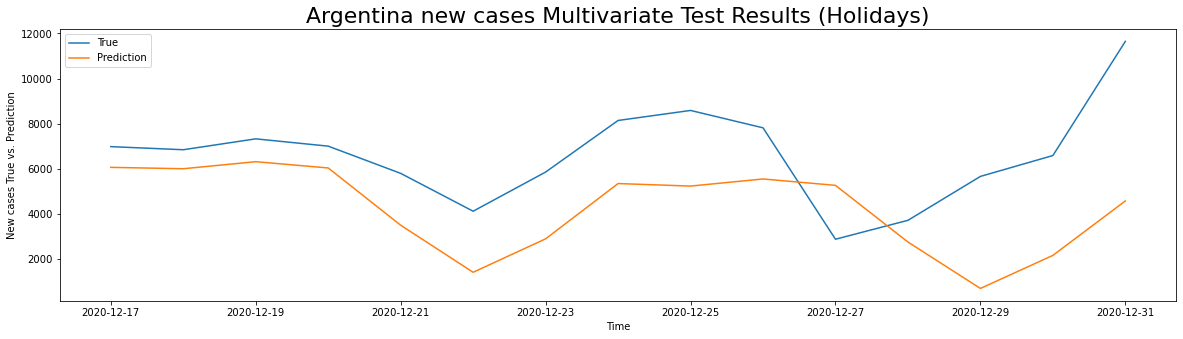

rmse= 1889.3967926618413
mape= 26.788307528357397


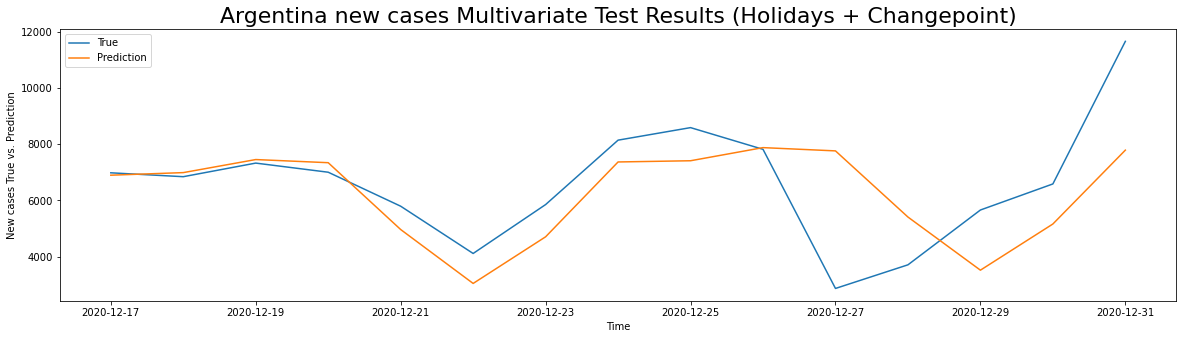

rmse= 75.0233032051083
mape= 50.67284903176109


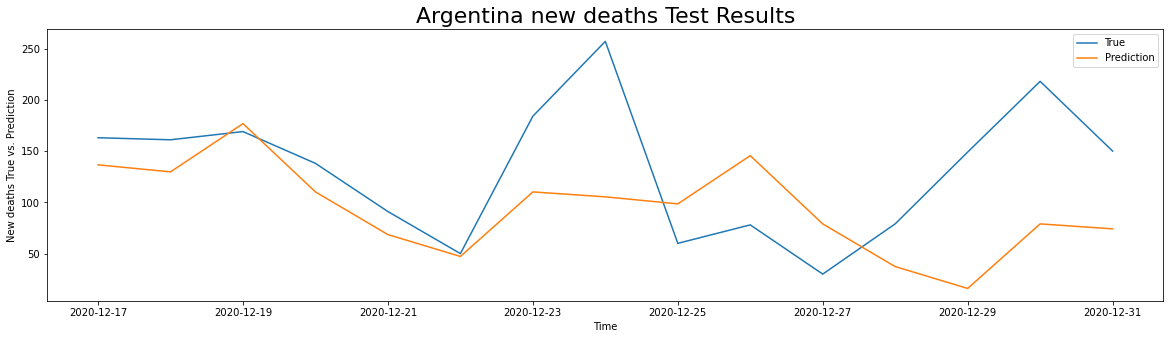

rmse= 81.86608190740864
mape= 71.22768803963574


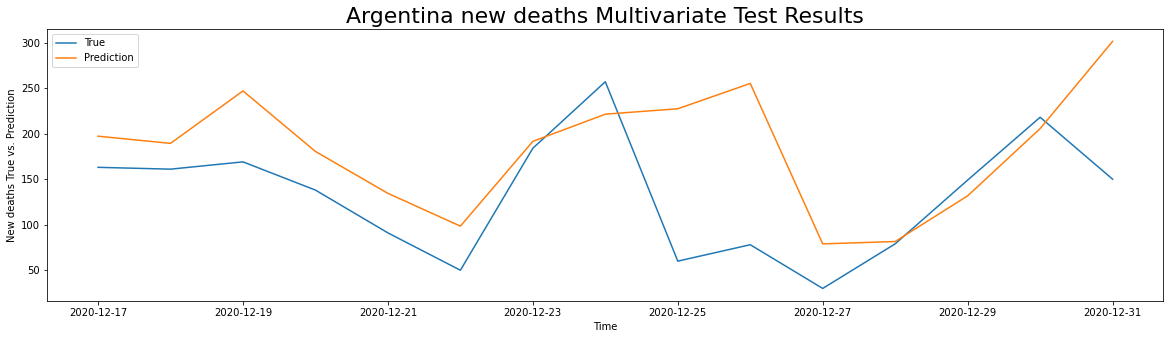

rmse= 76.2709877427252
mape= 74.3336407222715


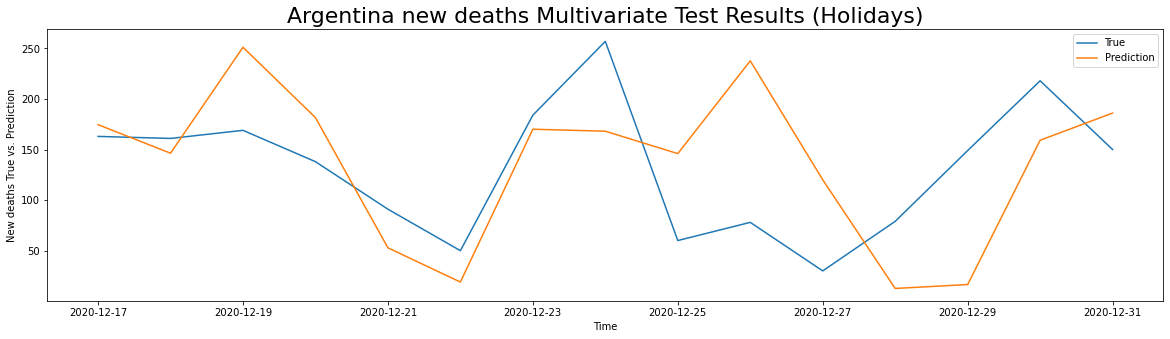

rmse= 75.73709907842553
mape= 73.57536497464294


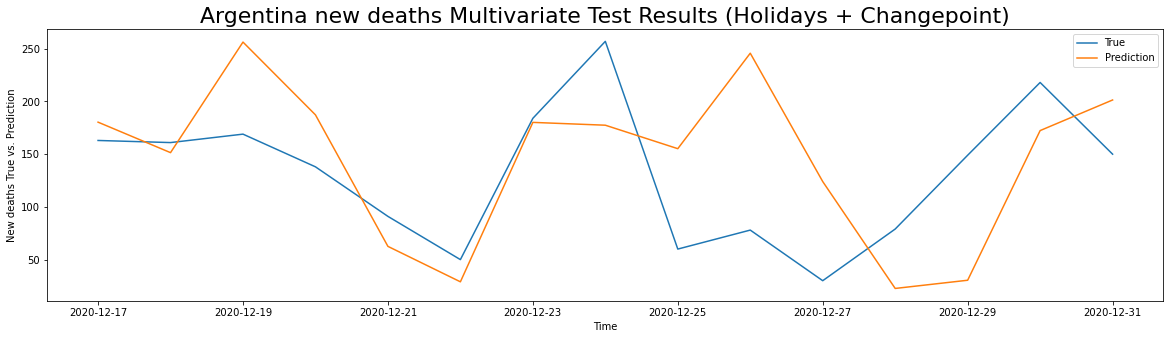

rmse= 22.29960935834674
mape= inf


<ipython-input-13-2da53f1fe06d>:47: RuntimeWarning: divide by zero encountered in true_divide
  mape=np.mean((np.abs(df_model[-day:]["y"].values - np.abs(test['yhat'][-day:].values)))/df_model[-day:]["y"].values)*100


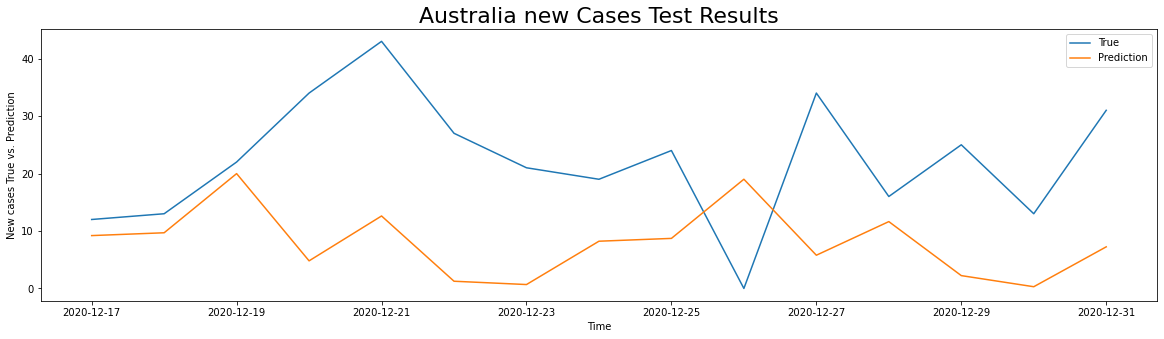

rmse= 21.30656187045777
mape= inf


<ipython-input-13-2da53f1fe06d>:75: RuntimeWarning: divide by zero encountered in true_divide
  mape=np.mean((np.abs(df_model[-day:]["y"].values - np.abs(test['yhat'][-day:].values)))/df_model[-day:]["y"].values)*100


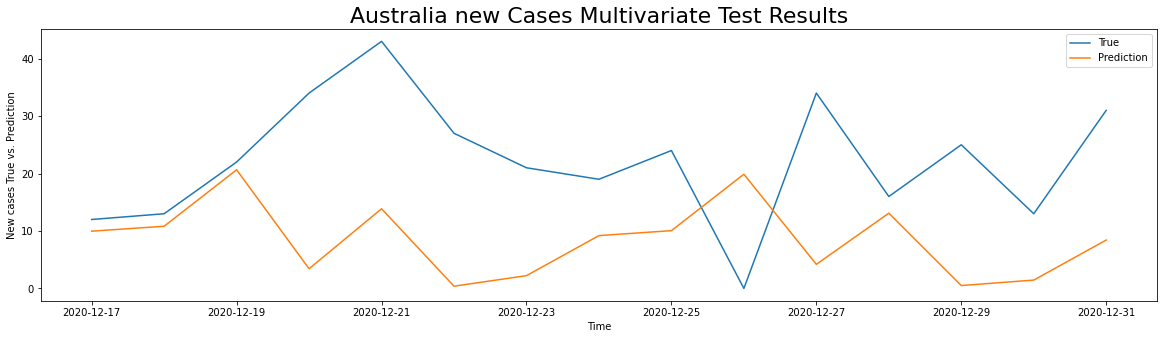

rmse= 22.394212656457476
mape= inf


<ipython-input-13-2da53f1fe06d>:103: RuntimeWarning: divide by zero encountered in true_divide
  mape=np.mean((np.abs(df_model[-day:]["y"].values - np.abs(test['yhat'][-day:].values)))/df_model[-day:]["y"].values)*100


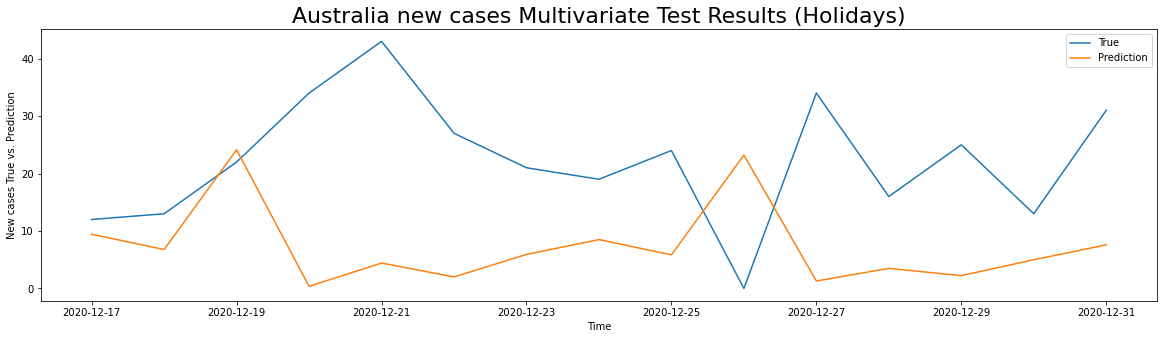

rmse= 21.868110491929546
mape= inf


<ipython-input-13-2da53f1fe06d>:132: RuntimeWarning: divide by zero encountered in true_divide
  mape=np.mean((np.abs(df_model[-day:]["y"].values - np.abs(test['yhat'][-day:].values)))/df_model[-day:]["y"].values)*100


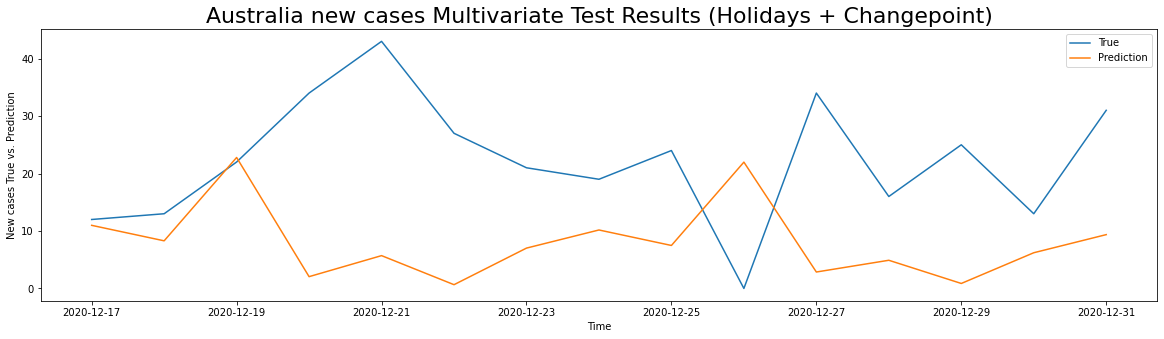

rmse= 0.5166895457883056
mape= inf


<ipython-input-13-2da53f1fe06d>:160: RuntimeWarning: divide by zero encountered in true_divide
  mape=np.mean((np.abs(df_model[-day:]["y"].values - np.abs(test['yhat'][-day:].values)))/(df_model[-day:]["y"].values))*100


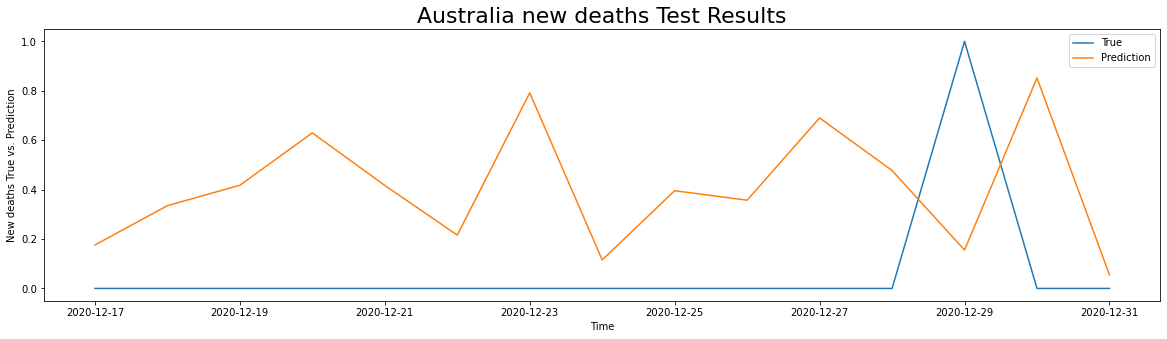

rmse= 0.4654207669742603
mape= inf


<ipython-input-13-2da53f1fe06d>:190: RuntimeWarning: divide by zero encountered in true_divide
  mape=np.mean((np.abs(df_model[-day:]["y"].values - np.abs(test['yhat'][-day:].values)))/(df_model[-day:]["y"].values))*100


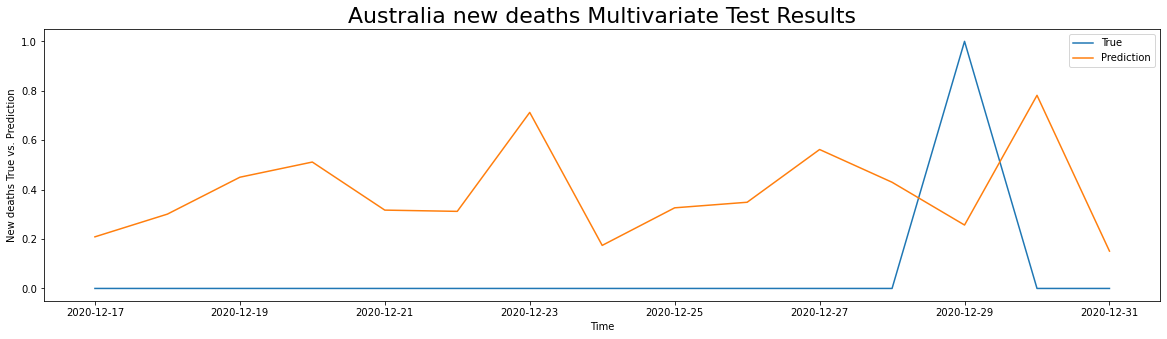

rmse= 0.8632571300382175
mape= inf


<ipython-input-13-2da53f1fe06d>:221: RuntimeWarning: divide by zero encountered in true_divide
  mape=np.mean((np.abs(df_model[-day:]["y"].values - np.abs(test['yhat'][-day:].values)))/(df_model[-day:]["y"].values))*100


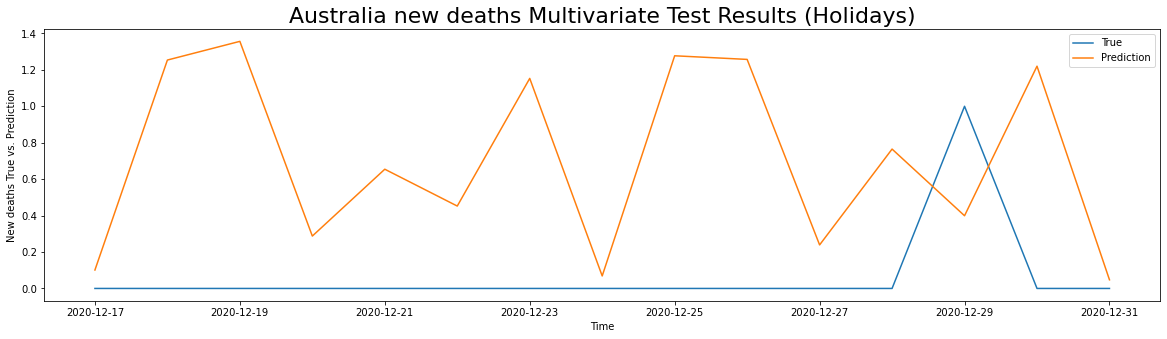

rmse= 0.8675242281526269
mape= inf


<ipython-input-13-2da53f1fe06d>:249: RuntimeWarning: divide by zero encountered in true_divide
  mape=np.mean((np.abs(df_model[-day:]["y"].values - test['yhat'][-day:].values))/(df_model[-day:]["y"].values))*100


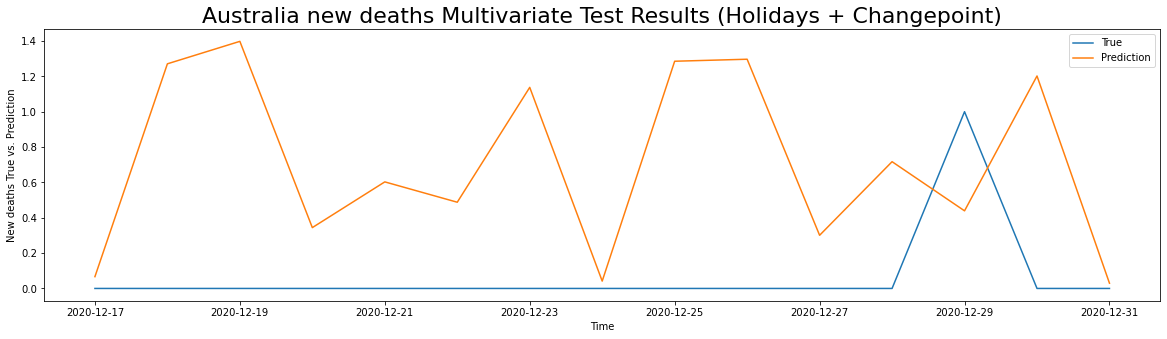

rmse= 17886.77526378913
mape= 54.82231798378261


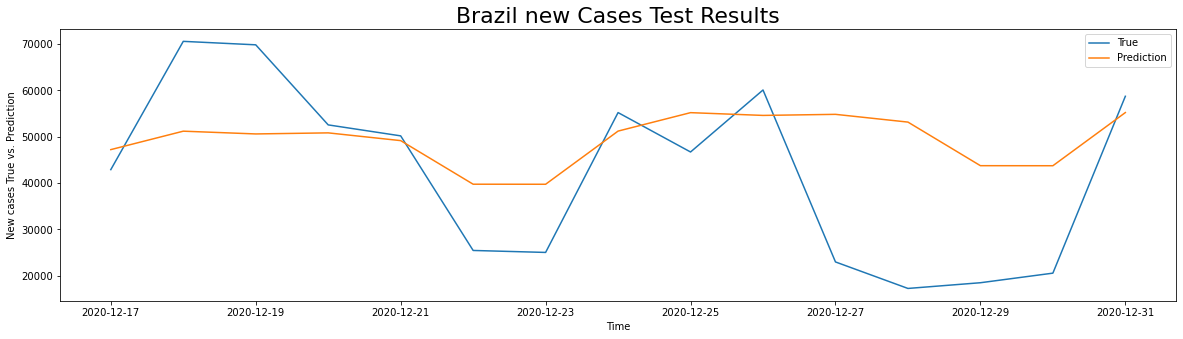

rmse= 13769.665780191677
mape= 43.37156235075911


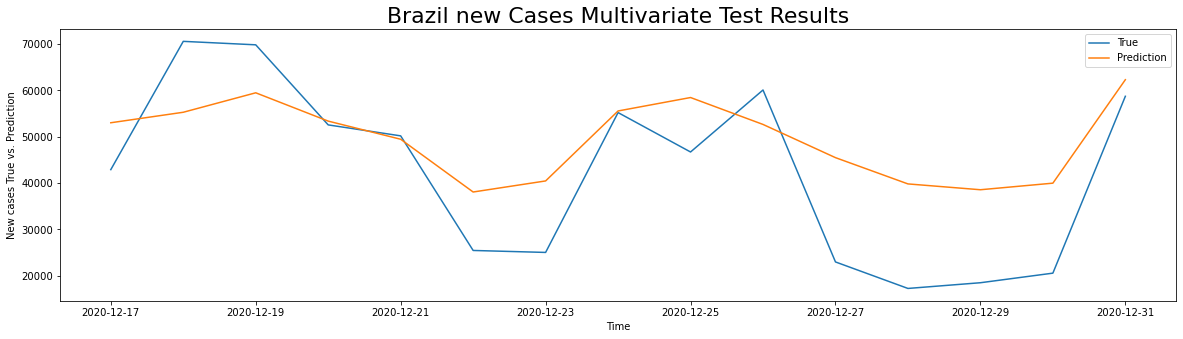

rmse= 13523.644200191173
mape= 42.15652588790004


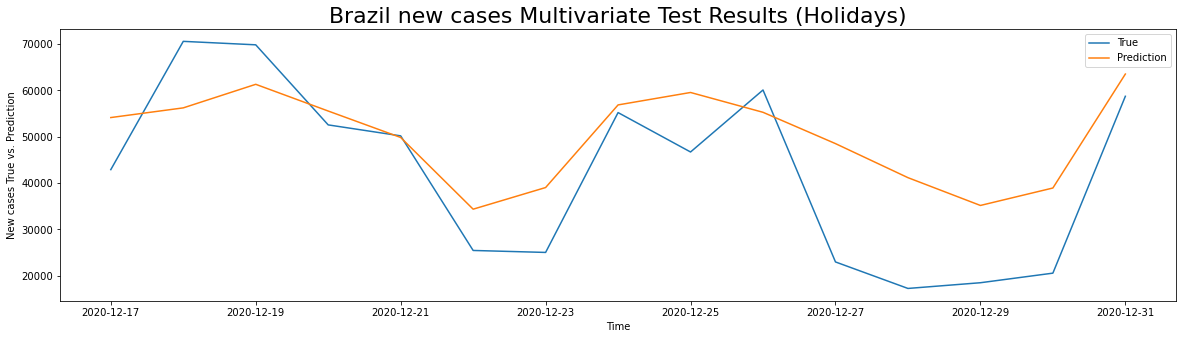

rmse= 13429.374150520245
mape= 41.8082340330893


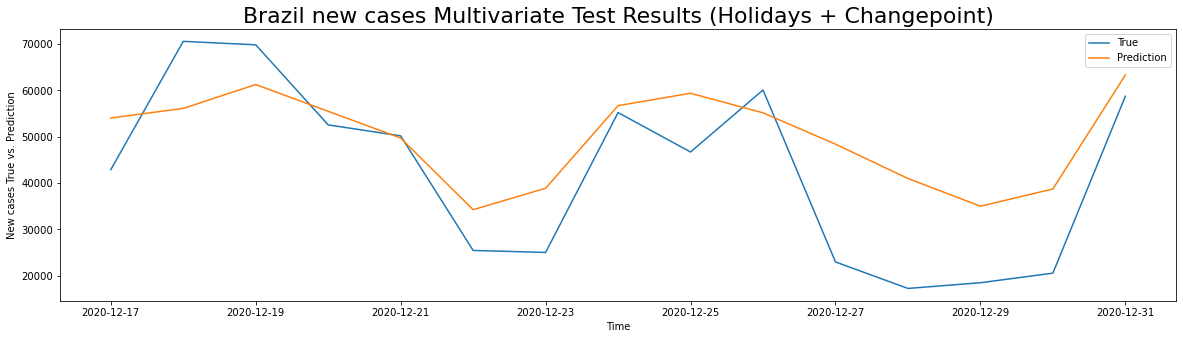

rmse= 195.0347589994404
mape= 27.69871365915873


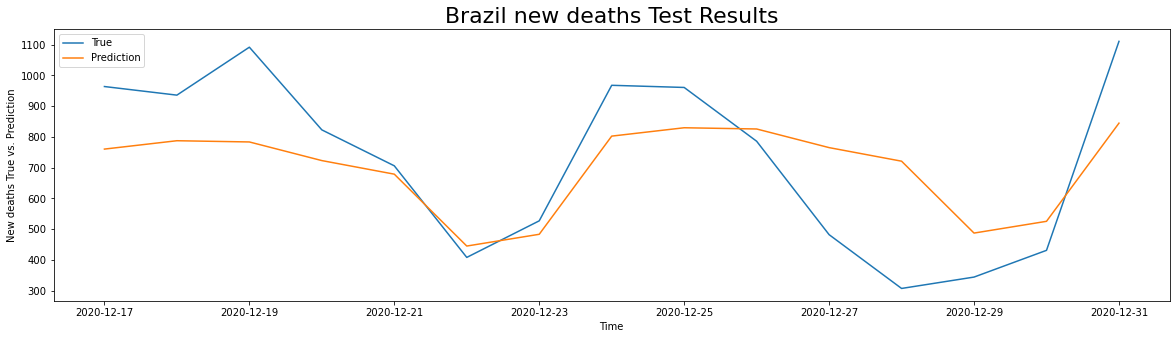

rmse= 154.39824623288476
mape= 22.551326170374995


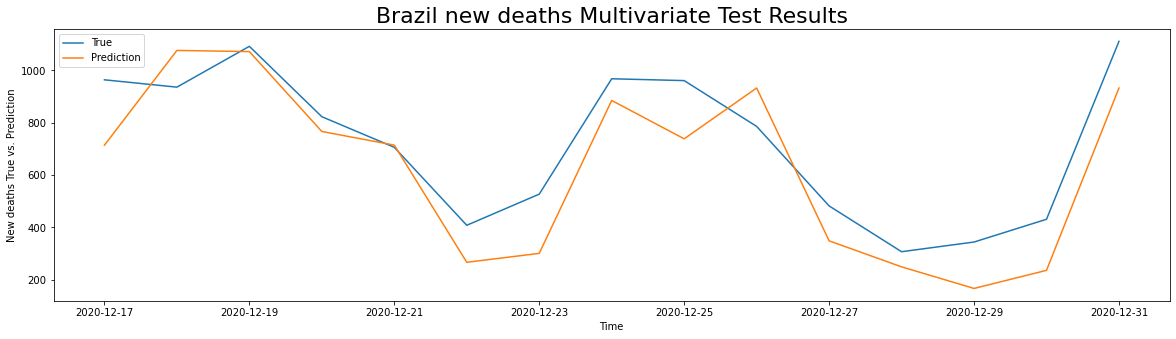

rmse= 158.56373217225803
mape= 23.32174129758201


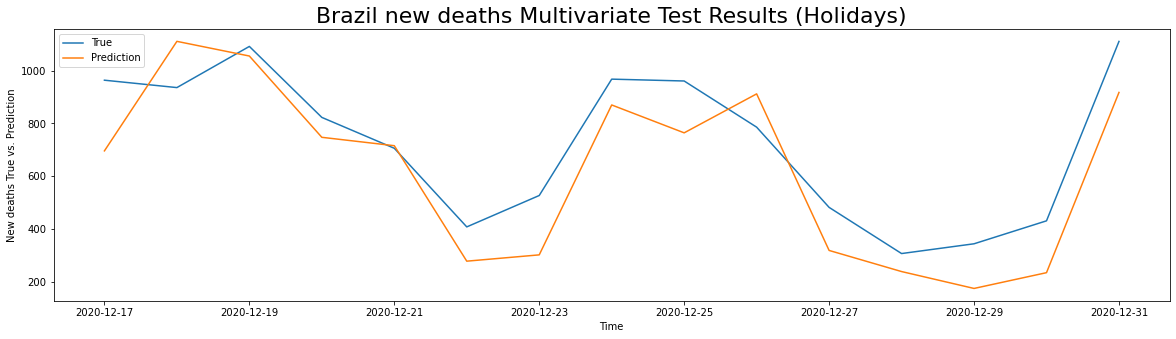

rmse= 166.20555889299666
mape= 24.757293945328662


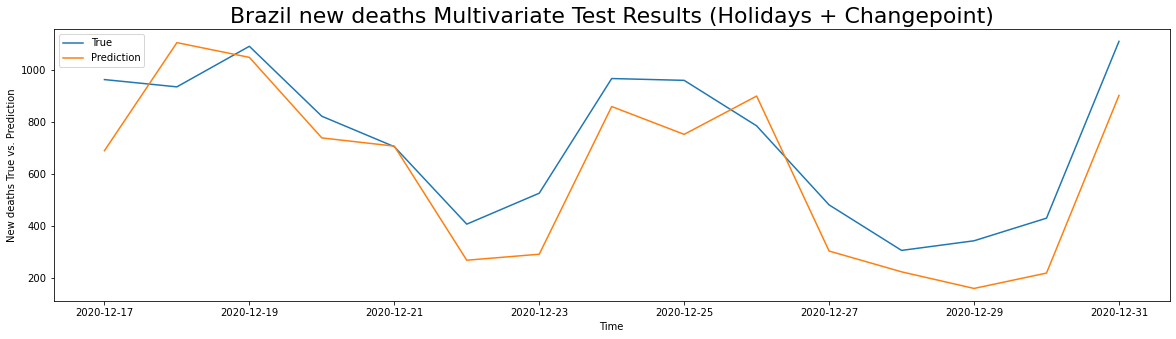

rmse= 4917.097513354746
mape= 20.505433492833124


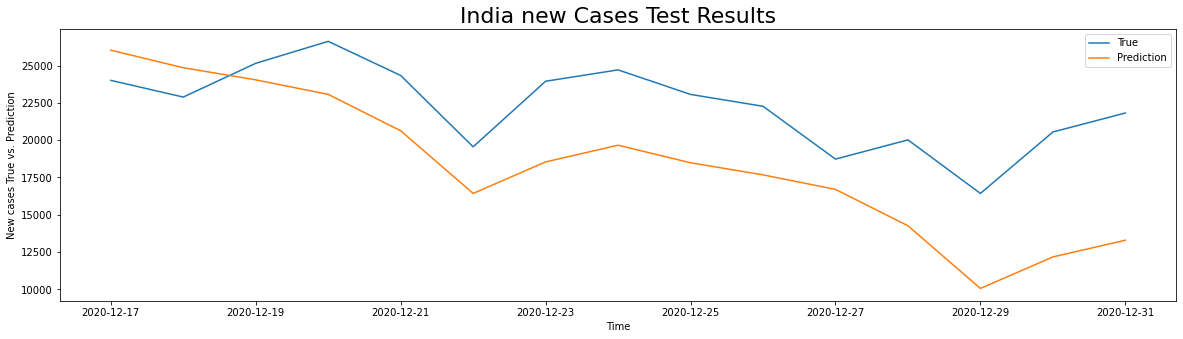

rmse= 4774.047491764967
mape= 19.835845512763566


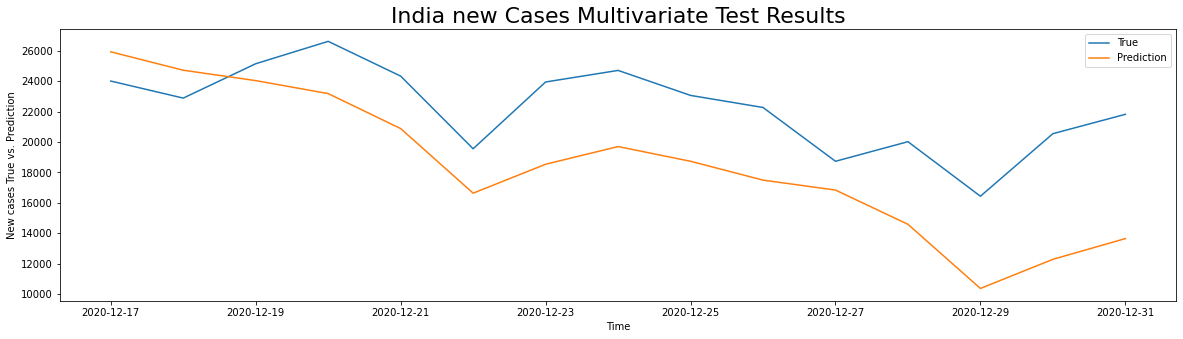

rmse= 4790.665966559154
mape= 19.550143948625784


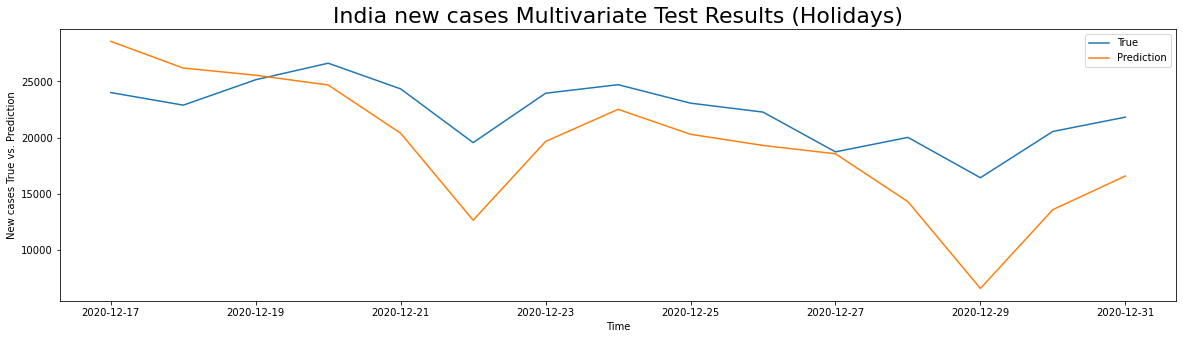

rmse= 4024.5243619995135
mape= 16.40883383234138


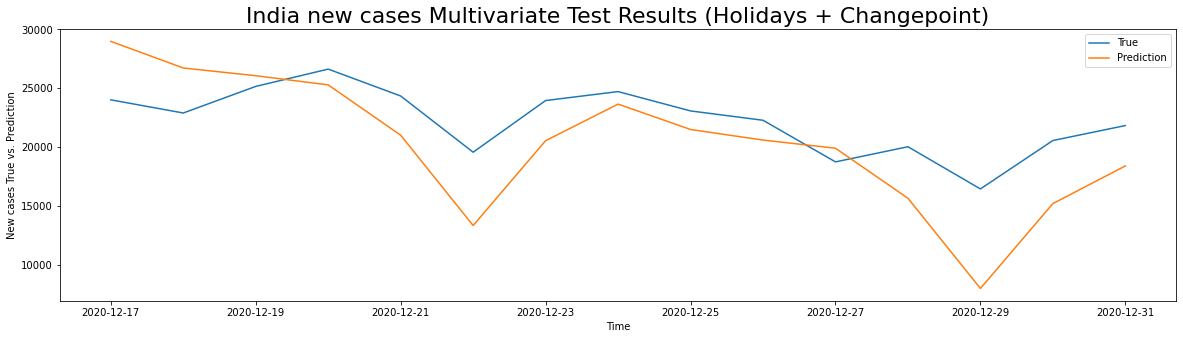

rmse= 54.0855829053648
mape= 16.30898042330298


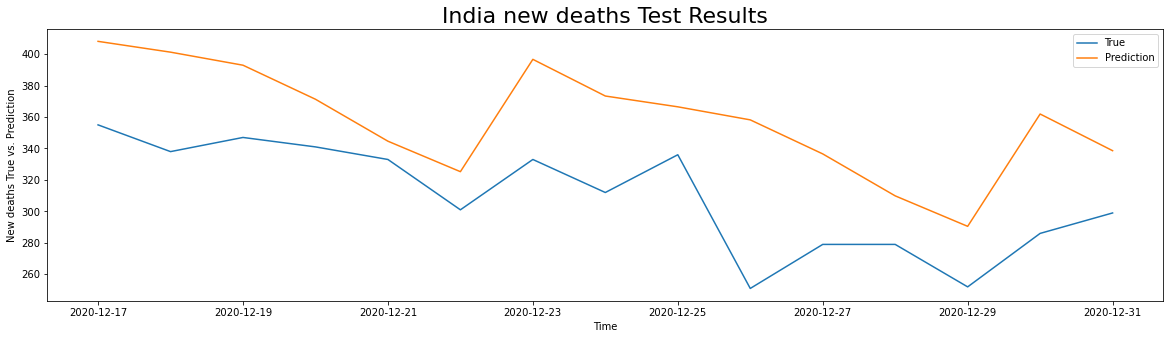

rmse= 44.624036271413
mape= 11.867267302312586


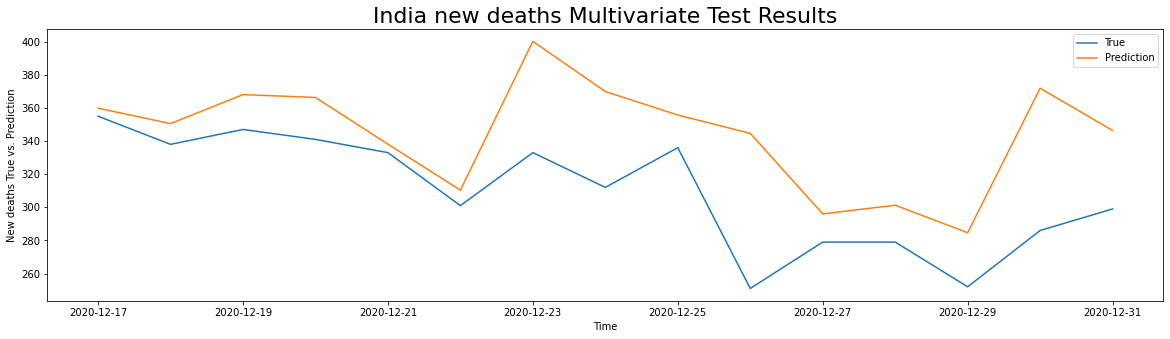

rmse= 44.34255737015939
mape= 12.697728192111402


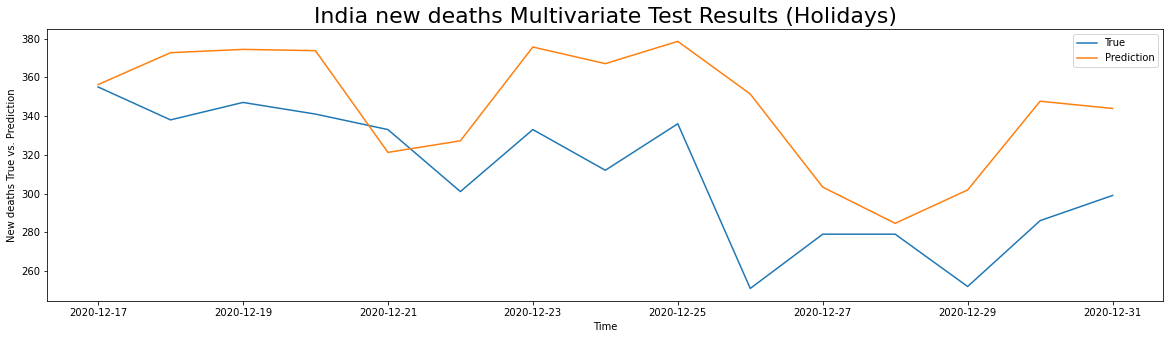

rmse= 42.44717611429164
mape= 12.055151769022181


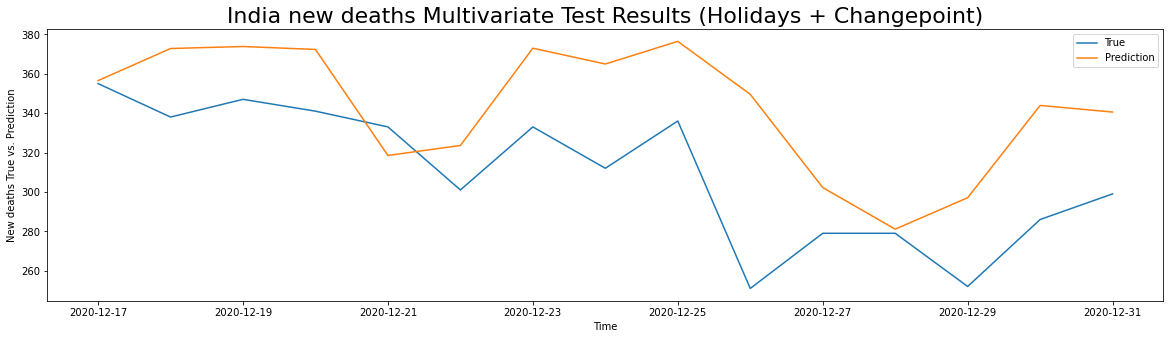

rmse= 561.4344938455736
mape= 6.766049416471259


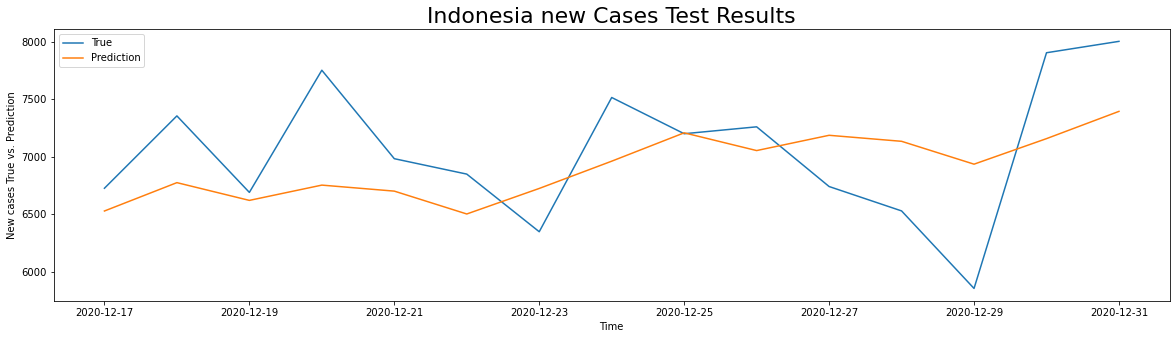

rmse= 807.6267998762006
mape= 9.155241104220693


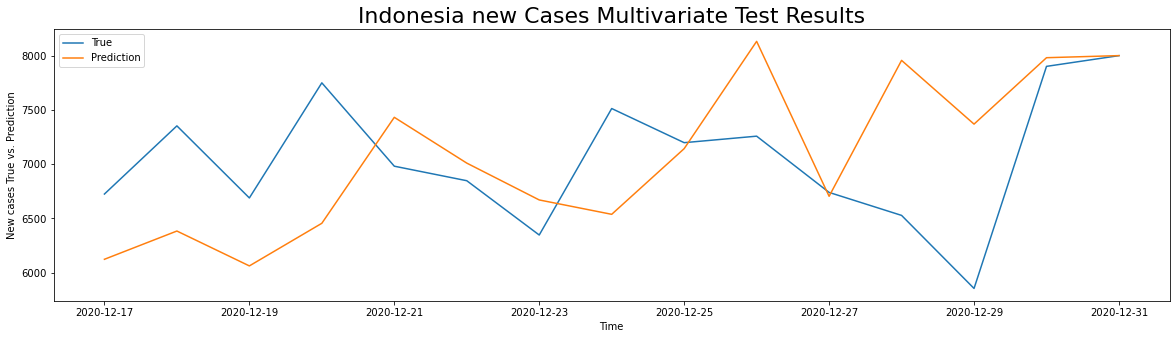

rmse= 754.1597113132887
mape= 8.616328187644413


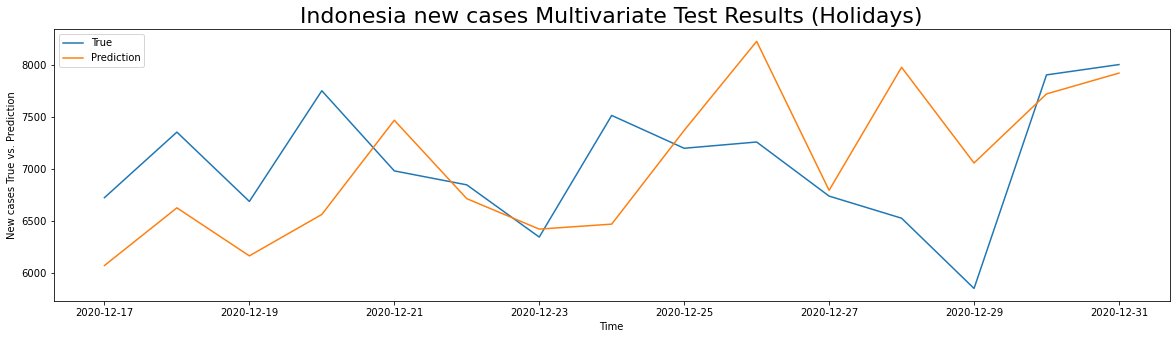

rmse= 752.2560799393941
mape= 8.707856967287235


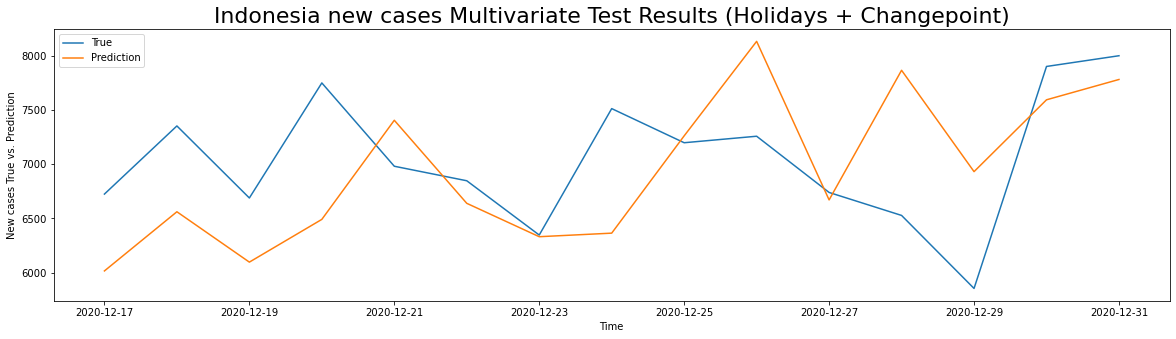

rmse= 40.89426674439377
mape= 19.74413651890003


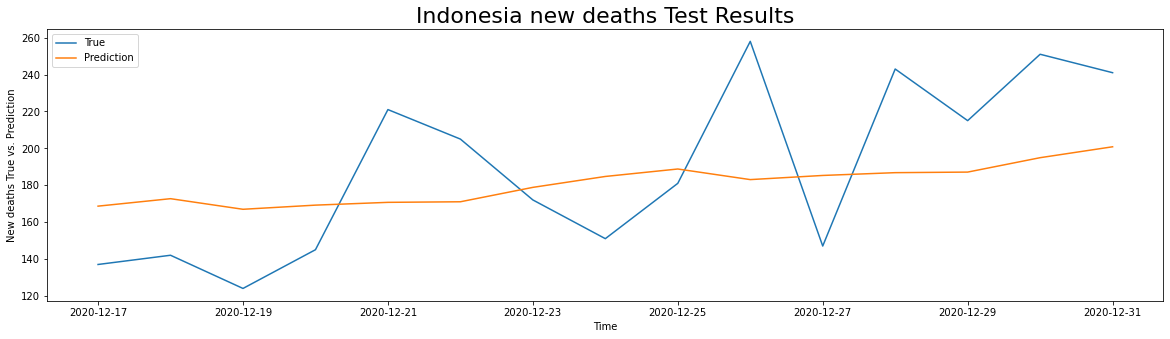

rmse= 45.389293946899635
mape= 21.110464157065888


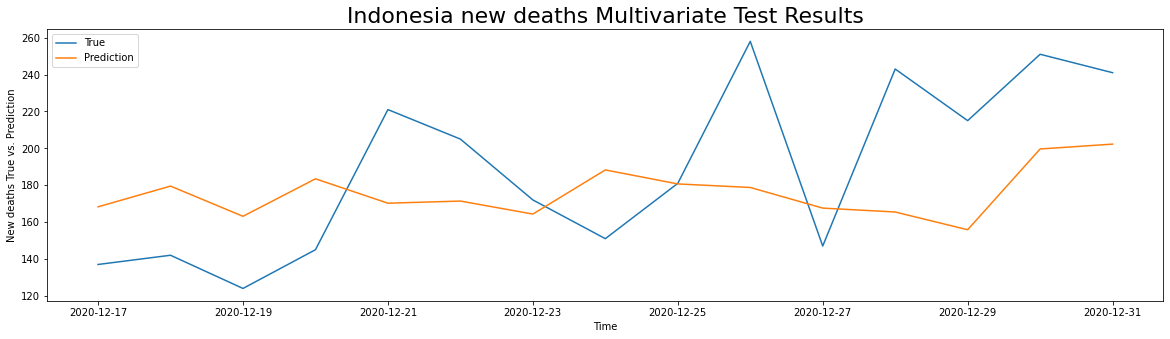

rmse= 46.32655074444019
mape= 20.85542245206998


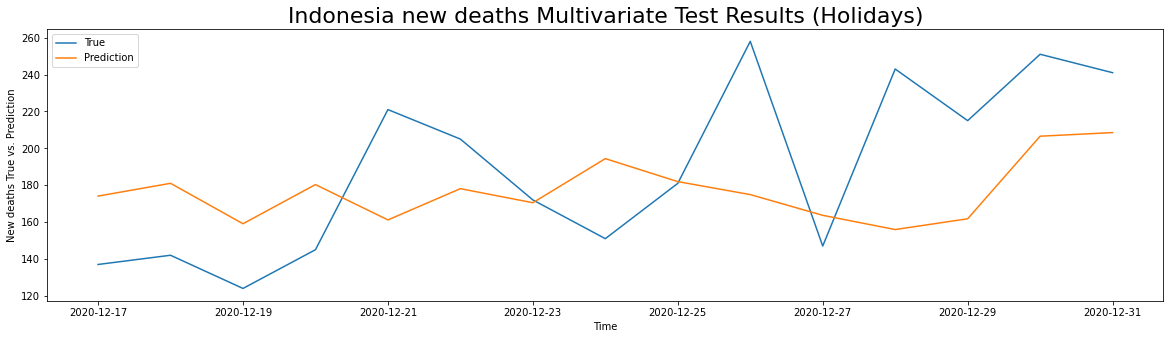

rmse= 46.42012196205112
mape= 20.79862189501143


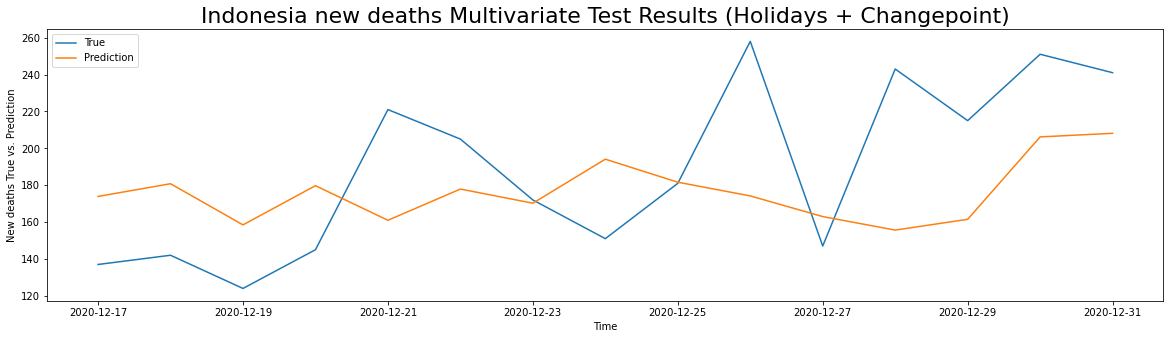

rmse= 4237.32838421821
mape= 47.579125897573896


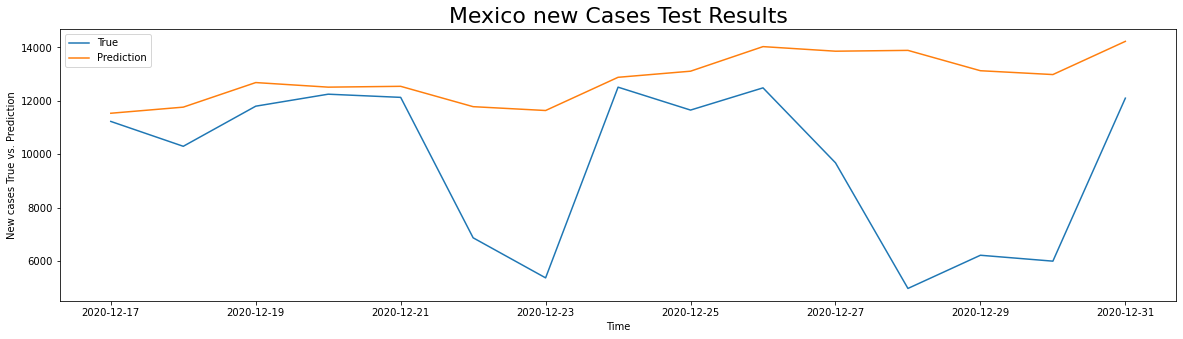

rmse= 2799.4774270436296
mape= 31.744569375591492


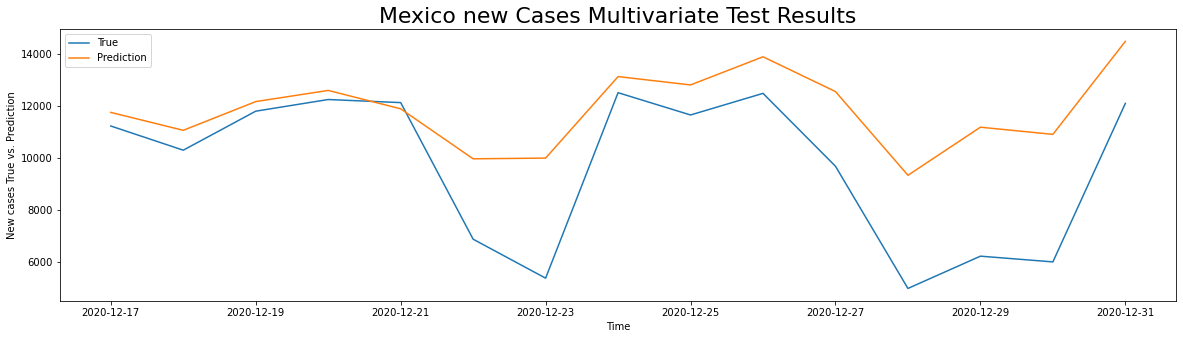

rmse= 2671.2931803116885
mape= 29.834485910942277


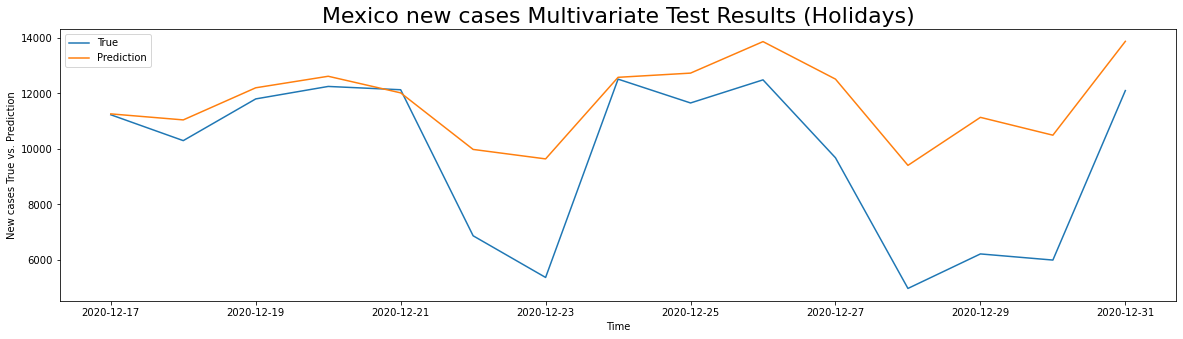

rmse= 2533.512643003646
mape= 28.229577302009645


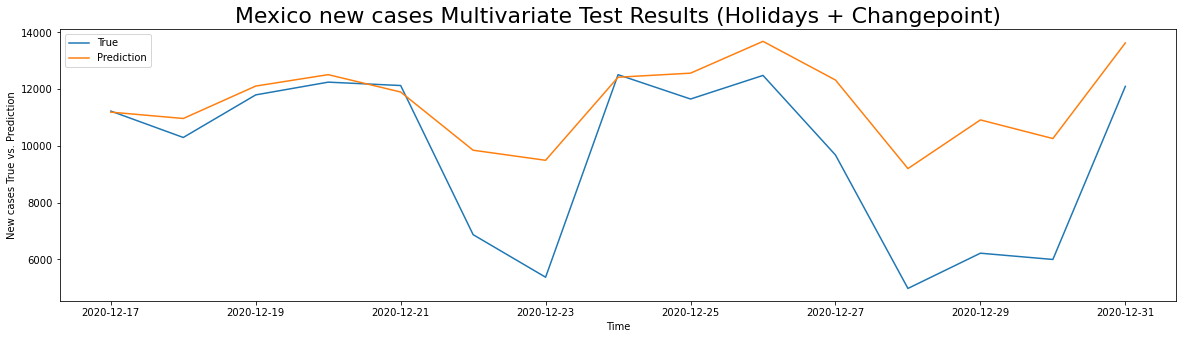

rmse= 158.5428804483269
mape= 29.796772936359368


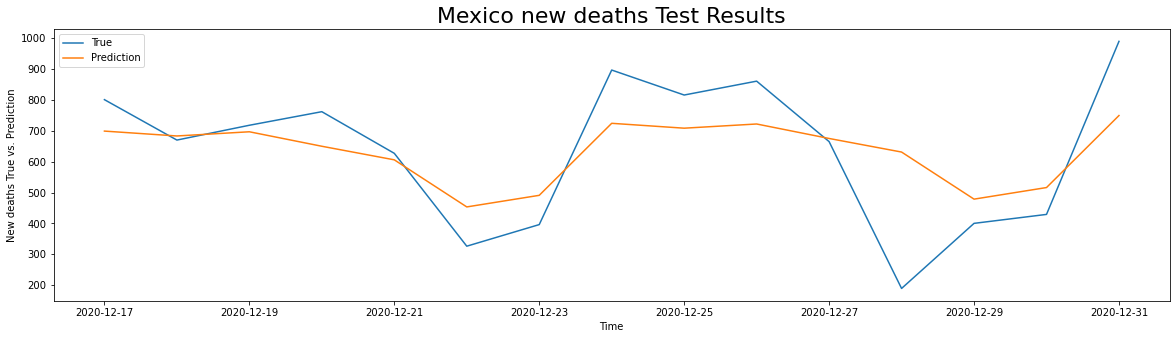

rmse= 314.2079369118241
mape= 37.6885705101543


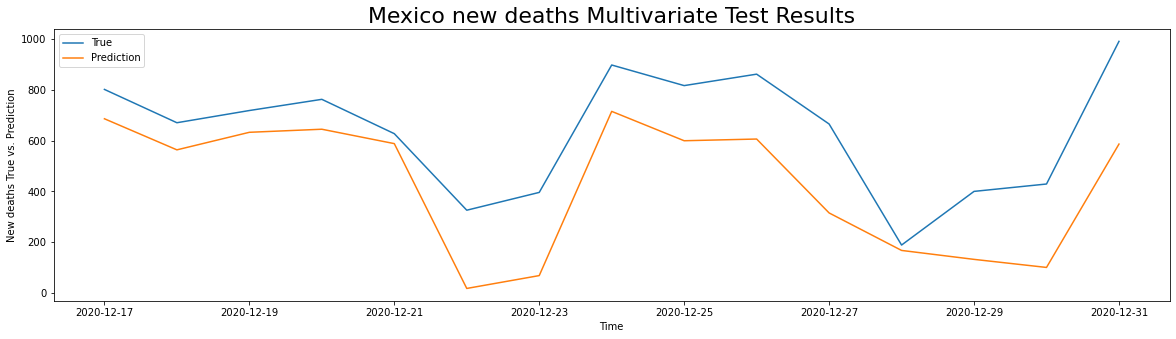

rmse= 305.91814018707186
mape= 35.500213271263696


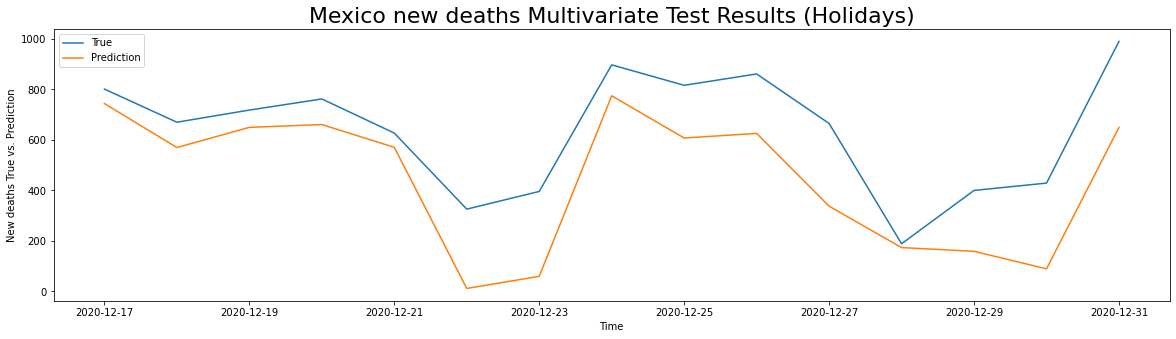

rmse= 290.7363653247742
mape= 55.215412273017996


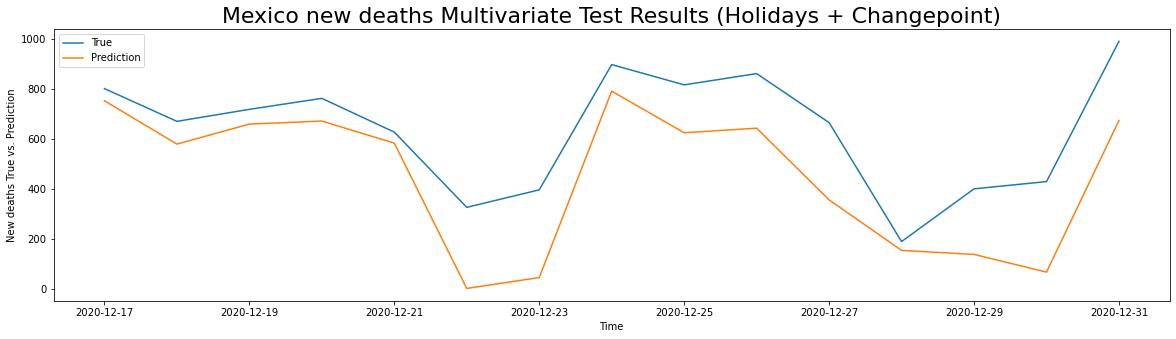

rmse= 39.4376817360756
mape= 16.789269801701895


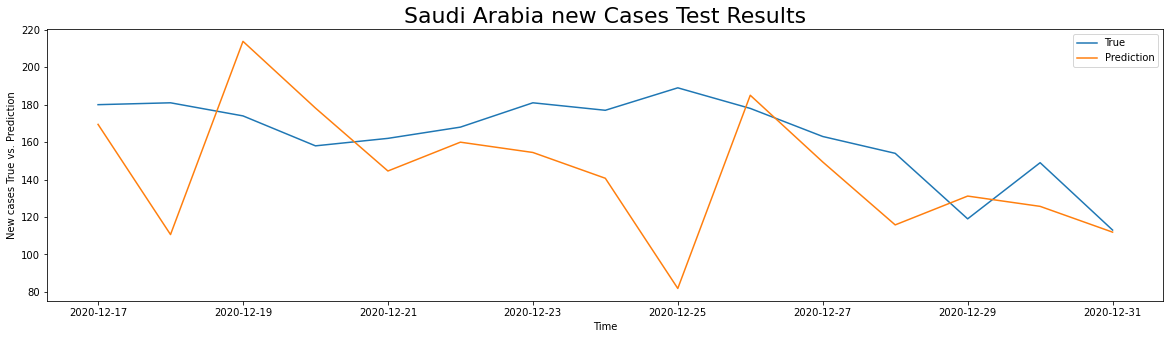

rmse= 46.68880447899105
mape= 23.57173448998365


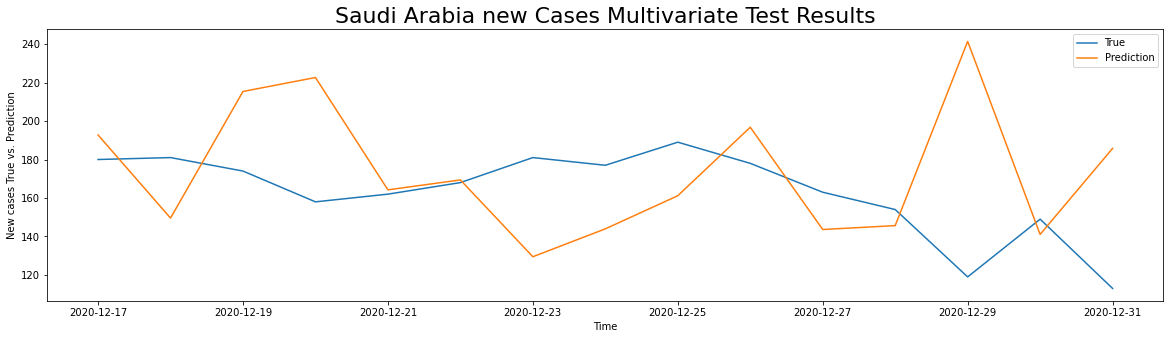

rmse= 35.84585365217892
mape= 16.97869587678277


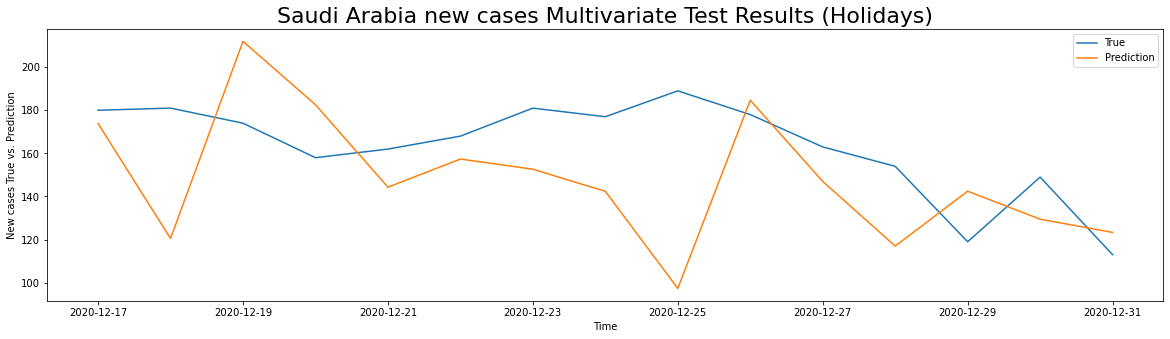

rmse= 35.611474751256104
mape= 16.830763847337757


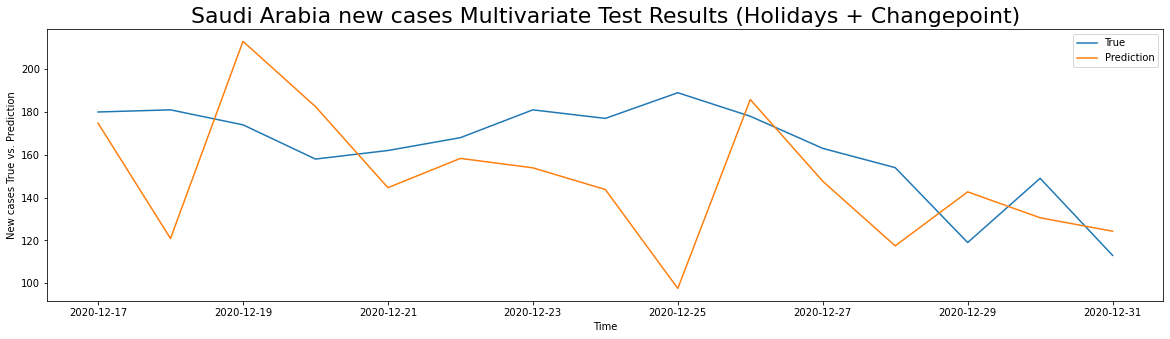

rmse= 1.1301616899575873
mape= 8.927296095868972


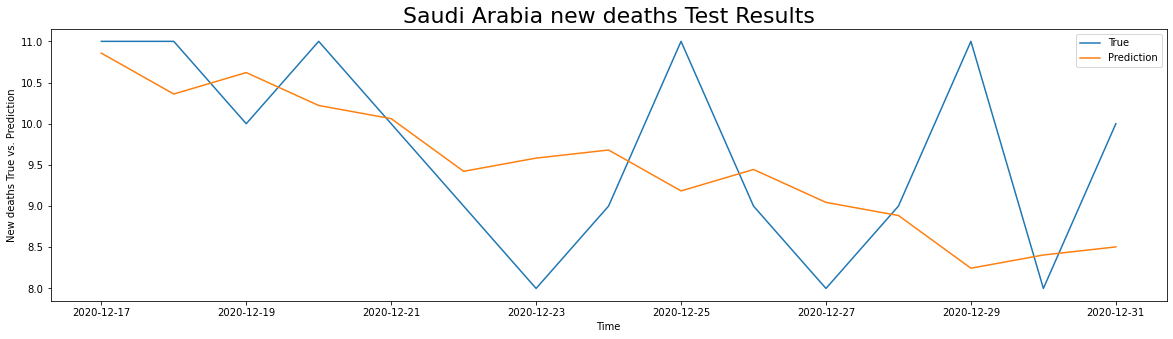

rmse= 1.111428183347218
mape= 8.633198255605002


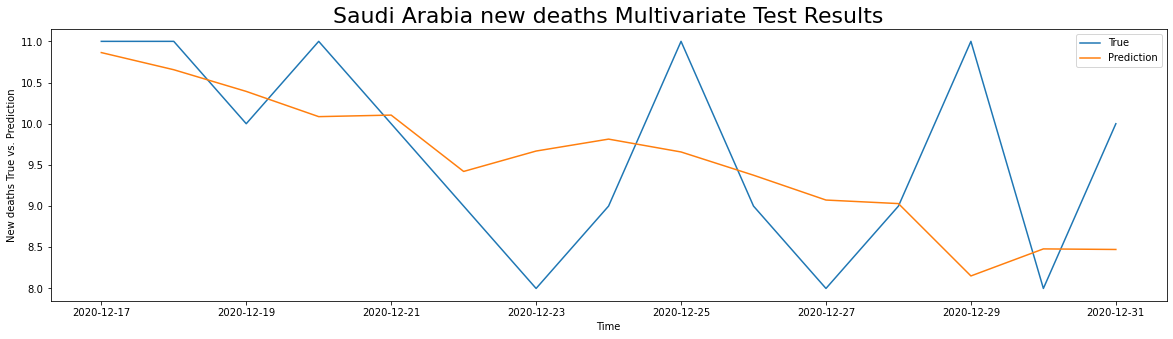

rmse= 1.1407101216533462
mape= 8.964301401553715


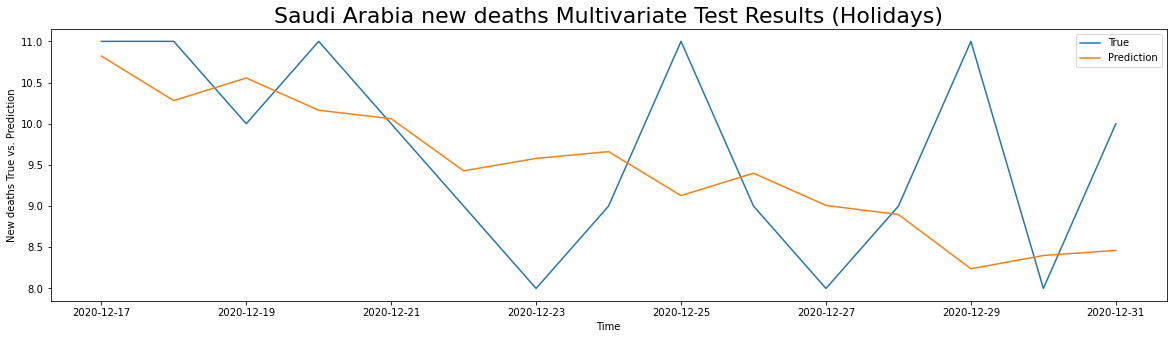

rmse= 1.1187012061430601
mape= 9.311364011457417


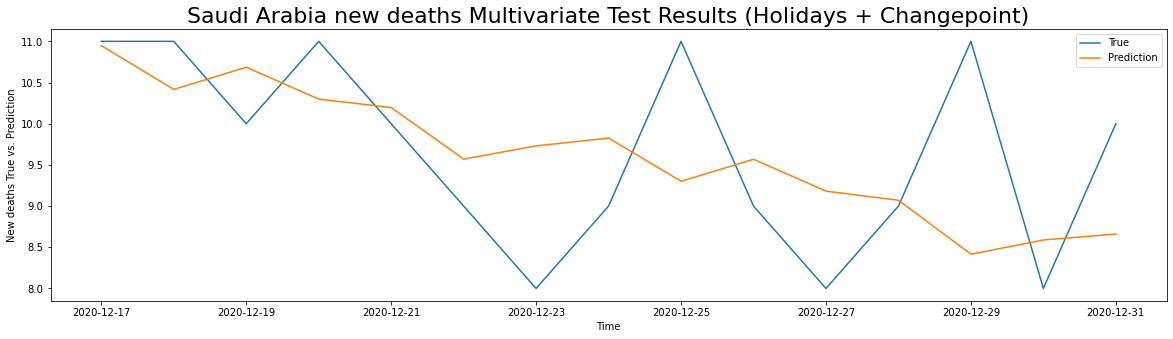

rmse= 2160.9596540212215
mape= 14.940675003566827


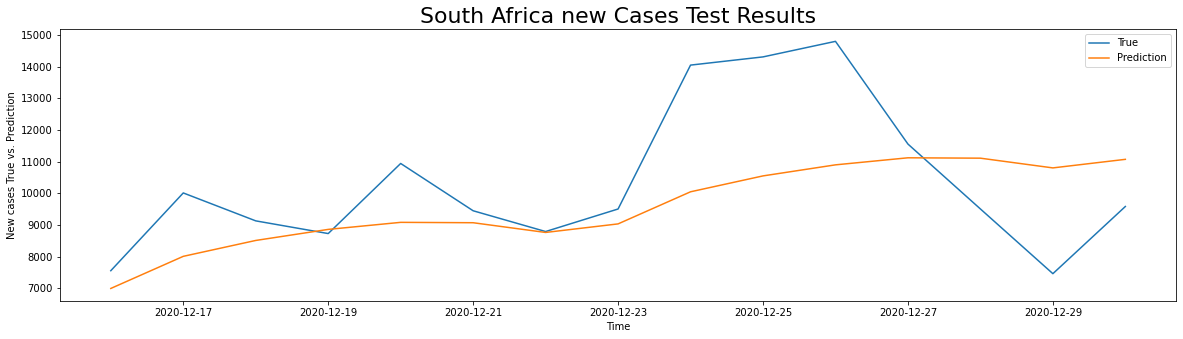

rmse= 2121.2229166169263
mape= 15.24330843595566


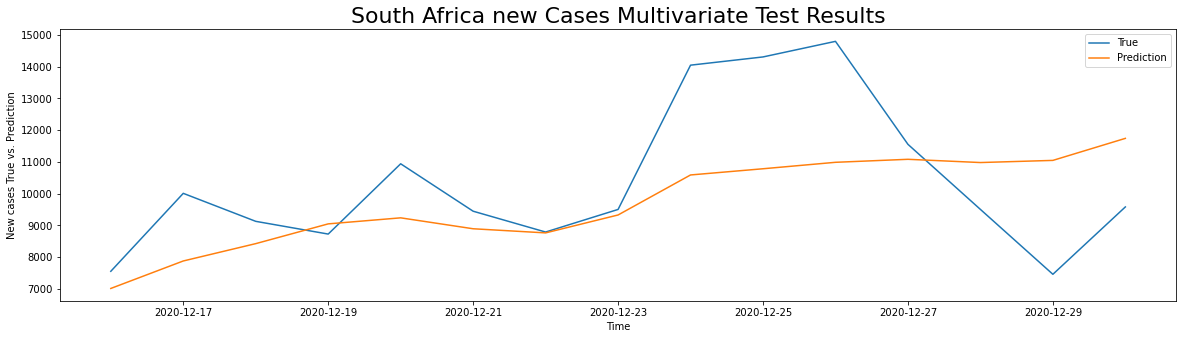

rmse= 2038.6403482222638
mape= 14.586161344283596


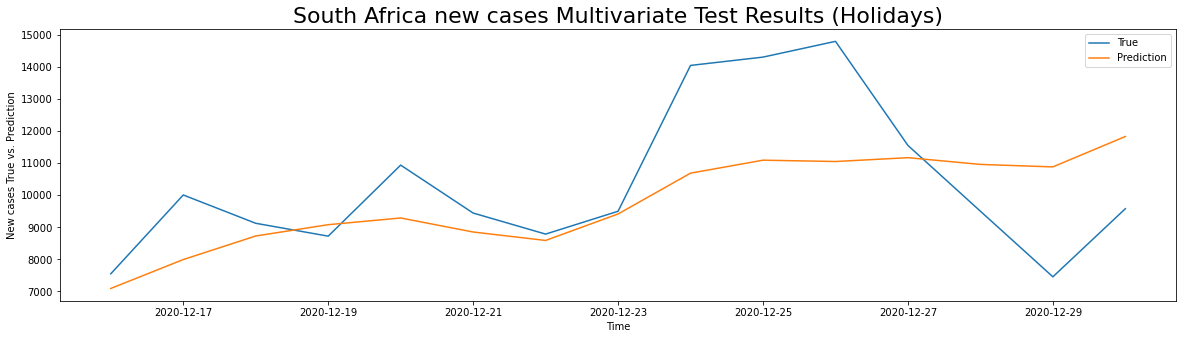

rmse= 2057.799115603571
mape= 14.732482344751052


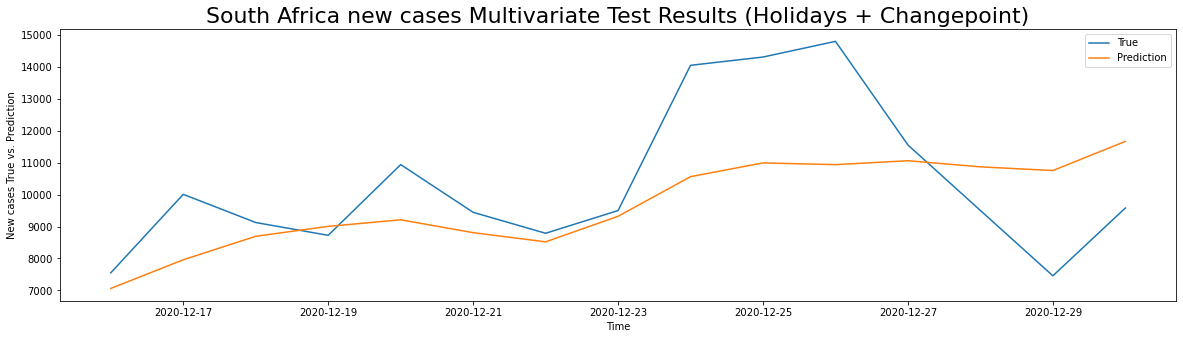

rmse= 112.4093482986555
mape= 26.24399478974037


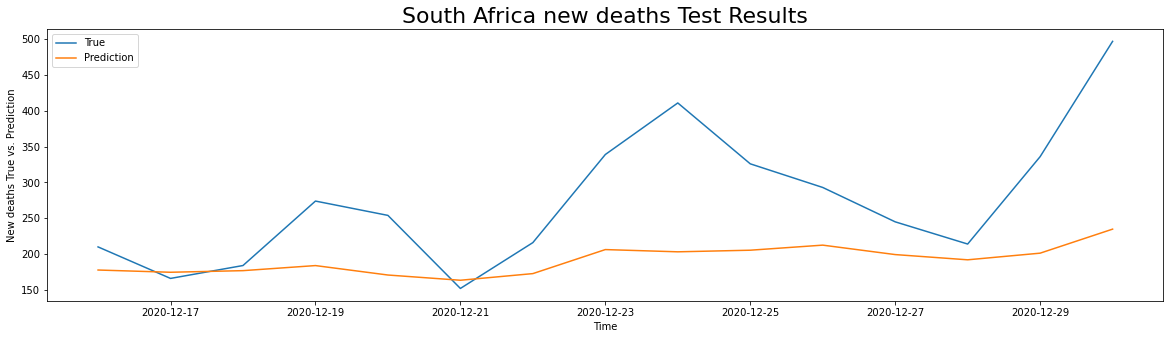

rmse= 106.41823801460234
mape= 24.503056894530193


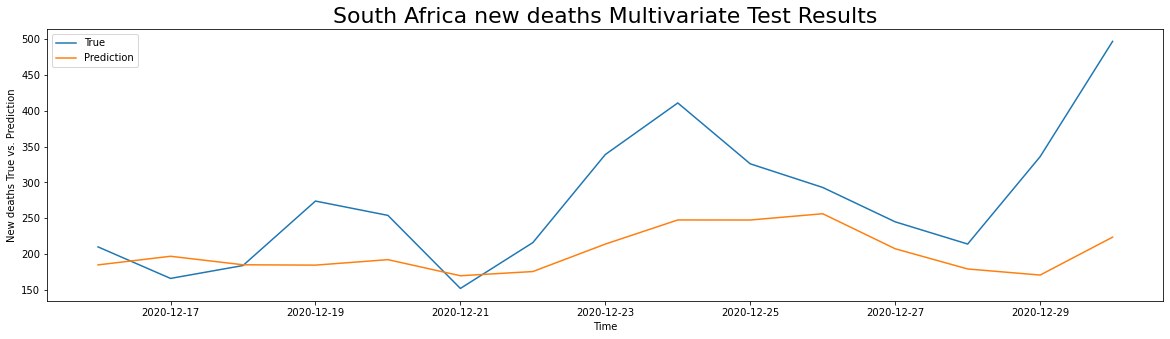

rmse= 102.47424301481227
mape= 22.572949824281913


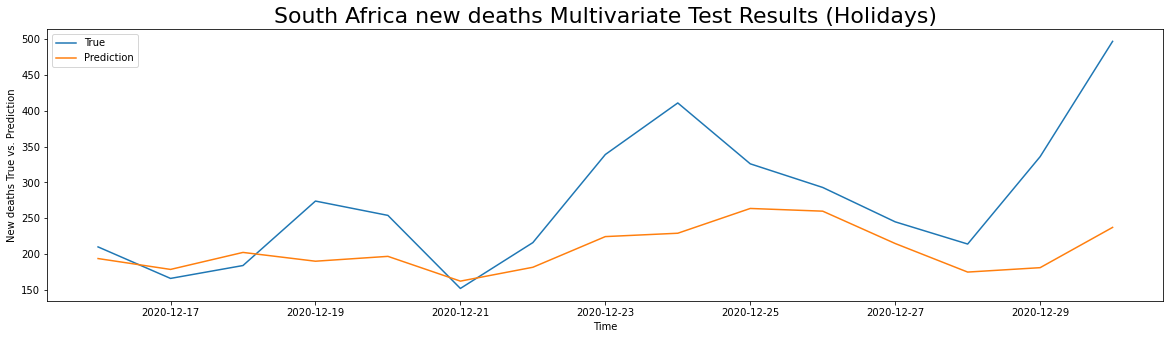

rmse= 107.77232714955414
mape= 23.98075715035574


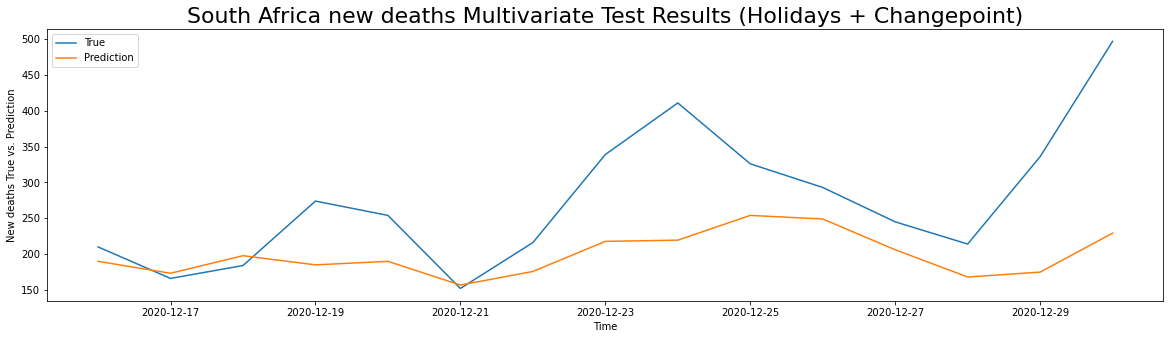

rmse= 141.16648501830633
mape= 12.45880896273067


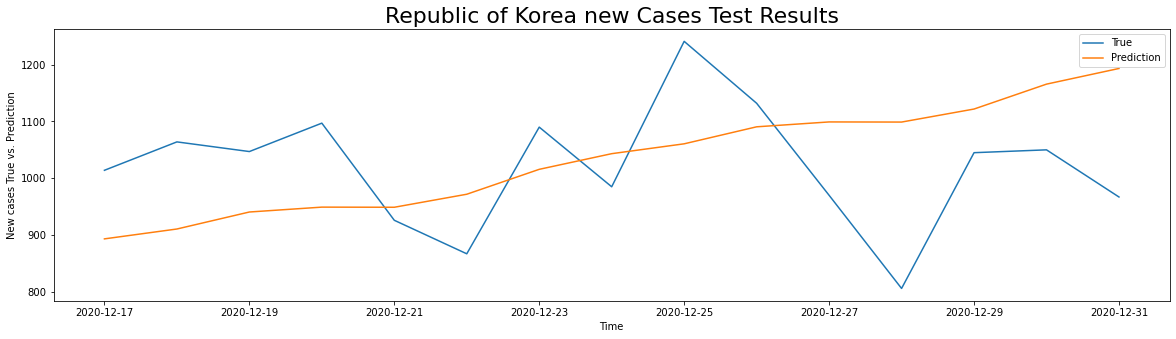

rmse= 187.13895742027506
mape= 15.908810257564468


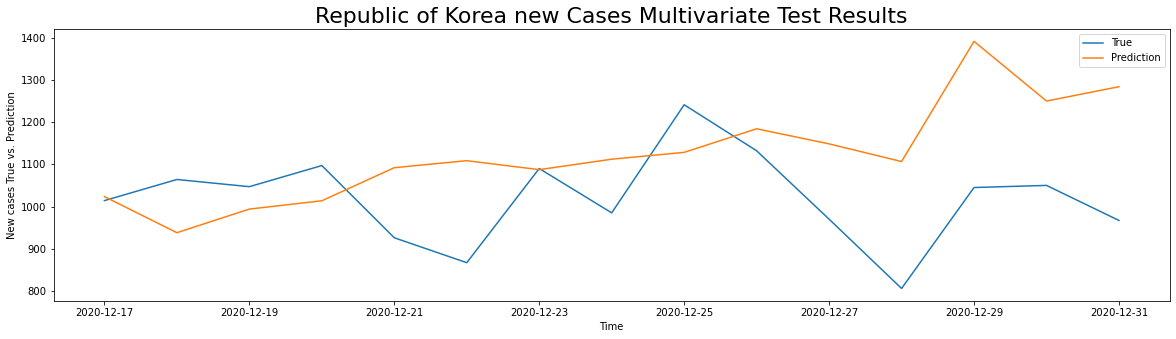

rmse= 177.98535318236912
mape= 15.166888475534776


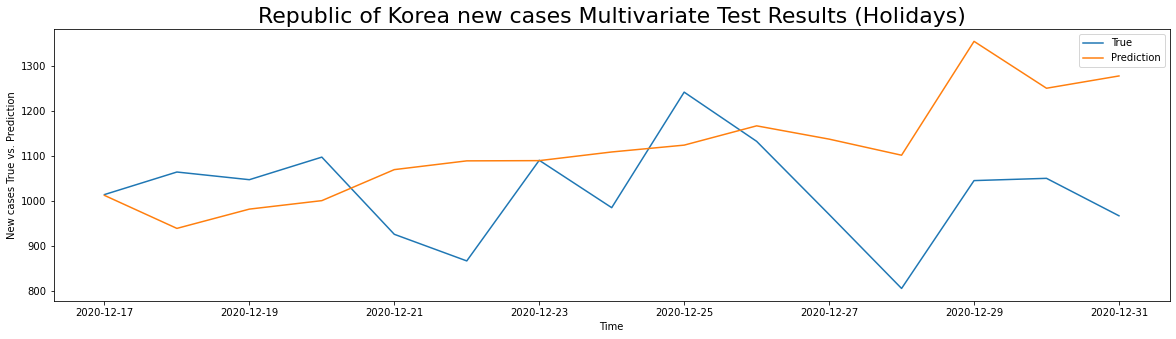

rmse= 181.4543023387828
mape= 15.46139886887659


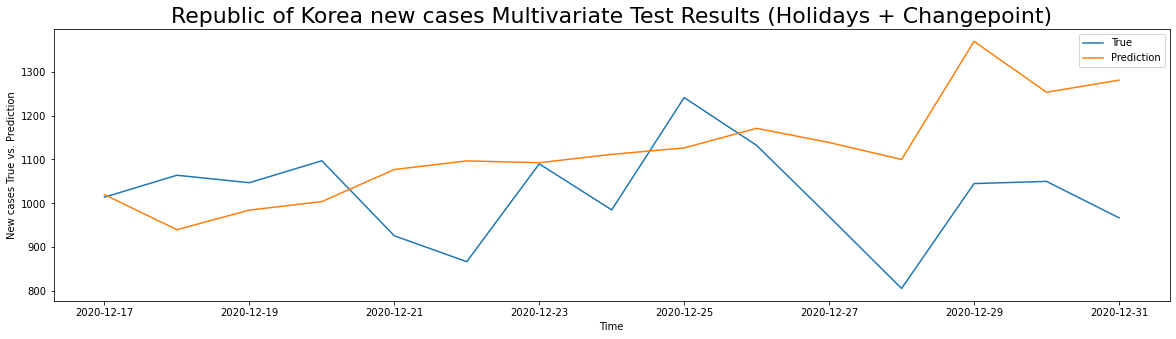

rmse= 13.723971768134474
mape= 59.17140493019188


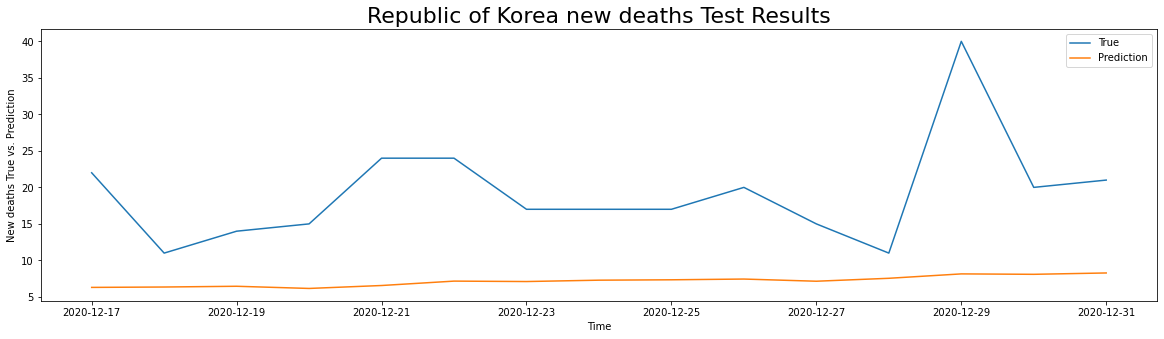

rmse= 13.971006562098252
mape= 60.41285612541193


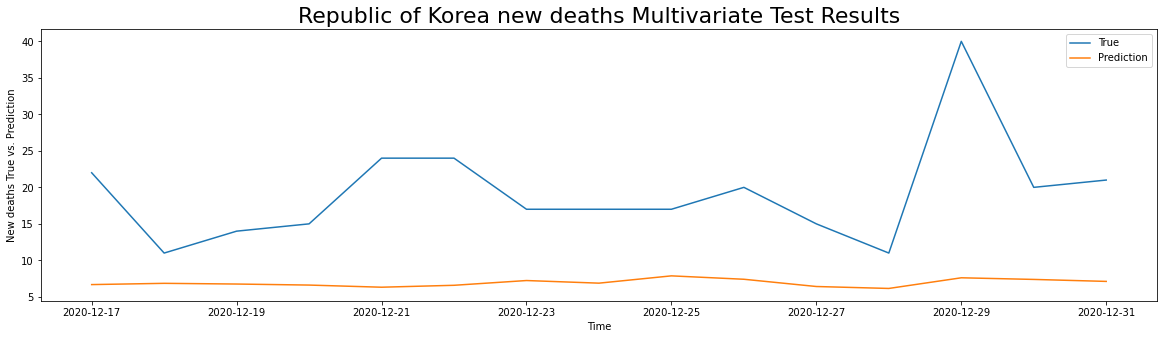

rmse= 13.89889328027983
mape= 59.999593705006184


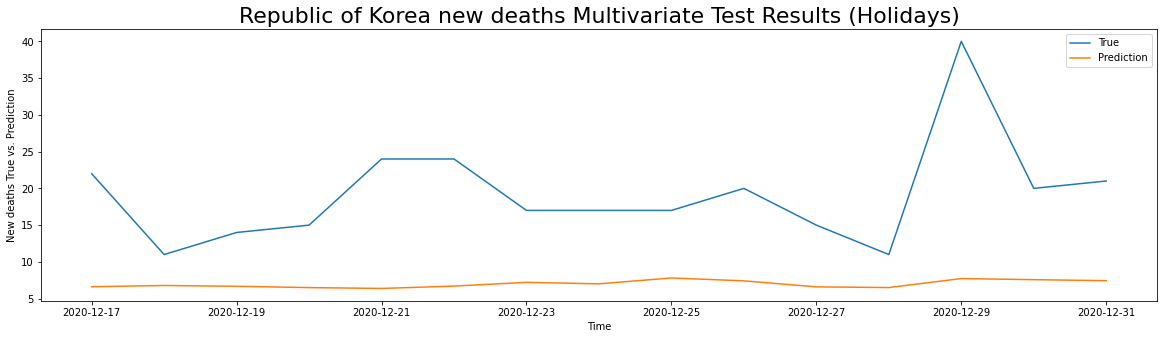

rmse= 13.769240811779028
mape= 59.19309606942158


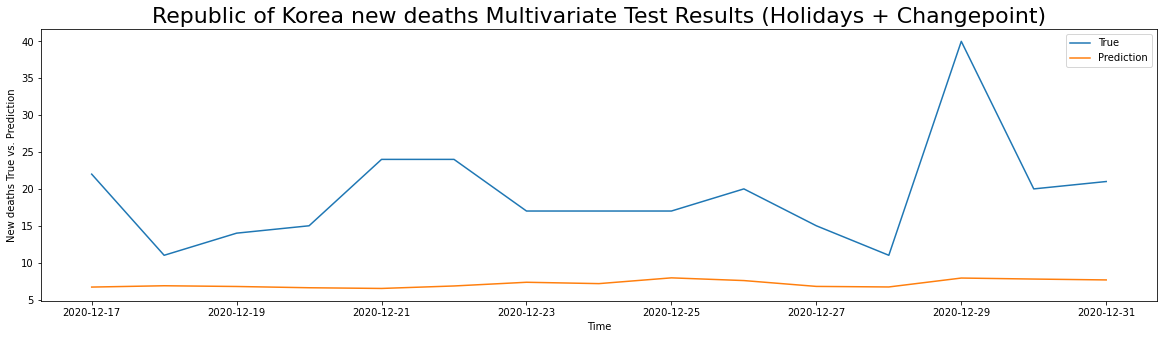

In [16]:
##((int)day,(string)country,optional((float)changepoint,(float)seasonality,(float)holiday_criteria,list[string]date)) 
for i in liste:
    if (i == "Canada"): 
        hps = 0.5 
        cps = 0.8
        n_changepoin = 49
    elif (i == "Russian Federation"): 
        hps = 0.8 
        cps = 0.2
        n_changepoin = 50
    elif (i == "Turkey"): 
        hps = 0.2 
        cps = 1
        n_changepoin = 45
    elif (i == "Germany"): 
        hps = 1 
        cps = 0.8
        n_changepoin = 45
    elif (i == "France"): 
        hps = 0.8 
        cps = 0.9
        n_changepoin = 30
    elif (i == "The United Kingdom"): 
        hps = 0.6 
        cps = 1
        n_changepoin = 40
    elif(i == "United States of America"):
        hps = 0.6
        cps = 0.9
        n_changepoin = 50
    elif (i == "Italy"):
        hps = 0.7
        cps = 1
        n_chagepoin = 50
    elif (i == "Japan"):
        hps = 1
        cps = 1
        n_changepoin = 70
    elif (i == "China"):
        hps = 0.2
        cps = 0.5
        n_changepoin = 30
    elif (i == "Argentina"):
        hps = 0.8
        cps = 1
        n_changepoin = 60
    elif (i == "Australia"):
        hps = 0.9
        cps = 0.9
        n_changepoin = 60
    elif ( i == "Brazil"):
        hps = 1
        cps = 1
        n_changepoin = 49
    elif ( i == "India"):
        hps = 0.6
        cps = 0.9
        n_changepoin = 49
    elif ( i == "Indonesia"):
        hps = 1
        cps = 0.8
        n_changepoin = 60
    elif (i == "Mexico"):
        hps = 0.78
        cps = 0.54
        n_changepoin = 80
    elif (i == "Saudi Arabia"):
        hps = 0.005
        cps = 0.245
        n_changepoin = 49
    elif (i == "South Africa"):
        hps = 0.5
        cps = 0.8
        n_changepoin = 49
    elif (i == "Republic of Korea"):
        hps = 0.02
        cps = 0.3
        n_changepoin = 49




    cases_calculation(15,i,cps)
    cases_calculation_multivariate(15,i,cps)
    cases_calculation_multivariate_holiday(15,i,cps,hps)
    cases_calculation_multivariate_holiday_changepoint(15,i,cps,hps,n_changepoin)

    deaths_calculation(15,i,cps)
    deaths_calculation_multivariate(15,i,cps)
    deaths_calculation_multivariate_holiday(15,i,cps,hps)
    deaths_calculation_multivariate_holiday_changepoint(15,i,cps,hps,n_changepoin)


# df

In [4]:
df = pd.read_csv("covid-data.csv")

In [5]:
df


Date_reported Country_code      Country WHO_region  New_cases  \
0        2020-01-03           AF  Afghanistan       EMRO          0   
1        2020-01-04           AF  Afghanistan       EMRO          0   
2        2020-01-05           AF  Afghanistan       EMRO          0   
3        2020-01-06           AF  Afghanistan       EMRO          0   
4        2020-01-07           AF  Afghanistan       EMRO          0   
...             ...          ...          ...        ...        ...   
86151    2020-12-26           ZW     Zimbabwe       AFRO         94   
86152    2020-12-27           ZW     Zimbabwe       AFRO         83   
86153    2020-12-28           ZW     Zimbabwe       AFRO          0   
86154    2020-12-29           ZW     Zimbabwe       AFRO        185   
86155    2020-12-30           ZW     Zimbabwe       AFRO          0   

       Cumulative_cases  New_deaths  Cumulative_deaths  
0                     0           0                  0  
1                     0           0                  0  
2                     0           0                  0  
3                     0           0                  0  
4                     0           0                  0  
...                 ...         ...                ...  
86151             12880           2                341  
86152             12963           0                341  
86153             12963           0                341  
86154             13148          13                354  
86155             13148           0                354  

[86156 rows x 8 columns]

In [6]:
df.drop("Country_code",axis=1,inplace=True)
df.drop("WHO_region",axis=1,inplace=True)

In [7]:
df

Date_reported      Country  New_cases  Cumulative_cases  New_deaths  \
0        2020-01-03  Afghanistan          0                 0           0   
1        2020-01-04  Afghanistan          0                 0           0   
2        2020-01-05  Afghanistan          0                 0           0   
3        2020-01-06  Afghanistan          0                 0           0   
4        2020-01-07  Afghanistan          0                 0           0   
...             ...          ...        ...               ...         ...   
86151    2020-12-26     Zimbabwe         94             12880           2   
86152    2020-12-27     Zimbabwe         83             12963           0   
86153    2020-12-28     Zimbabwe          0             12963           0   
86154    2020-12-29     Zimbabwe        185             13148          13   
86155    2020-12-30     Zimbabwe          0             13148           0   

       Cumulative_deaths  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0  
...                  ...  
86151                341  
86152                341  
86153                341  
86154                354  
86155                354  

[86156 rows x 6 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86156 entries, 0 to 86155
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date_reported      86156 non-null  object
 1   Country            86156 non-null  object
 2   New_cases          86156 non-null  int64 
 3   Cumulative_cases   86156 non-null  int64 
 4   New_deaths         86156 non-null  int64 
 5   Cumulative_deaths  86156 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 3.9+ MB


In [9]:
liste = ["Canada","Russian Federation","Turkey","Germany","France","The United Kingdom","United States of America","Italy","Japan","China","Argentina","Australia","Brazil","India","Indonesia","Mexico","Saudi Arabia","South Africa","Republic of Korea"]
indexes=[]
for i in range(0,len(df)):
    if df["Country"][i] not in liste:
        indexes.append(i)


g20 = df.drop(indexes)

In [10]:
g20

Date_reported                   Country  New_cases  Cumulative_cases  \
2908     2020-01-03                 Argentina          0                 0   
2909     2020-01-04                 Argentina          0                 0   
2910     2020-01-05                 Argentina          0                 0   
2911     2020-01-06                 Argentina          0                 0   
2912     2020-01-07                 Argentina          0                 0   
...             ...                       ...        ...               ...   
82514    2020-12-27  United States of America     145489          18648989   
82515    2020-12-28  United States of America     178311          18827300   
82516    2020-12-29  United States of America     145513          18972813   
82517    2020-12-30  United States of America     174814          19147627   
82518    2020-12-31  United States of America     199163          19346790   

       New_deaths  Cumulative_deaths  
2908            0                  0  
2909            0                  0  
2910            0                  0  
2911            0                  0  
2912            0                  0  
...           ...                ...  
82514        1692             328014  
82515        1296             329310  
82516        1334             330644  
82517        1779             332423  
82518        3366             335789  

[6909 rows x 6 columns]

In [11]:
fc_con = g20[g20["Country"] == "Turkey"]
df_model = fc_con[["Date_reported","Country","New_deaths","New_cases"]]

In [12]:
df_model

Date_reported Country  New_deaths  New_cases
79248    2020-01-03  Turkey           0          0
79249    2020-01-04  Turkey           0          0
79250    2020-01-05  Turkey           0          0
79251    2020-01-06  Turkey           0          0
79252    2020-01-07  Turkey           0          0
...             ...     ...         ...        ...
79606    2020-12-26  Turkey         256      17543
79607    2020-12-27  Turkey         253      15118
79608    2020-12-28  Turkey         254      14205
79609    2020-12-29  Turkey         257      15197
79610    2020-12-30  Turkey         253      15805

[363 rows x 4 columns]

In [5]:
g20["Date_reported"].max()

Timestamp('2020-12-06 00:00:00')

In [6]:
g20["Date_reported"].min()

Timestamp('2020-01-03 00:00:00')

In [125]:
g20["Date_reported"] = pd.to_datetime(g20["Date_reported"])

In [126]:
g20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6909 entries, 2908 to 82518
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_reported      6909 non-null   datetime64[ns]
 1   Country            6909 non-null   object        
 2   New_cases          6909 non-null   int64         
 3   Cumulative_cases   6909 non-null   int64         
 4   New_deaths         6909 non-null   int64         
 5   Cumulative_deaths  6909 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 377.8+ KB


In [27]:
def cases_calculation_multivariate(fc_day,country,cpps = 0.5,spc = 0.08):
    fc_con = g20[g20["Country"] == country]
    df_model = fc_con[["Date_reported","New_deaths","New_cases"]]
    df_model = df_model.rename(columns={'Date_reported': 'ds',"New_cases": 'y'})
    day = fc_day
    df_train = df_model[:-day]
    my_model = Prophet(holidays = weekends,holidays_prior_scale = 1,changepoint_prior_scale=cpps,seasonality_prior_scale=spc,daily_seasonality=True,yearly_seasonality=False)
    my_model.add_regressor("New_deaths")
    my_model.fit(df_train)
    future_dates = my_model.make_future_dataframe(periods=day, freq='D')
    test = my_model.predict(df_model[-day:].drop(columns="y"))
    mape=np.mean((np.abs(df_model[-day:]["y"].values - np.abs(test['yhat'][-day:].values)))/df_model[-day:]["y"].values)*100
    rmse = np.sqrt(mean_squared_error(df_model[-day:]["y"].values,test['yhat'][-day:].values))
    
    print("rmse=",rmse)
    print("mape=",mape)
    
    plt.figure(figsize=(20,5))
    plt.plot(test[['ds']][-day:],df_model[["y"]][-day:],label="True")
    plt.plot(test[['ds']][-day:],np.abs(test[['yhat']][-day:]),label="Prediction")
    plt.ylabel("New cases " + 'True vs. Prediction')
    plt.xlabel('Time')
    plt.legend()
    plt.title(country+" new Cases " + 'Test Results',size=22)
    plt.show()
    
    

rmse= 708.482856841764
mape= 2.3410549096481637


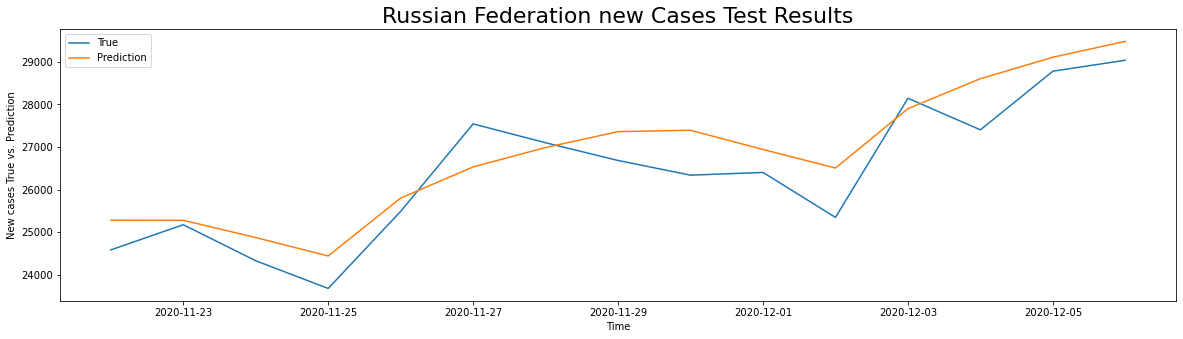

In [32]:
cases_calculation_multivariate(15,"Russian Federation")

In [15]:
türkiye = g20[g20["Country"] == "Turkey"]

In [16]:
türkiye

Date_reported Country  New_cases  Cumulative_cases  New_deaths  \
73224    2020-01-03  Turkey          0                 0           0   
73225    2020-01-04  Turkey          0                 0           0   
73226    2020-01-05  Turkey          0                 0           0   
73227    2020-01-06  Turkey          0                 0           0   
73228    2020-01-07  Turkey          0                 0           0   
...             ...     ...        ...               ...         ...   
73558    2020-12-02  Turkey       6101            506966         190   
73559    2020-12-03  Turkey       6690            513656         193   
73560    2020-12-04  Turkey       6511            520167         187   
73561    2020-12-05  Turkey       6903            527070         193   
73562    2020-12-06  Turkey       6128            533198         196   

       Cumulative_deaths  
73224                  0  
73225                  0  
73226                  0  
73227                  0  
73228                  0  
...                  ...  
73558              13936  
73559              14129  
73560              14316  
73561              14509  
73562              14705  

[339 rows x 6 columns]

In [17]:
weekends = pd.DataFrame({
  'holiday': 'weekend',
  'ds': pd.to_datetime(['2020-10-28','2020-11-04','2020-11-11','2020-11-18','2020-11-25','2020-12-02',]),
  'lower_window':-2,
  'upper_window': 2
})

In [18]:
df_model = türkiye[["Date_reported","New_deaths","New_cases"]]
df_model = df_model.rename(columns={'Date_reported': 'ds',"New_cases": 'y'})
day = 15
df_train = df_model[:-day]

In [19]:
from fbprophet import Prophet

In [20]:
my_model = Prophet(holidays = weekends,holidays_prior_scale = 0.5,changepoint_prior_scale=1,seasonality_prior_scale=0.08,daily_seasonality=True,yearly_seasonality=False).add_seasonality(name="daily",period = 1,fourier_order = 10)
my_model.add_regressor("New_deaths")
my_model.fit(df_train)
future_dates = my_model.make_future_dataframe(periods=day, freq='D')
test = my_model.predict(df_model[-day:].drop(columns="y"))
mape=np.mean((np.abs(df_model[-day:]["y"].values - np.abs(test['yhat'][-day:].values)))/df_model[-day:]["y"].values)*100

In [21]:
my_model.changepoints

10    2020-01-13
21    2020-01-24
31    2020-02-03
41    2020-02-13
52    2020-02-24
62    2020-03-05
72    2020-03-15
83    2020-03-26
93    2020-04-05
103   2020-04-15
114   2020-04-26
124   2020-05-06
134   2020-05-16
144   2020-05-26
155   2020-06-06
165   2020-06-16
175   2020-06-26
186   2020-07-07
196   2020-07-17
206   2020-07-27
217   2020-08-07
227   2020-08-17
237   2020-08-27
248   2020-09-07
258   2020-09-17
Name: ds, dtype: datetime64[ns]

In [22]:
from sklearn.metrics import mean_squared_error

In [23]:
rmse = np.sqrt(mean_squared_error(df_model[-day:]["y"].values,test['yhat'][-day:].values))

In [24]:
rmse

1251.9634184085332

In [25]:
mape

16.51340392617347

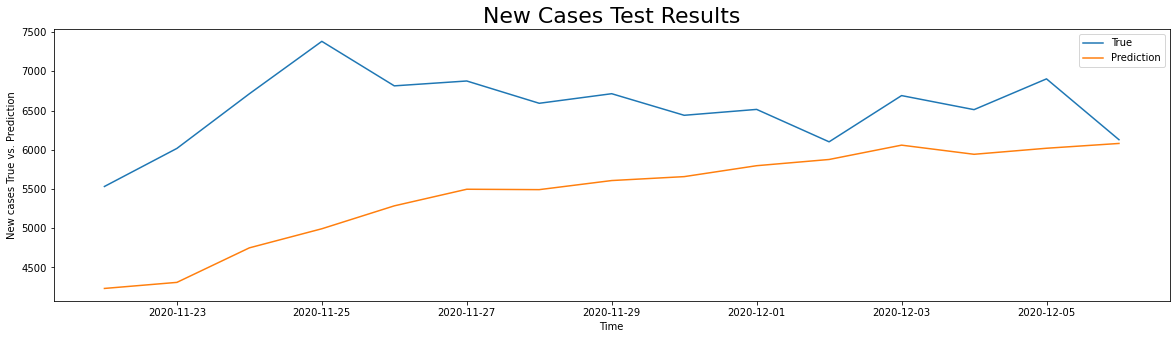

In [26]:
plt.figure(figsize=(20,5))
plt.plot(test[['ds']][-day:],df_model[["y"]][-day:],label="True")
plt.plot(test[['ds']][-day:],np.abs(test[['yhat']][-day:]),label="Prediction")
plt.ylabel("New cases " + 'True vs. Prediction')
plt.xlabel('Time')
plt.legend()
plt.title("New Cases " + 'Test Results',size=22)
plt.show()

In [1485]:
test

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2020-11-22  64.767089  136.371797  152.788252    64.767089    64.767089   
1  2020-11-23  64.915700  143.240663  159.074913    64.915700    64.915700   
2  2020-11-24  65.064310  156.587603  173.126494    65.061038    65.103012   
3  2020-11-25  65.212921  170.716913  187.303166    65.145538    65.363221   
4  2020-11-26  65.361531  160.173461  176.080920    65.180400    65.651772   
5  2020-11-27  65.510142  160.437260  176.650939    65.148572    65.920722   
6  2020-11-28  65.658752  157.685944  174.554622    65.119881    66.275443   
7  2020-11-29  65.807363  160.398315  176.709183    65.055890    66.647986   
8  2020-11-30  65.955973  151.086061  168.535012    65.018689    67.004976   
9  2020-12-01  66.104584  154.176645  169.920598    64.878662    67.428464   
10 2020-12-02  66.253194  147.362589  164.268209    64.815473    67.892112   
11 2020-12-03  66.401805  157.531414  174.676804    64.671342    68.245955   
12 2020-12-04  66.550415  154.191348  172.339866    64.493971    68.659005   
13 2020-12-05  66.699026  164.140075  182.934375    64.261594    69.176017   
14 2020-12-06  66.847636  149.116805  167.301199    64.083321    69.601845   

     New_cases  New_cases_lower  New_cases_upper  additive_terms  ...  \
0    81.250096        81.250096        81.250096       80.111914  ...   
1    90.658163        90.658163        90.658163       86.254023  ...   
2   104.159223       104.159223       104.159223       99.806244  ...   
3   117.117138       117.117138       117.117138      113.895366  ...   
4   106.118429       106.118429       106.118429      102.124928  ...   
5   107.321110       107.321110       107.321110      103.208316  ...   
6   101.812056       101.812056       101.812056      100.784453  ...   
7   104.178621       104.178621       104.178621      103.040439  ...   
8    98.844151        98.844151        98.844151       94.440011  ...   
9   100.299006       100.299006       100.299006       95.946027  ...   
10   92.287601        92.287601        92.287601       89.065830  ...   
11  103.713068       103.713068       103.713068       99.719567  ...   
12  100.240812       100.240812       100.240812       96.128019  ...   
13  107.844858       107.844858       107.844858      106.817255  ...   
14   92.811349        92.811349        92.811349       91.673167  ...   

     weekend  weekend_lower  weekend_upper    weekly  weekly_lower  \
0   0.000000       0.000000       0.000000 -0.459321     -0.459321   
1  -3.693041      -3.693041      -3.693041 -0.032237     -0.032237   
2  -3.995433      -3.995433      -3.995433  0.321315      0.321315   
3  -1.777292      -1.777292      -1.777292 -0.765618     -0.765618   
4  -3.702010      -3.702010      -3.702010  0.387371      0.387371   
5  -4.331163      -4.331163      -4.331163  0.897231      0.897231   
6   0.000000       0.000000       0.000000 -0.348741     -0.348741   
7   0.000000       0.000000       0.000000 -0.459321     -0.459321   
8  -3.693041      -3.693041      -3.693041 -0.032237     -0.032237   
9  -3.995433      -3.995433      -3.995433  0.321315      0.321315   
10 -1.777292      -1.777292      -1.777292 -0.765618     -0.765618   
11 -3.702010      -3.702010      -3.702010  0.387371      0.387371   
12 -4.331163      -4.331163      -4.331163  0.897231      0.897231   
13  0.000000       0.000000       0.000000 -0.348741     -0.348741   
14  0.000000       0.000000       0.000000 -0.459321     -0.459321   

    weekly_upper  multiplicative_terms  multiplicative_terms_lower  \
0      -0.459321                   0.0                         0.0   
1      -0.032237                   0.0                         0.0   
2       0.321315                   0.0                         0.0   
3      -0.765618                   0.0                         0.0   
4       0.387371                   0.0                         0.0   
5       0.897231                   0.0              

In [37]:
g20

Date_reported                   Country  New_cases  Cumulative_cases  \
2712     2020-01-03                 Argentina          0                 0   
2713     2020-01-04                 Argentina          0                 0   
2714     2020-01-05                 Argentina          0                 0   
2715     2020-01-06                 Argentina          0                 0   
2716     2020-01-07                 Argentina          0                 0   
...             ...                       ...        ...               ...   
76270    2020-12-02  United States of America     151204          13385755   
76271    2020-12-03  United States of America     177976          13563731   
76272    2020-12-04  United States of America     195769          13759500   
76273    2020-12-05  United States of America     218671          13978171   
76274    2020-12-06  United States of America     213127          14191298   

       New_deaths  Cumulative_deaths  
2712            0                  0  
2713            0                  0  
2714            0                  0  
2715            0                  0  
2716            0                  0  
...           ...                ...  
76270        1235             266043  
76271        2439             268482  
76272        2751             271233  
76273        2844             274077  
76274        2426             276503  

[6441 rows x 6 columns]

In [22]:
total_g20 = total_g20 = g20.groupby("Date_reported")["New_cases"].sum().reset_index()
total_g20

Date_reported  New_cases
0      2020-01-03          0
1      2020-01-04          1
2      2020-01-05          0
3      2020-01-06          3
4      2020-01-07          0
..            ...        ...
334    2020-12-02     328448
335    2020-12-03     407395
336    2020-12-04     431595
337    2020-12-05     455566
338    2020-12-06     437768

[339 rows x 2 columns]

In [23]:
df_model = total_g20[["Date_reported","New_cases"]]
df_model = df_model.rename(columns={'Date_reported': 'ds',"New_cases": 'y'})
day = 15
df_train = df_model[:-day]

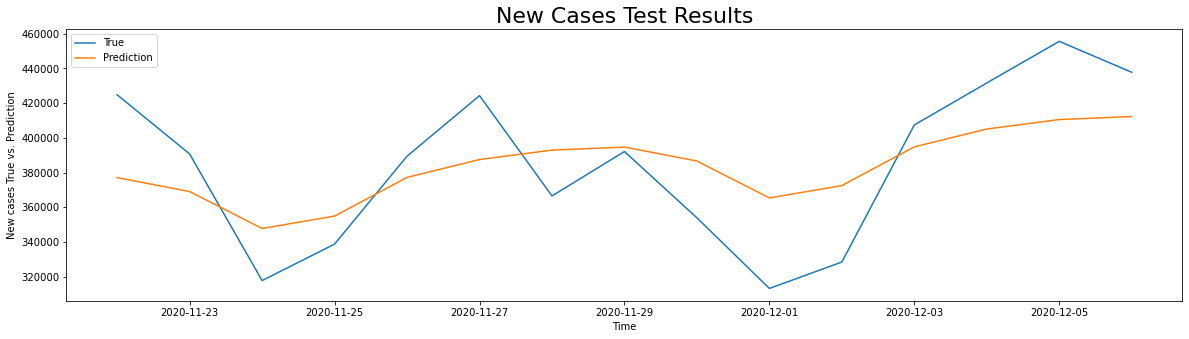

In [24]:
my_model = Prophet(seasonality_prior_scale=0.08,daily_seasonality=True,yearly_seasonality=False)
my_model.fit(df_train)
future_dates = my_model.make_future_dataframe(periods=day, freq='D')
test = my_model.predict(future_dates)
mape=np.mean((np.abs(df_model[-day:]["y"].values - test['yhat'][-day:].values))/df_model[-day:]["y"].values)*100
plt.figure(figsize=(20,5))
plt.plot(test[['ds']][-day:],df_model[["y"]][-day:],label="True")
plt.plot(test[['ds']][-day:],test[['yhat']][-day:],label="Prediction")
plt.ylabel("New cases " + 'True vs. Prediction')
plt.xlabel('Time')
plt.legend()
plt.title("New Cases " + 'Test Results',size=22)
plt.show()

In [25]:
rmse = np.sqrt(mean_squared_error(df_model[-day:]["y"].values,test['yhat'][-day:].values))

In [26]:
rmse

32024.9802328811

In [27]:
mape

7.660442201641117